# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [70]:
import io
import base64
with open("image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/4QBiRXhpZgAATU0AKgAAAAgABQEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAAITAAMAAAABAAEAAMb+AAIAAAAEQ0MwAAAAAAAAAABIAAAAAQAAAEgAAAAB/+IB2ElDQ19QUk9GSUxFAAEBAAAByGxjbXMCEAAAbW50clJHQiBYWVogB+IAAwAUAAkADgAdYWNzcE1TRlQAAAAAc2F3c2N0cmwAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1oYW5knZEAPUCAsD1AdCyBnqUijgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJZGVzYwAAAPAAAABfY3BydAAAAQwAAAAMd3RwdAAAARgAAAAUclhZWgAAASwAAAAUZ1hZWgAAAUAAAAAUYlhZWgAAAVQAAAAUclRSQwAAAWgAAABgZ1RSQwAAAWgAAABgYlRSQwAAAWgAAABgZGVzYwAAAAAAAAAFdVJHQgAAAAAAAAAAAAAAAHRleHQAAAAAQ0MwAFhZWiAAAAAAAADzVAABAAAAARbJWFlaIAAAAAAAAG+gAAA48gAAA49YWVogAAAAAAAAYpYAALeJAAAY2lhZWiAAAAAAAAAkoAAAD4UAALbEY3VydgAAAAAAAAAqAAAAfAD4AZwCdQODBMkGTggSChgMYg70Ec8U9hhqHC4gQySsKWoufjPrObM/1kZXTTZUdlwXZB1shnVWfo2ILJI2nKunjLLbvpnKx9dl5Hfx+f///9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8IAEQgERwLaAwEiAAIRAQMR

In [71]:
# @title
base64_image = """/9j/4AAQSkZJRgABAQEASABIAAD/4QBiRXhpZgAATU0AKgAAAAgABQEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAAITAAMAAAABAAEAAMb+AAIAAAAEQ0MwAAAAAAAAAABIAAAAAQAAAEgAAAAB/+IB2ElDQ19QUk9GSUxFAAEBAAAByGxjbXMCEAAAbW50clJHQiBYWVogB+IAAwAUAAkADgAdYWNzcE1TRlQAAAAAc2F3c2N0cmwAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1oYW5knZEAPUCAsD1AdCyBnqUijgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJZGVzYwAAAPAAAABfY3BydAAAAQwAAAAMd3RwdAAAARgAAAAUclhZWgAAASwAAAAUZ1hZWgAAAUAAAAAUYlhZWgAAAVQAAAAUclRSQwAAAWgAAABgZ1RSQwAAAWgAAABgYlRSQwAAAWgAAABgZGVzYwAAAAAAAAAFdVJHQgAAAAAAAAAAAAAAAHRleHQAAAAAQ0MwAFhZWiAAAAAAAADzVAABAAAAARbJWFlaIAAAAAAAAG+gAAA48gAAA49YWVogAAAAAAAAYpYAALeJAAAY2lhZWiAAAAAAAAAkoAAAD4UAALbEY3VydgAAAAAAAAAqAAAAfAD4AZwCdQODBMkGTggSChgMYg70Ec8U9hhqHC4gQySsKWoufjPrObM/1kZXTTZUdlwXZB1shnVWfo2ILJI2nKunjLLbvpnKx9dl5Hfx+f///9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8IAEQgERwLaAwEiAAIRAQMRAf/EABwAAQACAwEBAQAAAAAAAAAAAAAEBQIDBgEHCP/EABsBAQADAQEBAQAAAAAAAAAAAAABAgMEBQYH/9oADAMBAAIQAxAAAAG6Hs+IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5+ZVZbbekr7C1AvQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARTmbOm7bn6A6OcAAAAAAAAAAAAAAAZmPuecW1+7cq20JAjeScURvN+No1MsZqAAAAAAAAAAAAAAAAAAAANY4Ow383V0+R08oAAAAAAAAAAAAAAD3zYln7upfHZs2Z66vd2VL6EhCNjKwmIuEvC9IeuXqvnG824aUxCAAAAAAAAAAAAAAAAABrNfPa8efp863VI1yC+YAAAAAAAAAAAAAA9MtmO+l8tzdju2e7M9cMss621NyrRjuxs065GFqRtUrVpnE1StWuUfzZhpni98QAAAAAAAAAAAAAAAIxJ4GR1HP0UfT5tsgtQAAAAAAAAAAAAAABnhsTskaZWO23bhux3yyZ5ae7Gyl8GxW2nVJ1WpH8zx0pq1b9d6R9MnRrlGw3atscPPfLV8e+ICQQAAAAAAAAAAAHL1tM5Sf1+HR5KOnlAAAAAAAAAAAAAAAAAbdW2J3yY8jHeRu1bcN89urbnptyxyz09ETjr26rRp17NemXmvZrvTVo36tM4+nfp2x1+ZY3z88y8mPAAAAAAAAAAAAPPeCppO1yOqy117To5gAAAAAAAAAAAAAAAAAGzXmmRJiyMdpW6Nvw3256s89JGcfZTTaw8rOWr3TevmJfPzXnhaurTu0a56tO3Vrjhjl5ennnvk18AAAAAAAAAAA0xeZz196DC4rIbYgAAAAAAAAAAAAAAAAAAMsRvkRdueszfD347SctOWem3LV7FtvmtDLzzyWXnmMw1+67Ux07NOmevXnr1y8xy8tXzz3yY8CAkEAAAAAAAEDZyOWthtz6GLBtgAAAAAAAAAAAAAAAAAAAABls05xaTuibc9JecXZnpJ90ZVvualZ2+a/JbMcMZrlr813q1sL5eYe+Xqx98mrz3yXgQAAAAAAAISZsHmrPLWk6yemA0yAAAAAAAAAAAAAAAAAAAAAAAzz05RMjZGyppJyj+1tJaPYnc0+G3HXjMbNeONq5YPLVePJqPJPBASCAAAAACDB0Zaq+1va2iTDfEEAAAAAAAAAAAAAAAAAAAAAAAAAe5YE7Wv2J2e60NvmsnPzHxGTHyY9eJevPEe+AEggAAAMTJS6KaToeHud/bCXt0zC9AAAAAAAAAAAAAAAGOQAAAAAAAAAAAACQQ9eD3wAAAkAEAADGnibqLS1mWsyPL3Z65LSZtjElmmYIAAAAAAAAAAAI+0zAAAAAAAAAAAAABi1wYm0eezAAAASAAACAAA8PYMWoy1sMa+0ppWzreVelfYGmQTAAAAAAAA8I/mPmO00bYgAIsrVnrX2kGfWQ2xAAAAAAAAAAAAAR5A89AAAAAAAAAeHqngU06Pm63tKX5voJPt8wvQAAAAAAAAB56EeQKO79UuF6AAK+wxppCn45WoEwAAMTIAAAAAAAAAAAAAAAAAAArondzWu2w6K7X1e+1de02wAAAAAAAAAERMtR5UvdNO6+YAAAAAAAAAHnJ9bHz2oZNdl53r9W4qd08nUDs80AAAAAAAAAAAAAAB5r5+tpNXfWVNI0k1xAAAAAAAAAFbEzaSB0nm+3UyrCL5/vSdEbTToiRN1Z0+b3Enhun9T5yyHTxAAAAAHmBsQK6l+gRZV6tG3iMd5+zZReN9Vsnc9YXz733DP3PkQAAAAAAAAAAAAHkXl6aW/Luk5+iF1Ox08wWoAAAAAAAAAPCFWxen8j6THkryi4vYkxtNtXep9sNVdtsOYWq9UjXr5/YzOB773viw1wHh6p4OHT0mXDWee/TQauuJOnOT5f0EbbH059Wn2s80576siaZmZpxxw9DLX5fb+Z0tn577vyATAAAAAAAAAABGqK2sazRhjvVW17OmIU03wBAAAAAAAAAACmueVy3uvXN+B9v5Y6tufXW5bqeYvdUfRXSVupPLRJlUkxR0/KbOzxOo12Onbi0aYMKml1to7Pk9bbW6dMa78+e09Xn3VVs39/lkHPyvfn64mOW8jXq2a8XjXPmkC17ef6Hiejv8kAAAAAAAAA81m2npJuG8OzuttoiyjXIEAAAAKi3h5bZSq2yvmFqgAAAAOa6XluX0Kzb5C8X667wqc8vRsaDbvvhGl101b3Fjn1x89My3JX5eQN/J6zCP5j6lvDp5ExoSYyuiLsex8v5sZdvBMsd3LGvc7fze7meh6n3q4I3NddxM15rveI+q8voB6XiAAAAAAAAec9Y0XF6ee+vr+bslTPdKOt3VFr6nh5IFbFuh85PTz9nQV9fe83bAi7Lbn7a5FlTHsyskaY9H7ytX2eZ30HnN+et5O5vGLdM5WT08XQosrfmBAAA8PeUv+T5+uFR2nP+R9LcZatmXbYNWzD19PmdfrxWmvXqpt5NrJ04Ra2xrujyrmdHtMfU81WFWe1l3SRpB2e2H1HwkPoFpOdDY9b7zRGkm/MA07hSXZFgmrVrxx2h28CfaoaZgAAAMcubreFpbvG+lla9GPP6O6NhqmsmXEiTncSOeh16Oh0VemNbeNG0ReTq2VfRx2G2s87vJ6TPlmHV01hxe6mnYauVssdb+H7Ex67G75+oOjp4G7XlvIUDdNLHbok6c93u4mN2+RfQde7j9O19rYfP6PO1VxV7eXLsOy+fZ9kmbF05ejv0WMWukvVj7Xp0e5Ya8UbdPvenwuZu+esOb3bKBZ11b64kyTtzx73otvvfFQZxbIEAAAAAV/lhAx3sBtgAAAABA4X6HwvB6+vXE2+f7fjT6h7Fnznu1WE7blpYfV0saQtLDn9Ddr36I02x5UXu83ZYVev1PDsIuGy0YPVba8NmOV1lU7/P9W51xpfmfTexNia7fdWcaZYewpy3SoWSPdsPdNfcN3tb1dd0HP8AX8/+juK967p874NK7353z+lPQZPN6+rzPy2GcLf0m3F2/BfS/jnT52ufW7/P+jnxPI0azO45H6J6nywej4gAAAAAAAAAAAAADHIVUySrbXlktWPuyFDQd7jltTXVXzsT1tFG6o4St+pMuj5J79Z9pr8rmfSXVx/PNH0rxHzyt+hc1e/O67CI00Y7cefWbnrneF9lDtom6NJuWeVddUC1r5y06LSDG9dlH828qXjo2V0k89fVt+a0+ufFOr7/AAO95vpnVl8S3dx89831pWHjHsz+t8P3HpeHF+UWkDn683nvH62rHfJ25O5tj3PkgmAAAAAAAAAAAAAAAAAAAGraOT863HLbntm6qpfp9/CXdqdA892xAV1iieTg9jUTvx2jqdGtuYtPYfm+zP07NPh/V2+2qxLup1NOWTHkaKdETDLVfjy1Z6b4b9GzfEw6+x26cdn0PC4bcfTczs3Z9OJ5l2R41rttjUWWnat5tjzs+zVIjz+/xvoY9X5kAAAApINNepcxhM9U5m/U3i1AAAAAAAAAAAAAAHnoqqTsOfx2lW1Bf3oF6AAa6q5Rbl6rvfIv8r29nxHn+35Ors/O96fox15dknTF9tzNWWWnH5uxl16tOmdFi2OrYvza5cTbFperDLPswkZa63wx1a9eLbs1bU47cbeNqO8o+n9f5XsB3eMAAMTzllxXojbYUD0sbKPXY9OW+t3x8Nervvl3e+XpaC2IAAAAAAAAAAAADzyhrb3ZrrMd53SYZ7YBaoAAADVtHz+o+hUGfXycmVB5PV178ffN9Xbl7ux9HRI2VyZOe3CnRGizdGvn6/N2m/Pu0x5aMtuGunThswyvhs07vK6y7GDjXqqu143ufe+G6IdHCANZly2FlTo1xfK71ubPVp2dNffC7XG3xuTbC/5278zfuhHKAAAAAAAAAAAIKZ2mlqMtbLTOvInn+g9aZBaoAAAAAGHM9TzVdqmt6Lm/Spo17fPK9FMrd3ifTSZtdbYd8JZwImI83zXR5u1o1a50S/Pryxh6cc7Hd5TowsYsyvVrrpVZ0+ZK+jcN9L9f5cNeUYmPK+29ejGt9gevzeQJVFnePdcza+T3WuUPP1+LOPlry00X/PdF523dDTiAAAAAAAAAARMaumkjTCm5aQOlktcgvQAAAAAAABSXeMW57k+hqenaBqs9kTTaJWvk2kzKSf4n1F5srt3N6kPZP2TlT+2lbMbqq/rJmpiyoPT87JtImeXo7/dOFOjHDHZ6fgd50NDfd3ihfNzM7VXfdA20/p4ofmF2/m+l5HzOtv0PH7rzKjz9HmuNFdrpNn0fOdFtl3IvxAAAAAAAAANVfQ567Juu4pfTaG2ATAAAAootY1ldaY7YZVmuluxz+f8AR653rz3XEADmIvUcw35i9ga+ibOkl5Wir1z4Xm9kv2Ht8b6W6lUu7D1baDrjzS5rfdKcaK/w04NDImO2XNuemx3RPR8nvOi5zo+3xGOVDasWflW9WkSq2QuimrfHy4em65DveZmlIPC9IACxtKuX6nJ9Tee6+eAAAAAAAAqrWjpeularfLXZNOjAEAAAAV9BKjc3VbYTJ+uMeQaZqyzRPDWvR0GG95s4yyvXoWrbri5npsa34aRpq99res37989tbtvDilpW+V6rL14v0GePmslatcuLaPZWEpvmyPXXKPDzthH26/fZ+b7noqG+383zmbKLa2VDNo/Sz1amnj6fLmg7fKd9PNiehy8SnQfmfXClhumJt7R9d6fH1o14QAGGesbOcsKabJ3lbhvaDq5AAEaSPnX0Kr57m6e4VFv0c4TAAAAiJo5tP2WG4b84AAEGt6DXS9FOh+Z69Awz354PF/QqqNOWgS7Dpv5WyZdorKqXCz0sZVdL+V+63e6NUUzkVHtsJ0HHctg32cTTWGvBao26N/tfKfRbisl9Hnc7Lhx+jSDXbNGrCD5q8buv7bDm/S5NlhzV3jptpLjXeKbKx28W8XL2DKb2PK9Pvh2I04gBDTLrIsnj7IM7b7x9vKdrE5Wa9RY64fdw2Lz3p5QDz0aN44/ps+Rw37VyfSaZyBegADl7nisOi266PI0yC9AAAAKrfMyrbHItUDn+M+pfLa9N7op+j6YkVcfTtSB5sx8H3de+ZM832aSZvlxaLs1aKdmz2v2acWG3GwRRbNb1/me7z5e7vzzuclVXrc2EGRVeX3LWq6DnvjQ7dVJXFPa7V2+R8+3DbB8jce/g4d7LruO7P0+HrRtxAQ62bH4e+T7XUHJ2WMLKWfTPnv0Kt35/nfY19Blr0tjF1d/BPHRzAAPPRymnraHn6LaZzXl69M169cZEOooMd5PZQbWahrkAAAAAAAA47sdVb/K9siK6umr6nDfNq3aOTrn7Y2fg/Ve6duFssU5Toh2kSVNY+EXcrXbMdnb5CTXyujlk6vYfqedE1Hhd6xh52mOKFnWWXXjG0YufQKWAm/Q/nf1r0eCSOjjArYsmHwejSSLWv5erXt2Sjvazbp35rX5p9LqYngeorazPXop8H30PPmjfnAAY5Cjrutwz1+ce9z7jtynS2nu2PnppkAAAAAAAAABWfN/rPynLrmxtEm94WEuLS8u95a08f6K5gRovP22caP4tsx0yZzjSY/s08wy12wjTaq19TwtlRKhxUOTbZPr7rL0KJIj6cKyrbHrwrhy6gDIu/qXHdj6fmBtzgVcOZE8/0psewrubol5eak9LVdJzW3N0lXjslZfNfplbE8Jd18bPW/l1kX0PPvXnu/OAAAAAAAAAAAAAMDNF0RNiqdNbXfzjoeZ4/Q8gdRU5d9Ya+vgbtDLe091Z+L9bq26dl8dG3VhbBuw1zRE3wdfPWVdt6/P1eGGgDoOfu8fUyp7iTl28zP26O/w4TbllTQl7q7RZmfQzp18k9v5gACri3PL8Pf0cWTE5OugiT9Sfq1TPi64Sabqucrp0VXGklp8t+p1UOEyU8W6W39q+3htB18YAAAAAAABH5il+vichLjWfDsJNrc/r6jyzltHWapn5lG+m8vxdHNNmvi6ALuz5Hbn19DF1bqd8HXP835IsvXs5+3U3aa2yxzjzTbhuqrY+Ym/le+AAAsa7fTe6xy38X1GOOuNpjZRdGNsM9HuycfPqHOdZ6/y4dfAAAgT/ACJrtOzX5PsbKfs+TrPfU/UczavTVGHpN53rufOgqoUstvl/1D52dFVWtXek4ep5QAAAAAAxMudg2efRUX8nDonPzRq3zkaYsfWkvRD065ytUPTWZuuDhlrJpZ3nLtRY3Nf5nZGHLqyxE7dVqdNzortldrHXo8jSfqwiRfOMbeWE1AAASI9nTomSImfJ9Jno8ytk07YlufdPr/pnb40309b54AAACujyqbzfT66pg+cnZ9Ipt8bbCfzvXc+X9VDkTFjyvX0pdfP7momt/V2datNee+r5AAAAAA1nnIukp1YZ+Ru3PZq1Rt898fRp3x26cNekZavNNNPdWOHLt7jix098IkDRBsoXB0RB5vSAAAAAAAAAuIVnj6cnVsicvuxtm7Vt5unbrutuO76g9v5ULUAEZMnxWwnVcnT5Prx9+/Xyde1An2r2fJ9jQdXNdUsdbO74/sqaYuKuFKRafN/pfKJnwZGnPbfnq2ev43rVtAAAAPOPlWNOjf4i91Ubyq2ymx9Loxy1+a9Z9w8110amvk2YHPoYQ8LzY8KRy6+46dXNrkx9wvLzgN6bNZhcIkAAAAAAbYmykx53J9NFjyMJy16s89OTd9Mh2fsfMB0cgAHlJPrOPs92ysPJ9fPXomEO1v8AV28dPbQqm9O1ovMYi65PrqeYmRdUeHQ8j1cWW2lwROvdBtct4bVP9bx40j1aoAACi8jZ777H3R2MImyn6MtemLYDDzDuy9w810091MOXRhhC4d5sOJ75/T5I3RqzthmFwpYAAAAAAAAbYmVPx95fodbPOJw3YxY0MdW3n5/QcL/1fnQ6/PAAAgQpuHj+xrnRrDDovoNhC9DgRKeTS+Pl5sJPH9lSq2MHCHDo6a2TFNbU2cTPp7KTLkeg53o8t6W0q7P1PJeQpdq69crwzEx5zmFhToiWjR1wjIvTlr5/fvpOevzDvx91tWevuGOHLplX+1/kdgmcO+uTrhdFMsTk1AAAAAAAAN13avPO+6DbD5rI+p8JHRXeZ7PH+0i6tjTk2wfPL8vnfVPa+v8ALh2ecAAABAsqy68T2+b2e4cnZ0O73L1vKq7CPrrayzwTWXTZa4XdDeRyqvqeMTJ1ddHHdPWw4mm6flupy2pZ8Cy9PzNEjXs1y9CHLW0Km8qV7p62EXOH05eRPa7TKJMrJXP07devHWM9eGvm02RMIfm9Lxs4OiTq0461DG4AAAAAAyMV/wBfthwvYdV718eradHOA5PrKbLfnY0vX85+h00nGLflzj79OvD9Sl4Z/QfHAgAAACBc01z4nt1sXoeU870bKfz116vmWfPWGGuWcidItX3mOog1ap9HtNtlUXZxPX1mqJ32tB0Mx866zlupy3pbSrs/R833DRs1xwk6tsuZu+evHTnF3Qe3LXDzidPPrrJldhtCl1Hnh+jbYV+u8So2Lk2DOxN7CZ4J9V39PH8jfWvT5I+tD5K+saT5a+l41t82fSc5fM/fqs+1Pld19Cy1y5m9kt8PPS1AAAGrbifO9kef899vDhTYeHp+4YSerxfpuWOXvfH6tGMimm4XzAAAr7qD54/sW3OdJW+R69XaVO/0ODqGfvocFPdcbKrPUaa2ZEaZUK2TxPZUuqJkXfN9JMcnZpUOL6njeyz3prKtsu/z4U3Tu35/RMQOd7Hh8+joK9F9LLCN7H3ywh74vH1VHh876YAAGXf/AD7os+22l113XquJXB9P63zdq896eEAAAAAAAAAB57rORjSPfm/0Dn90PZWdE+tsuryPpfvnvufKtG+JFpbz2agAAIE+Bz9F/wC6d/yv1PKYztfVz9Xr5q89fyPl99s5XHb7XUW/muHMdPzecW3XnP8AQTHI22MyES54zsZcB0/N9JntT2MCd2cUfbs09PLvEwgzifm0q65KnVN063bj5X7KzzewPO6gAAFjXbov9T5e8h8f0mvXZUenL20rkeu9348NecAAAAAAAABAn8pTREl13zf6JU7MMlYU+BN6fI+nj3vkHmvRW0wWqAAA8eka756/+X+o0c51PNZa4V0v5f6HBIjmlP0f5VSd+WFcU90nieliSInRd8d2ExRx5dzD531XLdRTatlacurkka8fOzj2ZxpKAPKDoFbfH431v5vxehTDl6QAAAG3VOrrc+onH9P18SkkTXbdadfT5XWKC/8Ab+SC1AAAAAABqS2x5FbY8Z0NZ5/s7eQ7PiPL+mlacdSdcmHN6fI+o++e+78nXTMs62C1QAGvZrMduvZnpFsavzy/Vv6e6w8b1+e4nrKXt5KtzTr5f0fXWLo5eS6uh9rbO95fqkc5hNvq35Xo+WtznrLVri+yPYVHTzWWv3V18e7Z5Ny1he2GFbQmOnbGR49vnzXDfXtWHR8Vd5x/D3wxnoAAu66fh6m2VWycPWlex9dOnZdVedsp0jnrzo8vqZXGe+n8/wBjz9Xvpf3zTJ4fZvZ3F9b63zW8dHGAAiylb6dxatBjK53yvobHlbat8z6bKPt1TWPt1WvT5H0b0975AAAAADyJ52HN15UnQxeHvr/a+w8X1+c03FPvj8r19Dz3fwfo95l1clJd1d5TTjLXy3pepvuF7Ar5UW5Pn8joeWTfVVrrmLSy15zOfuIy8x8RlXzvTkN82v7/AD8xtztG8cnzP1LzDo+KYfYOa5unhJthE5PT24eSOf1NTajTU8xtjMzhe06t8ivlRfZvj6UdHCq/JrfS6uRXaxha7rTmttvKdX73xIa4AAARuJ775353twZUHb5f03uGvyaYdbxv1P0PnZw9TwwABFi0jVazOXq5uR0FFKv7esn8/Tta/aac1Yx9vmehlyvV0GOtTZeUvbx95ss4/XyV15xPVRNXf0F+UeOd0cd2FPWF7xHZcSdRo3063a5UlvJEn1xOVs6WeenYjdynVa7V5xDmen5IIAAxizCebqu5ZbfOIv1HzHq+UPqeNNPlur6tjW/yjb9LgVvwvnR0XL6G7ZAy5fXz2eSouyjx03XVcBl2+L9PaN/tfJgAAPm30nkefsp9O3T4H6Dpx9y182y+gRpPu/FBriAPDRfVHV8Poe4Yx8OmR5F9N+vXgndlHyN3O9Lz3NvP0b/fL9Dk5Wnd04dye+n5tBv1XkOH7Wj1pl23MXsx5jsrrUg819E+dRPW19hX1vaQpu/Ss6RytzW07XvwNWxmnLPH1Xi5UCf6XlhfMAAAAA88MgAIM4n5fF+k/OPI+j8k6PeL2Z+mPuz65OOTLtz7jht/p/Md65m99b5aSNMgEeQPmmPf1Pm+9yX0GZs6/MGrblzygTot6LUYZ4lnb01v5XsRoW2BFt+cDaTvNXhu3xZMpVZZxIQ91VaeL6tND6PhdafU/ar31PLjXtBezFLbUtnasGi6urmsyEpjsfnP0X53FusrLOpppf7Kyx2r7BnIQ+i5fp6W9989Q5PreUvTDZAd/m7sb235uviZXT0s1io0nq5AmGGmdltWWHQbeXsp/bhltzVf2urTLm/Ysjt4MhfNTXKLfJcvoPz7x/o9kVv5vRmbKyVj6MrfF1137Osytb4SZvIdf9B8EG/KAAAy1wsN5W03xBAjp29PyPV+d6cGusq/LaPu17jfnFlHsmLIlNoruqRomQ3nd03HLzj653seT7/gcjdR7JEKdzs8u6S7o5XlFe0pH5X6Z89rfqKu0rKadBR31fvzZS4UOuu/o6Gyrew9wyi2bH1EWTlQIv8A3DI98eHK+7Nfd57z2JrjP6KFN871XnmNbZ5as05hGrkez5LbDaO/zQFfYE/L4n1T575fuxNLd5/u47oeRbXnPbef2LqfQyPR+a7FGk+v8tC2dfny9nEyOtqbUrUWV1cgWoA89hVvs6Sbn5/peac41NI0KVHidW5tPMctJ7IhyCw5PqODiZm72s5d+0ee+d6GcumtvoPnqW9orxOik6CnNevo+SietpdOtHSfPvoHArdLWWddnrfQaS735rOrsIExBl21FTTpMuenZ7W0TnK476io5h0nnJ+HeOc6CXMe9HQ781f0EvfTT3HzzPVh7in3PDM2hGvi+s+UXz6yd8zv9+brmqL1ck9p2zEa0i9Xw+j8Y5/718J4vUy98y5fa0T4+osZ1LKjX6h0fzf6L3/L+46sbUk5aNxF5ns9VqcrsgT/AEvKCYQt0/Do6Lz3Hh9DVFkRVo+GzyD30atO7A1ydco28X3PAVtu+dfQeUzt9EuPnP0bze/KHPke54nFWErfnrGrun0EfTnptToOU6aptXVzn0L55W3Uxtuee3wzreTno+y+fHey1x+hVsqJpnP5Hso1L8x50vK5beY4YJtMsPS+gzMppaS+Us1rfDPXLHH3Fbx4MturYbTFEb4d2XI0mPu0IfXOlrLLWlbQdlyuuXnXcPeIu+c6DHHo+DefcPl+HoUHmrzD0jd6jd9v+D/X+jzLHHR5txTZNVZIk1O/mb57dp6XlAY9bxdnw+j0OEbnufo6SPGnzMVIEfyTiRfNECFvM4ztzD5x9B4altHzf618vrOz7h8BvMtftG2j0dnDa4wPM9e68xkxbkavsalFf7CgaZdxyHRUlqZTaq0y6PiPu+FEz8tsCa230T5d9HvTso2eBa/O/ofz+J17NtlE0cmqs9M91jz2dL9JhzVrMTuio4UW6jGPIm2LL0bMc0ZY5Vp84os9WdtWEyIfUOl+R9zaOnosp1q0N1ae3phg10025aPU8Hw33Ogy6fl61rcPT0fWfnn0zbzmGWWvJR9hEmkfmer4jo5beHK6rTPjZlzydqWFJZ1Oem+PHj8Xd0PbfKvq96+apHGSsoNNd0tuiaIsPeh4O4mOr5e2pa2ct1Git/movn9+13HCl1ZWvBn0rL4d350POQ5J1HGW/UI+cwfqmEx8ote/xT+dav8ATv5nibWmu6OYt/ofzzuZr1u6NPtXZxfQcZakCs5uXlt9O300/s4YlnXWPJ269UmOe3caomLjpeR62Z8956si3b5VkuUmktIp8Wx3Y5zt1Z5Hs6usCTZVeR9JlfMO4vFnrjeSlQ9lVCfe0dmSdWOEtWjPVBtpqo7ip5Gxh3+qnv7R616zdr0+Evj+oqofOs/Y9LZfTPm/SzHfwpy9fi3a8tNzvMrMYBjqw1HS76e7rbbjqxrb57C6rXNPsEeD8kvHZfPNYl/Z/in2cyyliL2fBdwR8YIl5Vmw6D8w/pn5QcjRdLRTE3reQgo+4WfC9xthV8/fQJj49li5+r6hZ8tddvBCtoE/m6vY0mHW1vq3+So6ruKua85PpLTPXDr+DymPqLTnZ8prejpKTlKy2lL0XOdiUlrTdAcf2vFdCjss8Nt2W2JUHRU/KQ6ug7T5btPoXHyOhPJMK6N3nB96fMvqfyLvZX0XLRZA2a9ELzbElS+ZxOj5rOZGyIPtOVFbaV5Pheu4Kk2kCXWxPmDdDHpt3X82vI3PVZcumiRp3YX/ADePb4wNn2b4r9nOetdnLWr2Xe/nH9F1tRRbXWQLHCSWfM9PzhL+L/ePj5xMX6ZkUXfbOqtTjN0K72w+Ajn6u96Lkbfr4tllVWWWucKbAz1uvfPZa+m5mz0yq6Lp7aJ+YYW9Zjt306quruN5zsOUqGcTTdHUTDC21WJwtzqzO3pKHXMSI0WbCNl2vRS5Lr9vp49GPPdHHOW7DTgfMdXMYQ+94VdtdTbbKKbpmqEYcD1fL1aMMNcTY10QbMMRJi5YnV/Svkn1Xzujdt8r+bSe5WReu+Jv22fDB6vKA+y/GvsJOvaC/wBueg7Tlukpes12OymtbNj3R788+icIbZPtcbe3+eWh1sTncSv6Cll7c/w+PbVOO/VdXxXW9PLYRfNMTZQJsTHe581bZRer5G5vlFlweimK2tW1bV/RVGEaZcL2dDS1XtTImo09By52UqF6WHOMzmrjvrCYo7v0PPQAIhL880mXFdz8PKcRPYfUPgf3G0T89mdnA1NrxtEjXrxifcfMD08Dzaa/N2kl91xXZcmucK75iIvOr4DqMdLCuvOayt8YHr8oD658j+rlp0PPdDthX3dVPraVBvKnPXTaw55s+R/TeRmtR03K8ofV6/luxi1V1UGEdVyG3y1PmvN9PzETZdz8/wDom2FtTT6u9LTXnr5+nKxqLUg9bylnpl5Jh9HKpnU9hS9Ra666a++2lTExJSBnrecXS84npaWGPsvSfnbopj7Q4fqicoSL556kBo3iDO8riB8W6fmIAl3nB7T9Ccx881zFrV56Yn3x4e+e4GWDE26/BvaMix6DnrPl07Ln+io85j22VpaLnKJM4Oj83j2+MWBX/T/mH0o6Douc6PXDTu1ot0PlNxOeveUXtlpjW2XvumXnzH6j8zpr0nGfVZ1L/Hezu+Bi3cRPnXVxNfwP3LQfDO926dMr+uuabo5ZmDXy9uq3orc3WFXlenRUt5DhquaiHMRJLl7U7ricK2mlXSb9GegJAAAZYj6j3H53+9zE7yLxZ3vMfMaw6rmMPYnwAAFjccxdE6uaz3D3Ey88zMC2KqbY/Skcbxf3n4lLZZVljy69B1nzzo+fSwrK2Lrn2F9xXacm/wCcB6/Jljs1j6J87+gHUdJzPTa4+VFwvnA4H6b80pp9G2xpN8nran35p9P+YZbd3aU1ykDiKroNKOGu/onNTFhynO21Lza3iei1x6vVj5ntGtqS2idtlTzrV6/lbXhUdnxNx2JwXazlbgaOR7UfHaH9AYn53fauNhw7dpSAA6jlxu02fVHDdH30qYovnX1T49AEtk7pDiQJ8DMsmeAwvJyOXs621O56zHO1XM9LwJRc795+RxaDYVlhz6aPo3AdTheHLlUfVhnY1Pfcu/5/HdiA7vhO2h1/T8v0+uPo1yfNvpPzimnczq+wtTLfpkUu+Z/TPm1NOvuue6GYeearVoqLp+Ih9GGuXxu6p+i5+r5ne0V1NejlQ5KYlpzk2Jz1dX1ByvVZYnunPYAAee+egDyNxp2PyyqqIAkBMh2h9be+TAEP499t50+ZTex6qEWvusJfGmzXEgTey4P7BMdY8iWr8+sui0ROcikilvp1dEfILKNUVnbaU17hpruKdnbu5mjZy63UXiYmlPno9HAB2XG9adv0nO3umUka4vnP0b5zS/Z2lVbzG3PyLTSXwF7XVtI6vhu1mPNTzXHX8w+p/JqX+sjTP5Vb6Y2HRwFhh3MW561+iS5imuMkTEiW3hVbLH089AxryXv81mz3i+HPp/D8Uhu02XVp4bpe9kzFN8++tc0fNREtmsfatvKdXMANWqUDUYbMo581pO14qJAd/wABPPrUibQ2ru0+5J0JNyirlKXPTO511/m+ltr/ADG1YtDa7NcYNrF8RjItNnRj8gGuQDqeW6Y+iWUGRplbDXF87+ifPKX667o+gifOe6PGttFD01InlO9+bfSbV8GmT5R9T+Q56/Xef5Lp4cpfdr7TTVtEgAAAGPLHV1XzHmjvOMiIls198VHRW0+Y9AAwzHxXVb1ESBf/AFD5H9cmAPPQa9gQJ8Ag/LftXxmGsJA+oWvyv6zMRZWm2mI2WXJ0vNxbODv0aLSPWYMypk3rX686++dlFmVh1VjzvQ5bfHh6Pnb9AOi52+PqOyPsvnejbB8/+gcLW3Q9Jy/T56ehOFXPj3z+YfU/jVzS/wBE4j55GTYWvNKX+/yvgP0SXdscgAAeHvlBwx9M4v51rhY1wkAB13I3R9HnQJkxmA89APm3M/S/mkATf/UOA7+YANW0ARJcAlfMfqPEnECJAfTfmVkj69s21UWhbNk/z/Qibq+ZS8Cruuc0zkxYmWmdjUdBRmButXb3HzLts9PlOWMzu4YYF3SW59S3Rt96X4253F9pydbbuw4fts9ctfLfPZj6ZwHGeVsFbgAAXP074wR+iXy/t5XWj5txx9K4alRIAB7dlHIudJI10NyUu/QPtsJPmtXO3VybEAD5X9UrT5Ela4n6H02ndMAELMlIOsyyjZFlQZzD5Lj0nNxIAH0PovmHf47T4drRcXZdV2cmLY8/ae2ryHuzDo5+jot1rnpzu3DfelXsYaZ8+N8AFoH1bMtS/G/O5gieOpzn6aMJAAAAAztgU4eAAAn3gRKUNNkH0GEHzkH03oia6tgn0AAEaOFiBGDdWh5BITdoWGRLgecIQQkB3JW3T5nnejXWgaohMVccvSt6URViWVYXp//EADIQAAICAQMCAgoDAQADAQEAAAIDAQQABRESEBMgIQYUIiMwMTIzNEAkNVAVJUFgQkT/2gAIAQEAAQUC/wDgyb6zqVj+dc/+Z1Gz6rVCP+dQo1/Vq/8A8zaaDNRpqNrf/mbLYQjSKZM/x9s2zbNs2/zzKAG1ZZqNkYgR/wAPbNs2zbNs2zbNs2zb/MYYrBhTfzSFdw/8PbIjIjNs2zbNs2zbJjJjJjNv8l7QQsFHqBNKdSeIwI/4MZEZEZEZtm2bZtm2bZtkxkxkxkx/kMOFgH8wiN2qGhIIX/hRkRkRkRkR49smMmMmMmP8e/dizYXSdaIRgR/woyMjIyOu2bZtm3WcnJycn/Ee5aF992qNq1VVh/xIyMjI6xHg2yfBOTk5P+Fbvws5Q6/ZroCur/FjIyOsZHhnJ6Tk5OTk/wCDYtHZYhXcyukEK/xYwcjIyOkeKcnrOTk5OT+/btTblCZtApYqD/GjByMjI6RkeGcnwTk5P7+p3++dXTpOPl/kRkZGR1jI8M5PgnJyf3WsBINusvspUVVY/wAqMjIyOsTm+b5vm+TPhnJyf3LdkKy7InAabV9WT/lRkZGRkeDfN838c5OTk/tXLIVlAMIymk7L/wDNjInIn4c5PScn9qy8K6of7+tSI2f5sZGROROROb5v8CcnpP7VqyuquEWtSdVqKqj/AKEZE5E5vm+b5vm+b5vm+b9JnJ/ZsWU14bqbnsp6fAT/AKUZGb5vm+b5vm+b5vm+b5v+zasrrDMWrApQLirV11w/1t83zfN83zfN83zf9ltsjPiqlMVmWSiNo/2t83/bddSsiF1rBbyitWBP+Fv5/wCnM7Y3UFwXatWM7lankV32sABAf/lHvWgbGpHsipZtzLq9TITZs4iuqvH/AMnM7QeoK3Yy0QqV3S2rUi4WrWV66q4/tuaCQGeQ/uT5ZE7x+y98KyUS3PWJPC9XA+Nuzleqqv8AqOmYGszuo8byLaxWXFuP3W/bQ6Ij9izZnn62tMwqzZL1IjxKVpj9XlEspjxq+NEc9UqT3I/eJQTkeX6xFAxYuMsYnTPYUhao/XfBysEvlPwO/FW7Q/D/ANM9QSJP1BsRWU3UiWsVj/hzG+RG3wd/8my8ELlvrBsvpXia02SAYAf86+M+tcLS5q2Wd7/Ft2QriJ7vGqx+CoB/XZYUvJ1SrgalVKQYBx+sxYtA0+q3dRPytARtqtmu7/CuXYVNfT2tNKVpH9UzEBm2yyX/ADuchQqhmwRhissZSVla89UJaDg/Ua0FARMvMa8DBMgvKIzasf4BGICdhtqatVdcf1rloawsrWLEV2rYmSyTyTyTxltQZ3pCxxJJU7YWg+LJRGMtpXn/AFE4h63jhTtBcrlhjnVhdbK1hZS1D1dIzBR+66+Izc1NrRpaduAjAx+tcsDWTQrFJFOWneqWu9ZKJ9bnOy2cioqcBYBl4d6/tBG/tVXjYT49+tmwCBfF5kdqnETGm8F3SAXiByF62qW6k6VVWEoWTJlJe2fkSxJhaegq9b9uw8ULv2bMJ9+6jQogFf8AYT/PuzlpwqXXCdkl2G5Ob5E4fmNKf4zU+1p9ia9zw2L6lTxuWsJHYZDryo9fdnKMKX8oQgMsPFJFfXMescJM+Yiw5j2xYwPJhjsZb5o9lK/27FpSMbceAd23esN004Gon1ev+xqrZXTqKivXYe2RPrbiywvuBVd3AnCyJzfyqzsO+Xo5Lq31FVnVKsZ/1a2FqVbh2rVvELKjk6onYrFlwxTmMStJiyVpl9s2B3TmFwuYj2WF5iovdiyIIiI2FHtfMznzpVTe/wDYc0EhJ2LWQxFaXU7NjKqIrp/a1JgxflokDTm2UeXRmMnsv764wrasl5lnA2YuZWQMgoYW5UDBVpT65w66lcuQdvO2yqxjmlMSAADexjrsRhvYc/PE/W2sUZBdsmSc4XLiIDELLzYDkzG+UqxWnIqJR+zYtwMgyDb6q5+JStI/EULmwhsOV8afPWb6+25D4PJnILDnyP35V9uO/VX3DXvJEUN7natsVFggKKhTYjGN5iTiDBaUw0zyI61R5Heb2VFPkReaar7OJ0hcYpK1RrxRx+nNJrEhP67DFYuuPukjTY2ABCPjOVyKsk1n8Z08NVtlvabxYSn8slm2blYyYiIP2G9JxP3cZHJzJnIKZjN+MykiwRgcr/SXmcR0iOUxxpVyIjJSzadLTBX4NbWUPCOTv1Dtucwbxoa6ydiZvsQ1dN9slrFceDfHXa6c/wCgxuT/ANAsALLmGm4gRdqJRJ6lEU7ou8B2q4SFpB/H1aONp5fyUn713yV73I6MHkKC5BhYn7uR5m/7iimVrr75x5AmeaTHPoaMeWAEliFhXW2ncttVpGJStI+BixYFXTlV2+AzFYnYZB/Fvt7NRagTWe8O0KmNFaEBW3gK9S5DS3xtpCsnUoPO9qD2Tplt2U9NAi/56MirXbemnU2q1lOhp2EEDCg7FivZyKz0geo2FnH8rCXRTi9ME4/5pLyX3a5RqYjirCnR8F1lKc1O6uwh075vn14cTEgUGOTiz2dJzhdycSXApYOy/tu+5U+1vvghxhXu3FlsfZxNYizdVfKtYzP4j2QpMp7Nasoo+LMxEX7HrMLSw2klNXGC6qU2QIFqY9Y1pN7aqgCmqqsLOooSNa8hAWtTlgDfYINuWjxRuWD7DtlXGLELsFYbd90uFdpwIFSwTAO7IKVWrymK6xwytEVe0utAWEOi1UpbKZZ5+rXW42sAkFa8oY1BisS5bxIoET1GWE4LRlX0yuuL8e65x6tiTyMn3RScRE8m42OMRh5WywMbEcjFmrKaip7eLIQj1qJx/eIi72EJkadpIaL2ZXqpr/GvjJ02WIvO+Lq1gYWBMrsqWV7IZJsJ8nbefcc9SYSNVEj6urvyhcZxGHYE+1m+7d8jz6bZwjOOe1ndbGE9pCvUMCwBwk9z55Z7c5CFbTxAfeGCDbXEdQeORqSDxvq4GdubcssWFpWlY5MVsqynn5RIFxPXNCiVqZhTsKI4njo8kzutnyq/bOd26RTnUb/pjMetM34qAMgsee7soVhtWFgKx+POVaw1vi3WdqsEe6NuTIE0BiCGWBJS0SabOHfdGLfInNkchoy2WjELMRDujizjCOJCPpGN57awh3Ges9YKRmue4yzjCo5ZOfWzqcxAgG+RO2FPN0mMYTh2SXELX15pTu9pmv6MLpAtiZHKFnzE8QcCLj3FbIAJ320arFGp6RH3NZbODnLJn35nsOmp7FX95oQwGINMyO5U63rBvgllMEwfPBqMIeyrFUazcPSox9CyouQ7j7JZPsFkeXSZ3wSzbwT0TPFv3GY0+MBKwDvKzuZJFm5kXNk5xZOAscgRjJ8xVO67Y7pz0Ttb0yLNY0sbWDJAUl2mSMniPI3+csmJz0fqcjicst7uolMFAMjjyyZ97piPWbP+BtE4+ihxJStIkIlm0Z2V8tssUBLGDZr5p9yLA45Cn47R0FjdKshh12hkeWeRYKmng6fbLP8AlWsirbVJI3yR26T1A/Z7ZFnbACWsM26TiY3Ehz5YE+W+TPko47ftFEx56e2aFzfeM1fTYtgP1KLbB8nFPvEqJ7khCl6jY9WpowvIdoyRjNpidNR6vU/yNt8sUlNwycBKtsQxbBOOm3it1obBB3CaogmYzbpWLywo5DWLeM2zbK+SON9mALaPa34Rip2zfGD70WRK9B1Lbrrem9+OW8e1JSE56P8Ab7jGAsdXv+uNR9s/ntm2VfO1/lmAnEaYyGMWITDLKYVqaTxbQaPit1QsBv52KRBJKmMkc2kZAuQ5vwcJZyzfEOAFybWYShwvZksjC8jmdsbEzBhzHKWtPrxHpAja1rzThYyZT5l9MsXI5MkWSExA+Ql9W2F5DQj+V/mzG+HT4lY238hlVsleNygcEps14Y9E5KAPGIIc8wmJ3x/moZ3jvxE7sPFcVzzyZx3mIzuM+WT7eB88ieBMCCyEbwSdshMjnKMGcIokR97hhkbkzjhzORj/AKNNj+d8K1fBRb33Z6vbze+rA1SBlTQaP7842ihksrMpZpc70vHIwWM06seFp7gx4tXHLjMtgogciIGMb8uWSWfPBnjm2+RG+SO8Sc5xjiJcZgpxYxHRm3EFRAxGB7LHFtC42HPqPtkOOPlOjjyu/AmYiDsPulXrrrCTcJ2S7DPlnGVHp96LH+C0vXG1o7OofDt6al+Wa7arO5Ows45J5JYufIp2yORZwjA88iMMoEeE77+ZRBQBTGcchm0n55vkuCMYyN49s58uiPOBjHzvY0KPe+OcuNK4/wBlQMbhHkzm+Tkzhb76fZizX/dnDYdwnNCmnSFlMfEYsWBepeqSa94CeOeW288hGI6bYY5zjgAzMzhRvk7xm4nkFIzO0wMTnAc+WNLfB+WT7EJjYd9hGeRaFHs+KZ2y1aN7EKCqprMmfBOT00Kff/uTMRE8r5WbQVxrVyskMQMfF1MOVNqBIZGJlipGRKCz6MjIjoEe1k5OB54QxOSMxEHxwZjbCKIwI4x8iyB7kI84tHstUeehj/F8JFAw17bxrBdZbTwy2wGQcdSycmdp0Sf5v7bGCsGF6zjbD7EVNNFf6BRvFHyTaX5wWMVgltn25icbO+CERBLkMEoOHfTtt0LygI2HgBZ2xwRCM+oY9pURzkIxnsHYLka/KNOX2qXgIoGDI9RZ7KgYeTOOPbEs4sgs3zfCnJxmaH+d+y+0lON1AoAzsWmIoRE/pM9zqlsPad9cFth7FkTxxZbYnAnfJjHKnInunMZtjft8cX9E/j1/uj9dfzUryzfbHFEj88pp77vB8sYRai6dgBh5M4XytF5Yk9xic3ycnC9o9D/N/XsPBA8H2MP1WhAVbFtqVAof09VVJ1mFDq9iPbEd4+WTkjiy5QE7YM9EhziVsjOXHHR5TGc4UUP2ASkZDacWcZvs0z2gt4gI3nR0iCPBcYVlwiKVtPCnDnkbMfO7cUXEonqZwMLjy0L8v9a0+EKGArxZt2DjT6EI/WmN4p+7m4O005HLKOOTG2TnylbN8A8azihI8VbZI74S+DeOM2YXCZDC88Hzcz5x7RTPKV/VpE+566hYlK6yYrJaeMLDPjCPk3yX1ids7hZzLon6NC/L/VMxASaV28yF1pq1uBfDsPFIRFxgc9QHB1AYKCgo8epj2bF0NwytZgssV8MZHp/7At8ZOAzILN8bP8jfE+7auPIhkSgfOPZgp5xtJy8OER9Ojfb6TO0Vf5FhpY08MsdOQfvOPIDHiXiR9FB3Yv8A6lq3CsZuTA3r5WRCviWbR95Nd12f+enHRTryNx0x3ZrTS1FViPE9QuTU3Jfb96xMjgPYGdyGYxcxhRgzOb7sicgs542fecsZ7WT9U7bkW0wvPNpgsVjcLcg+ei/a6amyeAxClOLGFk4yNxq+8aIeWpr4t8SPIAHuP/T1B5JT2ZFp8a+Vq4oD4d5/q9YFb46yKsGqxuLStcdLNNNiGDd06U6mOwGLB8GprlTLm04lovhleMNflX4vU5HGTGYz/wB7sznMYLInGz5b5LYzkWFvstUAPZ5YyYFzXZPtGP16J+N0R7+60sceFOTO2EWaav3eXg7ifFHkGjL7lzxkUCIFBj8LVxn1ZbOzRqV4QHxNaPgC+4uKtYK4+GcfR4ylQGyLbq+AYsHpMbwxXqziXIyu4yIrHDc86zmRDFuHI+rjnnk7ThD7IjygQnOGN8g7mG7GlMnA+QFxNX1aL/X5qL+xWrr7FV54wsmc+c/cNcQAG6IJhZaDgfgWPKS+56P/AG/GcQQ0i9Wb66jIOVt+BZDuV609jBKCj4lsobc01Uwv4FmsuwIuZXJlWVzUtC8elyuNlIyQNZWmY4msj2sIW4k4RiWM+YxvEBnZHO2OVvtzMYR42dw39mIIskNjgMjF/PSI207LH8jUXnji6TjGb5pisc7jB2OTILGRBwYyM5ETOAnGlxhI7R6P/R43WhEvV5efAMcsXAphLP4D6CGyIOrNpWZb8Oy2Epf7A/CYAsCvyrWbYdqyPmPS9TC0CXNqtiRdKyms59eDg0kOTGVj9mG7Z3sl2CyYKTyJ3wRKcqq3jjGPmO4x3nHy4+WmedBxwtenx7l54c5OMPfIjeY2Sm03lOR0mInO0OeUYTowp5Sv6PR/5+FzwVk95+LWKx6aZqBVmPULloaQn8BygcFhJUGocDl/BuPibFFctf8ADtxybbXLUR8uusV+7WWzbAmLK1NZXmDU6LCcIdi4jnCJztRkhPcBMRnHInbFnxYTZxpTzEdoHyyJ89CZujWDmV2ChYMLfJxx9KAbuuO26h9Gb5vji6o+j0f+XgtlI16ojw6WdQEC31LNc0uLY6TqMpKwkXgh08vgOWLVmizRkNVkTU0Wh4rj/V69VbLTErFK/h7Rv4nq7NgCkCWQ2AcmQnvnswt8jzxY5A5YjYJIYwmZJZE+89osWv33HbrUd6vYNkN1awzkUzjC4j0rbLrGXMuivth8t4jCZ4K/y9H4914L/wCKUdmzZtqrwwn24AQSMTGxfK/pfrVfSNRlU2UQ4a7pIvgTllYpKK7qR1rC7AeCxYUiGmzVLKVipf6euK4nOLOQJTweL1DjB2wC2IWxGesDhs5wufY5Zsc4tfv4HFffazeZ8iXG5b8ZpTxw56MLkXRp+56p+3B7DM7+FH06IHGh4NQ/G1spClXrDCdpkgDnkb7T8qH0a7pPrEaRqXHLSO8Nd3P4JjBjsyhjUc8RqgcgIThzQUE2H2saQien1fVUfqNWLQt1jqMjJ8s5TnPfCyPajtb52MWr3nb2zbB/JksI/fBHHGfcj2MZGwo+WPLqH1uHgzqv7XiH7VYO1X8F/wC1rv4hB2bM8VHCTaXqqelHpqOl+sK0fUstI7mVn92PgnUkTskJxIyEwa+7K325p0wrfr6imHUwnyEIZDEGGT0rF7YxnljvZeZ5ywZ99JSWRGzpnA2I2bc2lyJXyKdomd56B9Vj246x9jxaaru2/De+WufRqe8ISoI6qsQZ0vuZRzXdJ7uaPqW+WkSU1nw4fgzG+HTSeLqpXkfsTnCRHeYyHlkxyyeizIw5MxpHMct43PBjkzC+59RTPEj9leJ+l5efUfKSjZjQ7ZdC8keEY3n0fTsHhu/VrHm6191fum5zHLVfvZprf5GU/u5rOmd12j6lzy1XnlXcLw/xA3hNhMBGb7ZM79FTsfRXl0P2TxpZHlETyYwuRYM8Uz4YjuInZqTCQnHfR4AXJZw3muqEJ8N3yzUvO6/83U/dw1zXR2F9PV4dbqWCk60fysXH87XtI3zR9S7uWkEJq1FRt/dkojJekcm7VjP+jUydUqRh6zWjFPCaVhc8IQtyziQLqM7xk+TcZtxHcxKPdx7ePnacj5kW4+GpPu2ezJDBQVaYxosnOBZ2zyElgriCkozQ6/NviYMGEHJ3T89Q1n8JgyGRYOIxH9harDYDT3EN/B8tRmM17TP5Gj6l344DOsARVWfrMspVjNWqjk6uU5N+8ef+RZnqNk8bpJcXKNJeGteNcVhW6s7kBEkZyRIc3xc+17WM57eZxAjGK+RTvkFxVM7zkeOpPtt9otzDBKChk+zJZM4U7QMSUCEsYhQoT47Ct4QyHXdX+3qKvdbTiWiZK8tUx1cLF2tYNbZ/ssZ/Ya9pEjOl2Ssai1YtCvBqP9JzloBmpsbnYs2MXpaowKihyFBGeUZyyTyWYzgwbOn4QyM+ADIC9a7gBAshnciOYzkzExE7xgeRcojB3mfIIn4Sfu/N2EPn3Y7ncmc3PI9oinaNEq8Q+DTCBv6n5v23GadkZs1+5lVszqmfLVLVcLClm1Oo47+wmN4egK+u478z9G5qMLJdJjzWkA6b5JZJ5J5J5J5J5LMlmM4shtfbJ8vDE7YNg4xbBzYSzhEH2xyR2LaMD5tPl8NMTLEe10MuIhGwYydojYI0+t63Zj4SvdXrnnqG+2SyN8toh2pVrBQw/wC0zUUg96HnVbZ/LnNV8tVyz+R8cpiIfaZdOpUXXDJnJLJLJLJLJLJLJnJnJnN83zfDGDw1yPwOZZ3pwm7x3owi3+JVjaBV7MHMSz2j6RuRiEmdOuNVHwrYSSmWRO3PefnqiOjP7S1XCwsWMVqOXPyHKBy2S2pYnNd8reXfq+MwxWBE3UzUsFDM5M5M5JZJZJZvkzkzkzm+b+I1wWGEj+ttxDC2mAHlnbHCGORTADotTth8FCrFsfW+3hd5+KUCo6d6Utf/AGWakoG2FuOmeoT575qgixYtPTy9I8jL30fFMoAfb1NwjAjM5M5JZJZJZM5M5M5vkzkz8CSiMNu/6qB5tMo7+On2flBlxiPZzS6nrTfH3h7uXHQKBss7IriCwzEIXLbWf80sYAsGxvTuco2vT79gi0LfcpxExMal9gwhga0hlVC/MNQ/HH6fiWDLULACIBM5M5JZJZM5vkzk5OTOT4ZmIyXRm5nnOAwpmZiN8hcRk9rC2/SpxtCvMSjt5yiWdyM2k5q15tOSsVL8d/yyHNeK0CM4RQML71nE6esJn3NzpqH5MidGbbBZGatG9OYPTi1AhOhHy9I43o1Z3rXvxF/RnOOXwdRsExlZI11TOFOFOOZOD5R1nJnJyepFA4bsiJOdhXhnJdd/1FjzJvsnHlDi2GI4wXtFEE1lCqNRHjuHK66FiUYRQOLltiQpCmzk5bX3UDqA8ZnNQ+5mpI9Xyq8LCtV/A+cajXOrXrNBydejehp070bcb1q07oYG+LDj8HUbfZCjW7ATOTOHOWLHHFjk5PWcnrMxGG7JneQXvhM2/WQjnmwBjAgsrhwIvN0FExHtmwtsGJmdNpRVD4F78ZUdtjZkVVKC2BEbRdCTrqZDVPsLTi5faj/lV8Np1j1CYkc1X8Z1YoJ1kbGnqndV+N6UJYkbrgtado876cyN10Z3q/BvXYTFKqUFM5M4U5aZxFC+WTk9JycnoZwOE6ZyfPBGSmBFcGcl+sseRysozzUCh5S6eJKjYH5xkRCCItMoxWD4N78a4PGM0g/YyxYWnEd4mQgOcdJjfNRSVUEOB4ar+CP06lVFydMtw1ViN69Gd6WqVPZ0L+uzT/x+ps4ysiI+ty4RHUpwmZnJnCnGntEb2W5PScmcno9nVa+WEULiZ3/WrUbFjPV5r2z+boklh5Of5lM+Qe2TNzPTKMVg+Fe/FNfeq1y5LFvq9r378Uhasu+wwIiI66v+G+sQMs2Rsaav6GxuuvXCzpqrBgWlzvp9yP4+hfi5R+WFzghjaJiJyIiI6WbJ2WVq4V1zkzhThTlw5LBiAGZ6TOTOTOTOOZ1WvDb+otZslWk2jxOiBGIpV09L47arYjaMP2Xq88OJ5SHEdBqxt8O/+Ir7bR7V1w81VHd6s9nbCU80Ujk0Zyjpq/8AX5q9UG1aFzfJ840n+vsJB69MslVRY80aJ5RlX7xlxyDiT8F55WG1kilc5M4U4U4RYE8rUzm+b5M9JnGHt1EYCDZJfp1qT7GVdGUGAAhHg1keL747KmNss+0ZFEAEZYnKoQuv8O/+In7Wph7mJ3jTS4Nj31nJfCb0Jc/P+fVwpZWLUjFulh5hbjeopK7Wni9lMtJ/CzTwE6jOenho8x38T5XZjeACB8GoOlFejXhS8KcKcKcKcaWIn3szm+TOTOSWEzqM7ZM7z+hESU19LsOyppSE5t49XX3KNgu5Rs+xioxgz3J7mL9t4/L4d/8ADT9so5RX3DHlKSUcKV2GNy2iF1lTBh01OrIV6Flb0s81aV56eYwY0pbTBTAcvTsKPZ0sYDUcjy1HpM+Sz59LZQzVMnCnCnCnCnGTglxdyzlhFhNyZ3/SiJnFUrDMVozSxOjoDFIWqPgsjkC5/wDH2vfOnB82llKPfx8sMuIwTO58C/8Aho+1l0e3bYMGGmHzq5tmn+x1uxvUGtD6qLUwzR/6/NP+ptY0M0p0NP8A9VfZ1vD8tSxgFMrHjAjAzmsx2nLLkBThThThThTh4f1RMxnOcnw1YiXi4USmKViPUauf8+rn/Pq5/wA+rnqFXP8AnVcLS605OkV8/wCPXz/kIyNJRgadXHAQsPjTnEzMeEIKdoT9t/0U4/lR8stwUpXGw/AMYMNOOZVl5XcrKLmuiXavR0sXlRci23bLHmjTfPT3oW8NOsMqIAoMaH5OTW7l+rb5n9PpBljyv5Jny63U9+rpT91MnCnCnJnCnJ+DE7TH8ykKheK7j6+Iet4fsTmnebb48ScW6vlD/lRne7HXnEF8EJ7V3pA9qxY3EVlBg5q1BNXs2QOlwPvVpFwPTpP9bmlxHaKu2mWmOF1nE/2VuquyGzV63l3ysZBjPh1Bfql6G8hKcmcmcnG+UfB0qZk3xYruWS7Ku0xNmlbiyP65zsOk/Zt5IzDp7mN3nKPle6sSJ/Ctx7pRcwzUh4l8804nytVQAL0rSMqHUPZyxV9vRbQerZpv14yuR6pVt8zD+1zUvZ1vNQ+eEAwQlBeC7XizXSZDknkzk9LBfConwtz8qSWRWlvfFuV2i9P614+3U0wONG381+0ycZ9yr+d8Wc06eMZYXDU1ykli4alu/wCkM45rHH0nKNddjT+82lOnFE2cD+4tVl2Qhp09Sid81vy1HNS+yP05yEfDqlGW4DN83zfHN2+GvyMW5ps7KsVhdkS2m+mfqtv9bWmSUBPq52y2xEbKnC+9X/N6GW2RLO98IvdXM3xsdq7dV3q3h0n8eY3xSm171W0uwM+WsZZGC1KVu0+dact3TUvxA+jJGN94jw6jp42cb3kHLCn4geZdwxys/aytu+ajtKrNQwXpV3vj+kBQcZM7RW/k3ra+6l7ZNUeQzk/erTvbjpYOQYA8Y8ZlxhodLIc01jhqNs1MPcRO8WNPI7vKhUz/ALFrGA1JV7APjS/oxHlqtqoL5hzF6rlry1DPSSsC4H5ah+En7ZHA4Bc8hcc/DZrKshqFE6h/Dqju3AHuyPcXhvhiaT+6m1W5zSvdyf0DnaIV2G5qJ9qnpwdum+dgdHKzwLNizbk1U8bXSYifgnHIVjxjBYbM08iFmFG8V44ZriuSOtiqLZ06x2WRg+WsZfWLb3F9DHNW5uek8b0ETum3G9WpO9eYicIoDAnlHi23y5pKW5ZqNrF8GtHAHTyyPlkztFaCEV3OOMWt9kLL6eJeto9LOobM2vnkzfVFSwFlXwBM1tAdumt/19M4OtcLYVe0wsnI+9tzZHxRA7jFAKg1QeB9Lw9u04O6oxkS61AE28HU8Q8H6rtl6NrmarUhTal0WF6SDvp1Gd6ZxuGnT/EMxCI7rICtaZkadGf81GHpw4aLSsBolPUwg4uaRBY6uxM+JQb5zwJ3ZvnLHl7EeWb4fuiVdGcKqPJN968fqHrUxWRA+sMURWW7TDqrUsFq/haoPKhTPtxqDNsSPFRdI+9podzUfiP5GSFgleWlQ+vSOTRl5XdrJPmrWldu11o/m7ZdrzOqpuyLNS+7mq/atVVWl6sVhNLSp30/NJq91C6aFz4rNYHxHJbPAxQnFnSFnj9MevCGRnoCsIoHOMlnCM9qM7kYU7lvnLCnd07FA9xWIt8Xl2HZFWtLypiGKd3Rrzk8qDVmLA+DYHkmrHd0tp9+ZyenydoK/L4EztAtWWFYUM746drXWY7Oo5ORHas31iSxX7PSp5allv8AtHpW9d9bqUV3rsL1f8KPp1aN6GhzvpuaN9GR4N+uqLntRMTHifVU6H6MOHSemSZI4HHwEWQrNjjO5tgzu3fN8PZjOJBhunF2JmO6My1nHNxYFA5q2vhVi7QLXyyVzGbHm5YXmyknsVvGUmbV6YmMKlWKIrIET0yYYiomv036asOyhneM1IeMzETEW7aoNBgSLQkdf+2y/wCV7NY/FsUfeXbnKmPyvxvV0D8DNLnZ/RvPhWl3DnHWOluv6pPwNt8ZXWeN0lB4ejnGFp9sMJFocFbQz3mcpwmZHbyM5FGLOJZvnlOAE53CHBOCyu2VFZLvLoWYso+DqCpHUcLro9bvWfG9nbDT63q6s3zfpM5vm+ROGMGFGZhePCGKrTMryMehbxGW1NUr2F2A1P7+a1/Wx8tYUDdNBtiiDGg+toH2MUM+upte3Gb+SbHfNFQEt6RkY4O4qpO9b4sgM52gztBkoXhVFFjNLQeO0c9mLJZcZjIZtiPt4ShLGiwY722Vrfq1hLBav4GuqyPOCycSorTq6hSrx0V+sW8mcks5ZyzfN83zfbIx8dnUej47V7rH93YpAw7znLkJiR1iN9LDzC9G9KmW9OzSkJ0LffE+WouWDRFraeKMTDpPSOo7Ra/UtVwsBYUdVs+3nGRxbILo7zjJjfKj2UjQ9dhfjeuGrkSqtZO2V0stnUrBWV4y+nRo/wDHThzklnLILN+sZGaoqTqKOGLzU1zKBISHof8AdZrMRNb1RtbLNwH0axb1ne0vTJ308/p0ryv5H9lt7zO0dc6lsLEdNsjrVnkPxt48d2sNlJgamDO+EMFgMkcP6+g/MAnvDqDFYly3B4rVVdkF6RXGQAQHp7RslX8rwT55o39eWMnCnN8icjC84jB6UrEWlU47R4UbiVBvLfo/+4zWfwR+jUULsVqTbVeoh67C9I/r5+VHy1nGzxv7e10sVxble6YM8F5p2HCMDGMcC872esr3iYnxTO2d7kS6LTyNNq5OnVZw9OkcI2Inw6hSG0BCQnBZPnG/AxLfrSPzjYobX7JVXjYT8JB9quseI+Ggc17R4zC6RkdIwcjF/wAbVr8dm702jO0Yyu1HKzP/AJXfNZn/AMav6GRuGkeemWKIkzTbnq6d4mFez6Q5ciZsQ6VFv1veS48D61gHxZDgTi2oU4SO0YxS2C7TQjFHM+BrOOJ0/lgAID4CGCh6ZpF4b9ILQOA0luWRERHmvAOCjfK32qzd8+eCfqVz4QdzxMaIZ6pYtRA8QZhdIjFiYz0HBzVhnsanYrtp1Hd+v0VONEWDbUde4m4Bnq3nplf7WaL/AF2acMEmajasiznr2XfI5GDFgnTJDwdGal+EE7h4CrqJ3h1Ee3d66UEFPjMeQgHYd4bdYLK7Vc6pRO3SR8wZvlefdDO0odvmoRBVNKdLK3SGG6d3xk2IHAMTj4ChbamtUVXjCw8LNsiOk9Bwcv2GHdWoFxppcHdE9NQ/KclbwvJsJp6baW1OaN5U8077mah7PpBmofaD6bvlliqLZGySTtxzqUi50/DesvU0Z3Hrq33Ogd2wyoiK6fgWJ56j4nLFoX6RVcCejNpxZdvInInbHt5VFl6tqBtEZXTZYwIgRzaJx+nobhQys7xEIstjEDGThThZObdJyeg4GXJ/l45ootdEdNT+5lmN61RC7OnfyquaM0DXlLyuZrPs6xmpfiK+3qX42XIiSNDa0aO2Co75E5vj7SUSBQQ6j5WKZb1YtJl3TUuQvzkbWUa/qy+k9YyOhTtFWdw9ZXyjwuZwxGnBtrenTRbG55EbZPnkSSsEoKC8xj+TQ0E1toZvm/WygLCmLfVwSgh8D/udCwsnwTk5GDg5Edyak7pugS7elP8AWaORYhTBKCHVfpw/MNF/rcr1VvdDLVXNPeDruekXlbzUfwdL1ZLw1HzohO4X/JeXkQVhdslE+ytEMsWX45QKUkzSdi2uxKWNZXhSxeuydbBmChqhaH/M80pBIeKOtpnaRZtS5kMKM065PIigc9aTgME+mmj3bmXa4WqzlHWf8+sjtIN3mofCdAd2tRnJnN8icjoyYFdKNqvVh8Iq0yk+hZOT4JzbIjBjP/VIuQR7u3rRKN3ow/ZmLjczp8Sv2mcG397EXe0vTbS6+mrvLa2j+ZjKot1X1ixVz0iYDFR8rUcq2aXfdM0XAxGpfhR55d8pMBMHVTq2FvFkO9pQzyky92jyNnk7BhlSa9hdgPHGR1sRBJPyLElxYilLWcR2fQrtwea2aUyFWemr6Yu+Fmu+k3qciWBzCVWu1Ymcmc3yJyOmpthdNY8V9agwzUek5OTm2bZtm2bZxzyghjG+yqt7EaqvuVMpumvaGeULj3uCHrE01bPseqnbVpleZb3B1WrO2qAwTz5axnpLVUtKp3UXmM5Qna4TGV7dTVptqrlujUfxh+To2t3tOXYxfLK3kLNxqh+Va+zE9GJnnUuwwvFGR0nLN0yuv+7g/Oi3uVd+lwuepOTzzTbRvHo9C7C9S0llSe5G3GSyPLo36NPZz0+ZzfBaPMct2IrV57j2+AuYNjU4jHWFJW/UzKKD/WE7Ztm2bZtjLShI2vPGDACmea9QnjR4TNMZhqrK+0/A1OyADPv4YE5McL+ltWy/ADuCxWF9Cm2w09pvo9gHM/uM9J4306nO9THxs6vOz9Qja7ps8bw3X0rffm3oqfMLvkWHG1yrvx7XJai3bYetUBcTOQcTkFjlA4VWzrZHn8HVo7epWfvcd4jNEdBU4LN8u12zYkbgZpqCRWnpE5OxRrGjzEiW/Vn0UPZoTk+Y6fG9octoixXrGRDvnrSuUPGTwp2FjGPiIjeWZoreNjoZCAze7uEtj42ERc7bIZEP0Znu9anbTK0+7r+weuK2Z0Ysn6kNYq9r1RxhQOxiZMl42sBZpkTAGk1uq2CbqUWUyPpB7Wl6XO+n5fjjdjynVfzq88bGoxte0KO7omnTypan+NOWvLU6H3n9oMV3GiFcAirsVeay8LvpGvag88ige5TxD12F+K+XGq1vM25Hzn50myMUrsOh11airPFwb9J6yXEarwsJ1TRVW5dpWoJzsWsRptqxIjwDIwIwcsycV67lBXrUisOWArG/WizXCz5QbTwRJYSeHO+JbKnx59PSVHOto7uSHN2xrJjDnjLy2zTbPGzrdlRV/osv9hupq7tTpqb1126kwIrDRNs1Ih59LdkKykcy1l9haIvNrS8ToFUvXAZp+l20rpev1c1MhK9mq/fjynVvz/RGeVHRv6/U43oQW69Q9nUmakNZ9a22xqH/APQwxAaUxI4yNwQAvqQ462LOCiRFVvpvm+b9NW86J5EzOR9LPqr/ADA5DK5TyC1KLSHi0OWSWb5vl0v49T2bsTm+TOFk9IjIwtWpjYjzwVLE+kznl01YONgt94zfaNHb3aWW0xYrUHTWuGO2TIxkz7LJ3xO85Y2Ku726xxD0ILuouL7VjLia+0c9RvmOyDu/8yJ1mzbuJvPTnaC9bZprU2mHJFxjOMZKwnOwrPV1ZNdWzPI9R+3mp+b/AEOL3eleQWvaTRLnT9Ktx6VS4WCaRsGvG6vZtdNP+zOGBVssH7icdqAyY3HIah4uDfN8sxzQcYmN8Xhx7KfJjI3CjPsalGzaVqUkp0NDlm+ROWjOLFISBMTm+Tk5ORYd2366oY9U1LUsfo6Eafo1uLVPN8mc5ZvkTmqjyqM2Et5mBjPR9vCx011HY1Fb5OtJ740+UkXLInFuiST5HV9nFz2rOpBFqx/xLuazM+rUiQilqvpDJ4ZEZVJ2so+Ta62SuxbrZZvJsl/6W/dFgi7QuY7Asbtyz5WLnnQy95x6IFs6lPG0Xnmmfh+lI70sidpmfYmdoBone6U/JuNjkrZkafZvPsBQLt2Lc++UZLKpeF2b9LC+LlTtK49sx9kfqMNxoT56iMSnfz0pu69+kZGGwVw3UMXeaFgDFgWHrQNnWpLGDK9EqUq9WMnzzR3eoapvkzhltE3Qys02DE5MQQtCQiIzliHSmzExMZ6TI5Vqc74RYRZJ5vgzPI7ADABasPXo4kSkrUOarr9epl66+6zon71eetyI7jfJS+6aJW0lE5ikLqclq5cG6Wt1Jypmo9UpdZ86yzJZ+j1llluad9PpEO+ldBfypRX5zZ9m10T5Xumk+dPUNK5YuZF1n7nyzlgzvGamO1vj78A3JfnJeRKjuKTHCycb1NvPSZ2bEZEYxoKh14pw7HMjmSyWAka1u2c19DJhWKorpusjYa04UrRL1i5ez0kXKdS0u1FqpM4WNFZ42x2TGcHNWXxtb+eFPloze7Ra0FBqesJagS4m4o5H9UR5JSbSraG08q6fWrdQKZnwh9dfNQ1N1O/U1as/L8+7/wDylxcFlEiDlc60cm5pgCxVWipC/SCpFS/Jkac9HGyFgvXBdprYYzVx5ab00/29NTPJWoEMdfle6ac4VnhU12xsKNUl5TtlOeVTNUXvZ4xnyAB3yxHvdOLes6ON+I3XP1VPdOY5asfdLaWyUx7UsYK4rqt28p6CoMWArHptmvlIaV6Mo7dHPSax3bno/a7NjfJx1WDawkyXcEcQcMDWV7pMZidt8mcqai6mDrDXnM7584gvZnNDQiw4AEIItiyI2yZiMfqaFF/0LXiq/JlJNy3d0BysS56WfUpbAVCfV1x7nmCemlffY1a81jSLZ3fR+hXt6bS9HCa7RtFihatATK9DcL1geaOmkOEa9XvNr20AuoPnGWPJ3SnEeu9tiMpNE7bVi0CqHFaI2zSZ5aftmsj0+aw9qL4SJ6VPsOR3bKg82K4MHzLnO0Rvh2Fhiad64NHRqyIMu34nqFykqFKrLYRXacsYJSJadYixWzbIqq5SAdubqgC1aJgNPkcnkzk/PrHkR5p7vV2S33mWLiK8TqLnlGnk3GpCqyA8vDS81o/sc1lKzpJ81uH+YW2AKeNVhFObMjUitROVxWs7FGsrU8mc9YVtJzOv48eD80OfaqeUWB5oqFyrZd+zHQWQnUImJiwnlqUWCTND6NSpDAaSXFO2aqG9ZscZmPNfnX1GeQaXPvowfuWKgtw6sjnfGJRpNy3lLTK1T4Xtdz0ps8U9PR6z23xm2bZfbxsutSUScznLfpE+H55M+S43ClfmKVgrJZxWiFsOQE+ari5bWW9Rr8Om+ddf9pmqf11TzrWp9pSiDIZE3Ok+WsYVaOamORcG052XDevTy0tXqr13O/WNhZqo8NRzRS2sg0Eu3e7KHlXy3HKsmeScb5WOyacZYE7kxBQpbK1zuhaSpQW6Q2irHetC5L0n2yicWoYK2ru06fs2hjfHNWoT1djiVo1i0VWoirHwDeAM33yYPu5qtn1q90A5A9PdFmrEZtnpKri7pv4l8dwnbJxEbZpJ95Re9iokGgk+zNWTBY77M0dJs8OkTvVj+0zUI3o6dO9F6ec2O7AuWKUJZDAzX7jKWtVNZruyJiYx1VbC2ap1e8iydiWBXovTEekA7apmn7+toWK7eVfJmT5xp8708ueSozVgEkwbq2AYlqNisDsoWCrJdxKw+qaB5g+vMcJQmcKBgHRXrtdqzZxbB7+l3aTA+E1YNEKwBOa5Z9W0/wAHoxb4OYwEhZ1xQZdvOuZGT136sKTLDLkTQlUozTS7T2DMZGy9Qs+6s0zlbJjfx6NP8Qv7LLXnW0id9Mx6mG8asYIwEWbKa49uLl676PqPKMWlxU14ZxL1vHH1lOxbrtXLdmldTri5A8qlxsl5WmvWrEFM3J6ad9GXI5VFQ0VW3A+imeS79ft2l2+JVfKzcRNaUWRbi6vNcO44/Va9fLmr2H+Gpq9qtlX0hSeKt12w/VqaCp6rVtM8dq5XqxrWoxeZ4FmSjNpO6AMF4P8A1m/h/wDVfI/A7vKLiGc/+ayxB0QGrVb36/i0T8Rv5+N+3of9T0t3UVYKxctYqmtZR0pezqb9EqW12NGvUSra25U1L9ez0fXU8dS0lrYehiCjylncPFpBWO8r/SpO1jfJ8x0meVCxWXYXpzrCqV5wNpNEDDiynqFqwD6VgFOXGsRTZe1Kxc+HEzE6NrHe8EztFzWqqMt63afhTMz4qpYgEcWWY4fAqVm2mloDYXO8ZW+Y/h6RPrNGq3u17OqVklNu+c0CgXeArMynNCn+JZ8rOM+jQZ/8Tc1BFWT1azefVqKT4NsGOPpJRnlTy5QrW4u+jhhgXr+nlU1is/N98aoGjc0IZwpKKmXfJ2Ti52vb5E5pfdFabAGWk+SdSpA1KLxim20FWtT1FFmU6VduRa0GyqWqNRfEosltOxYVXG56QjGW71i18IZ4lPnHhPaJyvp9p+M0m6GabUGnVnL5Cd2t8x/G0d3avWFbrb7p5Limai7J9RmRnpoU/wAW39fT1PiVeqmvFfy1pX2usZa9n0r0yf4XX0qH/wAe3Sl3ZJeo6VNTXllimg0NQ29YiyUodsaehTtb3yJzSJ/kNSDRrd+tcbqdYQTqVhiKuhGeVqqaw9GqW0begIZj9DuKxtdqfhf9l41WGbCwRI5r6O9mV9NrIy43vWepDMR1RO8dJ6Rl8aws0nSgrj01y6ymt1zULi5xGT5I3kYNkEV4eysxhqqc81jrUKjpO3HpoP4176PAHl6R1fOt0jprPsekml/j9fSWN9J0guQ5d0arZzRZlOq+kLCTYkiLNP8AaoAXJc5Y8p6acW2pXdUq1I9avX7dXQQ3UoFB45iJyzpFR+XPR9oY1RqPx16T7GVtEGMQhSIy8fbp9aNYrT/SBEArqE8SLpU06zaF2iWgGY2kEMr2Pn114Y/6IxEDrnH/AKafkz7Yxu3Sv5OlN2eNJvCutTXOFAbeHQPs6h+L4D8vSij51MjI6ek/s6npvg1uOWmaGW6+k+49IPSkfYzS5PepP8bLf2BnyfeUrEIv3ip6JWTkRERgkUs+E9CnDq9agnxU/wAvwXF96rMbTlWsy0yjUCorWI7tTwIneNCoxZZ010e1qtmL2pV9HVCaRXkiybTPW9dTLNOC7ZWBIp/8kPpZ8w+rSGdm+KYM06fXWflGesp8Wgfb1H8CPl1t+XpRQ/EyMjp6YRtOmz7/AKTOXx5UdBL3XTXI7WtekkcqOaRO1ut5QUxEWbYSNfTb1wdN02qkum+2cva+C96kDb9IVjlvULNrx6Zt6/4b2lrsEnQwiUqBINPiIqjtMGQPqM8Z9HGAVDfHuhUWmpJdew96UJmGSxNe3Yh7RWAmmxp7EAQSMxPsfNw/QUyJuZHddZZybbW3O87xaB9N/wA9OX5h11L2fSTT/wAaMjr6YR/D0kt3ZPRscl6GWyenpUG17U/e6DlE4Xa9ZmXo0izZmnpyKvRiAOe8dfO+x2BV9rwFJ9zrc1SrVy5r72YxhsLAAjmtozmZW02ujNSr+rW+oFxNZwxfgM4DrA7tPfbWF8L/AIPRqUHFmDUDlxYrU7K4QrvxatoEH22AaUw9wtcGn1q6DY6dpxtasUf82sWO09SoZAjK7dn1GbhsYi0Kk+vVvFoOWPOhVnet11z2dc077MdLDe0Aw31r0rHfS9EL25nJ66f7HX0tHym0n/gVqzrJ0vR7EVk1x+DOU4sxGMYChua+heW9UtWutam+xlbRQjEoWmOmu1+7V8Ho/Y51+qng0ujCgIjzhvnPpEraPBSsFVtH/Jr0g5CgwrW7rGzNigT10oGa9iyFFCFGxsztDrSUj37LsmtYONtPUXrgRB2LEZ6xZggC5Odi14tC+4XnT0+d6PX0j8tS0/5R0sd311ChSv0ljlo+iF5T4BjjeXO4XdZq1scd7WppaAleLAVj8S3er1cuekJlliw15YAkZV9HezKOnoDxGMGLQ4M66Izhf6xG3WRiZxE7s1lfc0/w+i9zmqwvhqFqU1jJ5vGmLTVYsBQUpckw70EU13MgH1kY6xb2iitobFGHtBNtAxLG7lUtWTDu3fFof3w80aV/W9fSnyfp31R4NbjlpOhz7nqZCA27YL1RSNT1FdPRKtfI8viTMRFzXKqMua1asZM7+D0dmOzZKciNo8WrDx1Drpu83vgW/ZAx5rMeJ+ChYmra1EPWKkrrTWrH3F2rA0hAmNedYYEDaYjSAstjuDLQdun6w5dxErZACOKn3ZFHb066lcf9Kn1ENw6aJ+Un7ej/ANd19Lfo037sdZzUPao6KX8XHvWgLvpCMZbuPtFpF1FRlewqyv4diymsNz0iiMtXH2p8Xo4e1gPy/Hr4cbvXQ/7D4FuN66/t6yvtah4fR5/rNWigEjYsjUUNIms9YksXVGCsWVpgWWGw9MQbYiIo2oWV31g4kSwEh3GqiGUNos8I8WjfmV/lo34XX0sj+JpM7t6zOMjkvTXgqtd9ITLHOY4+td7a7NO15bMEoKPHc1arWy3r1huGZGXwNHPhqFkZwCgx6Rv4Ncrd6r19HB3sdRKZLwWp3iI2z0kX4tPszUtveKkxEV87TLOSQKDm61iaqkzctAorBWDzgHcEuy59wXrkjkeLCxiY48YHBp1dsmJjwaR+bXzR/sdfSqP/AB+izuzpM5d1KtUy7rz2/Boai+kWnatXt+BrVqG56QJDLepWbXwEpY4o04U5qSa614guDo88mqG8g9eJZDQ8E5qtX1Wz00BPbqeKcOx7SFSMkQjGpbW60+U+HS3Ta0uoMOCzY2NaNyfZWkd7NvArLSu65eD3CmwgQKnaAKsvCW8mSUi+Usg4KLrgjLD2WGddK/Or/PSfl19J430vQp9qZy9rVWtl3WbVn4ujana52tRrVouekDTxzmOLxq01xD/Ar43UnkM4ftaV0on3KfSp7Xiv1Rtoek67FBLGJCFK6w/nkkzObpwl+UWF5/IPI7HKIcWammCnw6XZ9UuKlnNawQD3l3K1YAx9oFT2XvyVLBZMHuNFjB0oFE6/ArZ3gxVj3syXDvLHxab+dXjNM+919I/6mtqg1BuanaufFEZIu0mtLdQbI+OrVbaa3Tk0Z/6HaxjTaWUqTrrKfotmtUl1A6aCfKhjB5AMQMeJyVuhVSuk+tjeVCMCL7q1M2tMxvq6Wx6yeRTCZiIjpq0zW1C0rtn4dIs+0XOwbEitfJjsppBS2v3bNTuDZT5z7GBDBa6grtCPKICVjYXvYHsSP//EADsRAAIBAgQDBgMGBQQDAQAAAAECAAMRBBIhMRAgQQUTIjAyUUBhcRQjQqGx8FKBkcHhFTNQ0TRy8WL/2gAIAQMBAT8B/wCBRdLxz0G3/GbyqQvhX4K0yzLMst8OgFMFjv8ABAQLMsyzLCsK/CqmWO99Bt8CoiiAS0tLS0IhHwW8FqOrbxnLfAiKIIIBLQjgYRD8AqlpmFEeHeb/AAQiwQcTDwaHz6dMubCPUVPCvwgiwcAZeE8DDD5yU828qP8AhTb4ZTFMvLy/EwmHzadPNrHfoPhxAYGl5eXl4TCfMAvoJ3eTV49Utp0+JvAZmmaZpeXl/LVPeGpl0EJvv8ZeXl5eX8ruzudIAF1jN0H/ABIUttFpe5lwo8Onzhe3phN9/Nt18+1x5qUyYbD1GGr7QknU+UyZaYPJRXM4Ertmf4oUmMIWlvqY1Rm3816jPvyUqndtmhNzf4gC+ggAp7zvQPT5YF9p3T+3mUKndPmhw9HEUS9MWlTsyrTpmp7fAqhM7zJok38pVLGwmE7Lub1ZTwiLsIKI6zF4PD1Ji8E+GOu3kCk7bCEWmHoGu1phsJ3YFNZ2mHWj3VLz0pl5anS1Mdy+/mdmYLKveNvGTOQi7ykmcakz7NT6i/11j0wUKiVMP3lK9rg9P+piKPcvl40cJUrekR+zao9Osodn1HbxiwlHAAaIv9YtFVNiwBlTB4euDm9UoYKjhyHS5H0jtkvfT9Z2hiTSBNIXhOY3PmKl4qqN41fXwwm+vmYZM9QCLZQAspUu7+sqjuz3o/nDWpruwhrZv9sXmEcFAh3namDFarrp/wDJ/o9MC+aUezBSOZluJRoltENp3dJVzVjG7QoUxZFufeP2jVd7kyhjkqUg4GohxLd5cDp1jYwEBC38pUrrSGdhK/ajVLhRv5gphNXjVfaE35qLKp8QjgA6c/Zf/kCUlNNmK/0/l0iOrrmG0scR/wCv6/4mFsAUO4/Yh2lBFqUrN7n9ZimKBr+/6T7Kls67+8Wvn8IW5/KClURwM1r/AL6zHVmqVTc3hMo0TUOe0GIGEUg7mVsfWrbmYOzV1zGdr1SCKQ28rs7BiuSzbCNhKAqeDxStgzvTsI6sps0Sk7+kROzazyj2UN2iYBOiw4CkwzFNJV7NpMPDoZU7Nq095T7LYi7m0bsh91MqYOrT3EItvy4PMlVXAmLrZKisPe/9v7QG7d5a6/vWKwYXErVBRrK3vpKmIFvCCZg6yCnqff8AWYz/AGR84LGmpbXSXyspmJYin3g/DrHfqYf4n2hxdS2UGwm/FnLm7cKNE1PpKpW9k5kQu2UTC4EIAtT+kFAWBGl9o2HOpPSHCC+qi8+zsi2FhDhiLJm3j0FUAXnaNRMLSy09z8zE7UqgANraf6urNdki9p4fNcrFxmFqtrDQptYL1jYc0xcbSt2camrKAIOz8vppyt2bRbfSP2Y61Mt9JQ7OUaBbmfZ3FkC2vMQxNgemkweMt4Hi1TSfImx/L/7MRQ8Bbcw1M1LNNBhVU9ZXqmobdJSzXyKNpUosR4jO1AuHw5Nzr8zDVt6YSTqedKuVCvP2VURCc0rYvKMzDSd9SAup/OVMQqKbnf5xu1Ouv5RO1VqW1nfsWDXEc1AQ5P7/AKztZGIVzCpMAy6cBOzMSaVUKdjFHetm6CVaql8hOg3n2ul/FKmLW1l/Qym6KPu1v+/nKTVNW01lnNXU9Pb/ADO0aXd1z84WtMJigw7t+sTEF0KbsJd/s2/y/tMZXKjJ7TD+JxKFdVqHXeV6+31nbON79xTGw+BLsRa/FaxG8yK+qz7ylsYnaFRd9Ye02K5Ss7/2E78ncRWvtFaK1tphVGIpB2P8uk7pKb2tvwLWqLCRa8SvZRaLUfvATpO0qecKwjrAbTC4q1vcQsxXwjreV3ztMAl6k/EZibUkzxmzG5+G749YMrxqNtuIJGogKv8AIzxrvOye0hRfI+xlfWnmHTWOyKLkxg7OCBb6wYYbvrHsHKSq2lusKmsmsqYfvhmX1dY2BqAZrTD4PIb1dISLZr6xsB3n3ibTD08hLKJQs7NO2GtUyew5hSJ1M7r5xkZd/gabt12lT1X5AxXad7f1CYLtR6a93fT85hcVQGq/5lWsrLaHFFkzQ538SyhSDayvTsbU9+v7/SMPxU9xKB/Fv/aNVWohtFWjRGukfECxpUz+/wDEo6DLKdIOuc7ztGoWqOT++nKqhBc7x61zMzGU2YbSommYeeq3gXS52jtmN+dKhy5+swvadhkYRAvr3ESnmlT7hvB+L93gpBV0lenc2G8qK6HNFqJWN+sutMXi3Ld40qDNou8aoqUM3tK7XBPIFFPVt47lzMuXQ8ElvCfNAJ2i0Sd4XUbaxnLanyKWt1ib5TMNiqmHOkweMU7bfpKRz/enr+k1p6rt7f8AUQCqTUG0qrlQmVKA0UiEpTdFy7xVzsF+v5GUFsM3Wdp1simmOsrnS3FR3ep3jvczD08zTEUr+KZIojejzFW+plrDxf0jVC3lK2U3jDLU+szWOsRrbTA47vBlbeM+VS0pUgEHvKucLY6gzFbAqbGVXqeHMfpMODRaw/fWGqVJQTG1Mz6bSr6zwpjKM5jteKlhmmCG5hF9IcP7RaHvH/F5a076mMwH0hN9TyqpbaWVNOsyZun9o1EgXHIPGnzEzg6GC6ShWym4iYjvKdoCDK48H8x+sqpsw3Er4IVFAvt+kNgbJFTvmPtO0bd8bSr6zFXMbSo0pr1hAyXmDazFTyH1HyqfqF4xtvCb781MWS8LW9MveAkaiB0f1iNS9uCPkN4wEyFdodPEs7OxGY5DPEvUypUYoRBWd9tIwbISTDTW1ukBZiyrMQ2aoxlX1mUxlW89RirKxyrllyhBitmFxwJtHNlJ5TTIOkr0LeJeQaRrVvrGGU2PKBeVDZbDlV+hh8Wh4KwIytPEhtPn0lGym6mUai1aIeEoJScBIz51IEpqaoDNFK0y0fePq5lXTwxFtES2plu/qXlamBa0pPkhrDpFVmN2lU3DcQL7SnherwADQQHNK9DL4l5NoLVRrvGpsu/JRT8ZlR8x5s23Gkcy2PSMCNRMubVZ2e+Yd20TDr1ESkqubwFbRKlhb6/rKQuS5jDWPSKVLmDxG8op1ldrJpKVPu1tK+0yynTtqeFbZuOEHhPEG0BzSvRy6jblWpcWhp31WWiUbnWVXv4V28pGym/Du9biYeoabhjM1S1xDnDgtBTLeoyjTte3vKfiug9z+so0h9pJOwM7QG8Rbm0AtDTuM/CttAAOOJOnHCejkBtNGEr0cmo25Vq+879Y1UtoPMoAspE1im87MxGde6O4ldgF2MFUbiUyzqeguf1iNkuq+8c2Qj+ZmJYvqZSWwvwwlPvKbKfl/iOhQ5WlTpxAvMSfFbjhfRxEtFNpowlWgVPh+Ayn2ndv7TA0ypOaV8Ec3hhQqdZh6po1A8V7jSUjYZfaZ8rlR1lyjm+5mJqHWnHXNpx7KINQ026iVsH9qv8AxL+crYOtTYZlgRj0i4WodxaYg08LSOXUzfjhGuMvELwtxxFG3iXykps+07lRuZamOkzgbCd+YlcHfjRxRU/eaiKlLEGw1/WP2ema17fWYdMgyZrxks+p0MYqjDLMRUNI5up5cK/d1laCnnLODYyvWKjLU0neqdofvPG2wmPxPfPYbDkUlTcRTmF+a8q+g+StMLq8LkwmF5ngvBeI7JEqhuKYuqpGt4cWj6ssavQI8O8q4mmtisdy5zHlwtPvKoBlGoaaAVIzZ3J9pXe3hG5naOLyL3S82HbMtoKRPJmn4o/pPkKvd/WEwtC8teKsCy3GkX8vBUvCah66f9/lK9QKhM7pEXxSriFw6F+plRzUbMeNrwC5tBgQwiUkpemGsol51gPBTrDz01yDMd4TN42pgEAgHBULTu1XeBPfhkvufJVSxsJhEy/d/wAH6mVR48ibCVX0JqHQTF4k13+XJhKBqHMJSw9OltHrqseqz8RwBg34HRuWmlvE0Zr6z1G0qEL4VgEAgEWmWi0gN5ct6YqhfKVSxsJRoigPTa253gpr/wCSR+72hdqSd77x6xprZtDMZizVOVduXs3/AGzMVe1xBLS8EHAzY8KnrPC+nBUy6tGa8ZpfIt+pgEAgWUaX4jGYLvMpfVvKLBd42KQbTs2v3mKUHaZQ5dD1hGYGgPf8t5WrM7aj0/rMdi2quRzdlao0dMyleUcDvNzwrf7hh4UlsM5hMYz1G0qL4oFgWU6XvwCdT5L10SPiWbbjhqnd1VaUagLM3yH94xemDWA9X7ExThaWQQ6nm7K9LRxrKyZW4Xg4HeHWGCYj18DPwgxjGMorDSzawUYFA4FXy51W4n2oDcT7Ws+1rPtaz7Uk+1JDi16CNimO0aozbnmwJNUKp2sPylfWoq/znaJ0b5DgLBfny9lOPEscXExK3W8vCOB3hhn1g2mK9UPCibgpHFoFlMdOXBVMrZDsZUwlLFeBxZpi8C+GPy83A0s2HURapzMzD5TGkstQ/TgtuvLhavdVQeDLusK5TYxdRwMPAxdpitxN+ANjeECoMwmS0o0/xHlpmzAytTvUW/z/ALSummWqND1mJoGhUKHy6KZ3CiYUhUt7SnpSBPXX+sxWtKr+/bgEJGbmwdXvaQMqDrK1MZr8TvDDwXaYvpyKxU3EpVVfprzUKfeVFWVlbOoXWYhroQwtMb2cuJp56cem1M5W8gC8dcjWnYlDPVznpMQrKuZeukqVWtbJ+kr5mpVD04FrqBy1HDHTadmlkJU9YRcSoLrxMtAJki7TF7CKjNtBhmM+yn3jUmTfhTxDLvEqq+3J2evdnvWlCtmJqHrKlcBC0XC5FGQ/9TEYSnXulbQ+8xXZNagfcTA9mGt432n2LBkWyzGYRsM9jtyI5Q3EJvOw6mW8bxVVX21lU6zEPkw7n68+HpX8RimxvAbi8YaxhY24ZeUgHflxFPI2nFcS6xcUp3mFNA+JzFHe6tt7Tuh+HSMzt4RrBisvq0lCqGzE9TKi5bGmeu0rd3vUWx/fWDDAeKltK2GWuhovMRQahUKNy9hkd6UPWUGqgGoVveGrrqJ2nX8Pdj3PIqljYQYT3MOF9jKaZFtwwzXW0qDS8qrc3EHKOZlDCxhFjbkuRFxNRNjF7TrjrF7WqqLCf6xUItE7VXqsoY4VmGVv6wYm2lQTD0vAGQ2P5Ss1RPGy7e07ZoU647ymdeXAVAlYZto7DLpK9daK5mlesazljyYenlF+XDtZ+Hy5DM0Q89XVz5QNtRMBjTWXu3lMlNaW3tGrrVpm0IvO0+xQ33lHeVaFSibOOSj2zlpZXG0xOMfEHWKpY2EdchtxHMjZheODe44XhbSX0ltNIkPLUzZfDO7c9IuFW2sbC/wmEWNjwp0S8Sgq8Hoq8qUzTNuCsUNxMFjxUGvq/WX743XS0o4q/hfeMc1RR9f7TEYdaoyuJjMMcNVKHloMEuxhN+AF9pSzZfFzYVtMvDNLzpOnBN4YpsYGvBzYn1xELmwiiwtyYgDJxBI1EwfaN7K+88NVZSxBSoM+3vNGE7bwucZh0/zKdFnn2ZI2FHSOhQ2PFFzm0SmE25hEOVr8nTim/C1jBvFf35q1HObiU6QTblq0u8FpUwthdYATtwoUwq36zDVdcrbQAEW6RGeh6dRCyV2HzFv3+cq0zTcoenF0D7wix4UKZJzc6wyk2Zb8AomSEWgi78CNIadtYN4l4ON/JChdBMQoK3MoVMwtww2LyeF9p3oPo1go3bOTrMepFS541KgpjjQdcoHOsaUquSZIosOFoV1vBvx6Rh1gEG/BqoGkyzaA+QVuLGLTVNuOHxJo6dIMbSMxlZar+HjiRcC0TC/xSrh8vpmHo63ccDypDzkX4jadITaKfFCNJa28Go4Wg+KXhbyROkfeD1cGX3lM3XiGANj8OOKoYEHLmF7c5QGHRuFRdTKR8PFt4GtAb/D09uF/aa8lTeU9ueoNbwSqNZQ0uOL78PnAfhklRsmsRriH5clTeU+JNoGvxZc0XaVpQ341BF4E6xXtv8KsqrmWUkZRrByVN5S4Gp7cKfC/Gr0lI+Li4g2hPtBdoqW3+DvBBFOkarY2i8lSA2lPfgBF4300gqe8YXE7vJrxbaCZB8MIIsrr1ES5HJV4U94d4sEMJi+k8BtH2g+LEE0hqgclXhT3h3g4NCZT68E2hm3xNOmahihaYtDY9IVWZBDhOSrwTeW1m0EqcKcCe/xaJnMAyiwmUjWXBNt4dNIxMUgj1clXbgm8O/C8dSTBT+MRMxiJYaaQf/mNb6y+t41ry3ylI9OSrtwXeNvLEwIB8dQNmh01M/8AaHUaacNWW809+WptwXf/AIFTZhBteJrrPVvDKagjWW0jz//EADMRAAIBAgUDBAEEAgIBBQAAAAECAAMRBBASITEgQVETIjAyQAUUYXFCUCOBUjNDYqHB/9oACAECAQE/Af8AQu29og7n/WE2lNS3uP4V5qmqapf8dyahCjj8ImFpqmqaoDAfxWbVEW255/BJhMJl5eXgMBgP4RNoSav14ioF/CaEwmXl4DBBAYPwGbTNJq88QC34RjQw9Aggg+epUCC5ioX3b8QxoYRLS0AyEEHzPU08Smn+Tc/jNCJaWlswIIPlqVNO0RL8/jmEQiWlpaWgEA+Qm3M9TVskSkF37/kmETTNMtLS0t8ZfxBT1bmAW/MtLS0t8evxCSdoE8/6ksF5jVfEsSfdvAl+YBbj5b/Pff5WqATc8CCn5gAHHxK+qoR0Vm0oTKC6V/KNRRATU/gRaarx8hiUwnHRUTWtoBYW/IJtuYSX4npE/b4ybT1E8/JVT1FtBVqUnsxiYxGbT+CzgT09W7wC3xEhRcytjDwkaoTzNUpVqicShiFq/wB/Aaijky95WrekLypVLnUZhtGvU/zvUCy71NhEQJx8mLr6zpHEvbcxjaazAd7xX0tKNT1FvnUxCU+YuMQ8yri1UeyPWJ+xlzEq1KfEqVnq7NLXmHphzZoBYW+QtbaFmPEWjt7oBbb5K7aUJyZrwb7TSZp8xxveYasaQ2n79/EqYtn2vGPme4myxcJUbmDAqE2Eq0Sj6TNO09M82ioWOkSngrbsfkLl9kgpeZa3VVVmHtiXtv143/0odxvCpG0+v9x/MvHaxibzX2mi01C0w1IBRtAsr1xTX0rxkOIbaU8KiTE7UjaYFL3b4sXXNPZZ69XTY7SnXHD7xWVhdY1VF5MbGoOI+NbtGrv3MGIcbAxMW6nfeLjUMfG7+0RceO4i4mm3eA36cSVKFbxF2na03G0A1LAkqKbyn9oedpyIgubSnT2sI1RV9tPcz9ul7neWtmqhdhlVrCnKQa3u6nbQLyrXLG4mqap6na81XmrvAZhaRrPvHwCn6mH9PccGHBVY2HqpAx7wNeJW08GGsTyYmJqLxFxoK3I3lTEs3JmocxZUp9xCuoXMV97S3utP84q23jW5imYa7VBCC32MAA463p6nDdeNVja0SnqNhNDeIqFjtBhCY2Ede00wWmBcBrTWFhbX7smExdK66hL2FoBteemYKcN+8a3EuLSkbrETVKtIqbzRY3m2uUaeoysNKxhtFWYChpGs/ghQDfNqIPE1FPtBoqciNg0PEGCsbgzQTyYEtwZe5sY6mOm28f2NaXJGXbIrvCBaUjbaUXttGUMJVpaZteYddK3mJe+VJdZtFGkW/G9EdoSyxavnMi/MWq1PY7iA0avBmPwBI1pFO9oBebATV4g4vFl9JgfTBiO15UqluJ/EFW2xjG8bYTCL7b9WvsN5dv8AxgcH8F0H/cp8W6CoPMAK/UzEYYMdVrH/AOpVpONmiqZosZsNo7WinzP4MbxApBl2aBe5h8wm20w4si9KqapsOJSwwAgpCV6CONxN0bSfnZrQnew5iLpFutUDH0zxMR+nlfckN+ITANQ3mreKYCDtCCssTD4EEC3a0QW0joUGsbDiUaIpiKwYXGVYyt2+Um3MaqO0CMeYqhdh8BOlg0q206xK+GStuOZVolTvG22n25h9u0XcwNNyDvO140wqamv4ibm+aJ6x/iUqQWYyt6SXEwGJI9hgrR2vHN2/7+RmtsJfUfbFphfiYahaUn9Sh/UCB125lWnfmVqOgy0LbxbRIAO0bcS195hVssp/XK3qHSJSpgRn1MKYn6s/CxW0m4i44dxHxt/qJtoS3xtUtxFBP9wC3SzaZdn37TWV7/8A7FrA7Hoot6dSx4aCmw9whK1NjzMRhzwYU0tkvMHiLUsZzzPrMGbLKf1jGwmHp6RHe201kVbebT9Tp60Djt0f+wPiqfU2ijxALdTm7Wmm/wBpxCAeYUZPoYtXzk66hKNRm9w57z1VbYiLudDz9Rwvp+4TYwAXmkCDmXM/uUAAgAlP6iKNbgT6iVKlphv+Spr8QqKgKmVKZpsVOSqWNhDyF6VcW3lGtf2t0HeLelAb79JNpTF2uekr3EG24yBNNtaxSlUapYn29xMQzMulxHUq1pvCN4BaEgTcyn9YmyiYRdtR7yo8r19R0rCwwlEDvMHXZybzE0RW37xcG3+RlR6dNdNPmaQoS2ZNuZUxXZISTuZa0oVtXtPTvTO3EWorcdFZ/wDESmukdWnnO+ltu8Rgfa01lPa/Ex1MBtSwtC22REPiK3tiNrXQIfYLTF1rewTBoGqXPaYmsaz3mBPuM9S4vMRiNQ0rkhuqZ4s7jMi84lGtq2PPSyWN4Kltml49Ww2lJLe5ufiYXmoNFr2FjMSiuvtlhNrS8Yw7bx3/AOIAd5gN3ErVdA1GMxY3MWpouPOWD+5jVGbY50v8f4GeK+/QRecSjW17HnpNPxPQMWkF3+RiFffvNo6ETFU9LaovMtDtCL7wczAizTF1dTaR2yc2MBvMNtqP8dFD63zxP3zMvDvODKdcMN/wNQnqL5mKqBraZTxVhYwVLjaVk1raWjeZa4nIijvKL+nc51uLxamj+pSrLobyZeFxKSmq9oNs8Uu+rMnpoVv8T8TVAsBqNwJ6VQ8mftr8mfs0lXBsu675sl+JqZN4uJbvKjaje0vtBcjeKL9Li62l7bRV8S042mEpaFuehhqFjGGk266X3HwjVU+vESiq8QJFpz04RDKtBKnMq4Vqe43GZQGaD5gVoEPeAW6XNhGFztALCKJhaGttR6sQulrw1QOi07RPsPgVfV/qKkCRUloxtGaXzxKUhv3+Nz2ii5lyTtEpmo2mIgQWGd7Qm0ONKmPWer9otFjmRk3EHWB6pt2irNkF4glozR3l5UrrT5n7io+67CNWt9Ze53grhRYLCb/DUPfzF4uYo8TD0fTH89GLrrTFjKuIerzEoM0SkqTjI5HMbjpJLnSsp0wosJ9BczDo1T3t/wBZM0d5VxKJzHxTvsk0LT3qc+I9Qvz8bNq7y/8AhLajaBb8TD4fR7m56f1E+8CYXTfeGXloejtlT+ol5bIXqccSnTCiwirNPrVNPYTiM8epMXib+xZTpmobCF1o+2nz5hN/hCFuIuGc8zE0AlK4nFjOPdFUCYWgANR6v1X7rEfSwbpPTR+ggyI1nTFW2wirCdAvMK/sv/JjVY1WV8T2WDfmNV20rx8KUHaJh1XnOuuqmRCNrTY+3xEFzBt1fq32WIbiUH1LlaHIQQZYf6ZCUTuREEUTEHaJiilxGxniPVZ+cl0k2JtP2pPBn7RvM/aN5n7Vp+1eftXgwh8xcKo5ioq8DqqjSYvBMocjI3LdP6sh9rRDYzDNZtOQOYgzw31gyY6GDykwIvC0rttfpqDa8Ss9LdeJQxIq7d/lqN7yZp2FpR+y5Nft04ql6tIrkjcNA2obRtjkIMhDzMLwZxkRcWlGqaZ0meqDMXiR9F6TFNhEPdZRq+qmr46raVJj8w/aUvuuRcX09WMpelVIlPxKNQ6bZjIZHmYXvkMmUMLGVUdO+3UxsLxTsbxRvcShiDSbeI4cXHwcRG1C8/UKlhpifzAP5iWDjILY36aalRvzP1MK4DDtFNjeUjZsxLy81QzC8mM4XmHEKJ+5HiLUVuMqmHVuI9Jk56Ku+wjLbaKpvC9+ZTqtT3SUscj8zEYzTsk9erzeYeuKq/z0OmsWMAtP1AXInCxZTXU4HXXqW9ojLqFoRY2iHaKbi+WrpBI46aD6hvm2HRo2GYcSoHG1pxLzbmaL8RhaA35i37GauxiVDTOpZRqiquodP6gNgY4HE0zB07tq6GYKLmfufAgxPkR21m+WKSz3lM72lJ7Cx6j1KxU3EBuL9Fo1BG5EOCpw4FTP2A8w4JvMqUGp8iaPEZt94tjtMHVNM2PEvfoxS6qe0AiqXNhKNP01t0V31G3TiU1Jlzv02jCCEXnHRS+g+Ii/MxND0zcQ77NApU5YXGlPa3ESqtT6nofAnV7ZRw60ozBRcxG1i/wHfaOuliJTItY52lp/ceDPjJNOr3T1FHeHEm+0GJ8wG4uMnqhI1ZmySqyxHDjJlDCxlfDmmf4n15jJ3EGwMVypuJh63qpfprqXsBOMibSpbV7erGJvqytBO+bCCGcQ9WH+sZgouYTc9FD7ZkX2MxGF07rxPrGS42nEwVXQ1j3j1Qk9d4MSe8Vw4uM3bSLx3L89TcSoupbdV43GV7iGMuV8r5Uq2gWMeoX6adT0zeU8Tc2aXAyrOWNo6+MiA0AKxTcXzVynEHGVZwBbreCVl0uci01QG8MbjIQPfbJvjORYtuZRJDWErJpN8npX3E0+Zq7Sids0plznWRtRMv0XgjwStR9SaoTfMGHjPvFPaEw5LTJl/hBgax2jOzc5vT1T02lJSo3yEw5sY2I/8ZTr3+0xFXb2nIZXyEf4Ly+RneCEe2A7y9+Ieei/WDkYM7y/Qch0nIuBz8JyTiH65A34j85kXGV+oZ3l+gdZyvaPiUHG8bEMeOnSevURBxkhlTnNeIVvCLZH8A9OJB1QC/E9O32g0+OhOI/XTO1oZTO0q5rx0H5RkeqtbvKNP1NpWp2NopHDdCcSpmBeEWzVrRuZSlXjNIchCvj5r9dQX2mHfQ+8xFWm7bTjop8SpkE85PlbOnKg9uamGATiFvHw3+K0MfmVV91omGuuoSoN+inLXj8ZEw523hSKbGa9W2Yy1H8duZV8zCPsVMraVbop5PxBGhggEbkZHmJz+MOpoRfae7tFwrHop5PxBxDkIBHybmCc/k1KgpiMzVDeDUO8BM57QYvop5PxL7TnJMqkL+Py3fQITqNzNQO03AvxBY7wARgQdl6E5ybiDjK0U2hf8x30iO1zvvD/APKLf+pYWtEvaX/mVQOhOcm4glwIWJ/Orj2xd9lnH1gNjc7zebK1pv46U5ybj/QsLqYebR9tp9eIsqMQRaX3iT//xABJEAABAgIGBgYHBAgGAgMBAAABAAIDEQQQEiExURMiMkFhcSAjMEJSgTNicpGhscEUQGPRJENTYIKSouE0UHOywvAF0lSD8ZP/2gAIAQEABj8C/cNsFno4Os/mhRx6GFfEOZy/dpzhtm5vNDfSYvxcgzF2Ljmf3atRD1FGF/Fy+10nbOwzwj92nxD3QtPSNmdpoO85/u0XOMmjEqHAh6sFxu48UA3AfuyXPMmjejFjTh0GHfxen0tzZWtVgyH7smJEMmhaak6lGF7YefEoQIF1Fh7ThvQa0SAw/dgueZNGK+1UvUorNhh38UWQpw6IMXeJBkMSaP3ZEJgL4LTst75TX04yYNmC3cg1okBuH7sW4rrLUYUHq6P3ipQmSOe/92dDAbpY57o3Ky6JbcNpw2WIQ4YkB8f3ZMChGQG3F3BGBQbof62PvdyQZCEmj92XQ4L7FGb6SMhDgAwaEMTviIMhtstG792fs8Cej3luLkw0oSY3ZgjAc1IfuxbiODWjNfZqILLDtPOS1BN/iP7s2nXk4NGJX2mna0U3QoG4LX9M+95/dm068nZbmvtv/kD1x2W+HgF9rpIl+zZl+7JfE92a0sVulpbvRwR3Fp6cbcXc3c392bUV3IbyhFf1ULu/2Uobb97jif3Y62IBw3rRUOEQTvOK0tJOljned37sa51jg0YlF0Z/2WDkNpSoTLLO9SH3k8lZhjmd5/djRUMW4m93darcQuj0t/vPJW6adXuwRh5qQ/dezO0/wsEyuunAgeEHWdzWh/8AHsAaMYktVv5ouvdEO092J/dexBBjRMmr9IiaFngZj71o4DJxPC28lTpRsQ/2bT8yg1gk0bh+6s4rw1dUyw3c6Jv5BWqZEeIfhwmtFAZaieFgvU6Q/RM8DMfepQmAfupMqzBD4zvUCm9zKLD95U6KwuzjxvorT3GLSDvxK6w/Z4WQ2ipQmy+v3wuiGQU/84lIuecGhW6a/VHcGyFYoEIS8ZuaFOkxDSo/hF8vJX/o0L+pTY3W3uN5+6am0bgobz3h2DWw9t7rLU2C2btHrRHOM5ncPvzuSDHH7zooEjF3nczmiIM6RHOLlaisnweZNHkv0iM5w8LdUKUJjW8vu0WJ3KOwuPtSUEeqOwo7dzWuf9FEjHGK8u+/4fd5uIAG8rR0ATzibgpR4hI8LbgpQ2AfeHCEQH7iU2jxXMEDFwaL38z2JixQ6wYVm0BgVBl4R/mhay1FdlDE1dC0c8LZvPkrdILtCPirLBIf5Ld/mVuIeQzX6Y/Qw90PCfMrQ0Sw31tw/Nd+wdqK/adyQa0SaMP8vnEwc2UMzkA5WWUlrgPGFoaRZmRqubgf8mvvedloxK0kbrqR3YbO6g6mHV3Qm4ea1WNHl9314jR5rbnyClpZe0JKbXA/dy14m0qBJ7ix09szkoURsQ2mPxsrRviOiv4YNCYy0XwYlwni0/5Ho4I0kY7huWlpcQ2juCsw2ho+7WnuAA3lWKC27fFdgFOkUiLE85K6E0871c0BazGnyVqATCd6uCOnbaa0yJbuVqG6Y+62ojrLUx8KGRChmYJuLk6FFjSB7sVsii3+Jrt5WldsQz7z/kJc5wAG9WKLqw/2h+i1RrHE5/dxdaiO2WjetNSJOs3iDuTXQtnLLo7czkL1pSxzYb9UzWnoZxxbucrrnjabl215WtEaFOUSx4rNynCeHV43WrLPqVIOgFo5hZMG7NEHmExhZqg6xUxgfvz9Gx0QM2nDAKTC1rHbhjJNdHJltBm4KQH3cvd5DMo0mk3xnf01WoV9sTez6rVhw5e2tqE3kJrXpD/ISWvaf7TlqMaOQTsxehFg3tde5iFIop1x/wBkmxG792XZzde44NGJQcZthnuQzeF+kfaP/sJRbDAnm0ElSiw3vaO8GSWkgMiwn5tCAPWe0JJwNGldjaQkBOUgZrrLwhYvOCbMoMhttOTYbjM/fLb/ACGatOeIRdc2G28qGGQ5Ufe1mLlC00NukF/L7yYzvQQrmceNTnuwCdEjbcTEZDJaF2wdg/TolNGVytwjZf8AAqw9thsTHn0rINp/hatY6CHkNpSiPiQX7o05hy2YdIbm0yV9DiDzWkiOLqW7Zaw7KZ9ojENd+zukVOwCc3Xq21w9Zs1c5SZMw8pYLZfzktgz5oWZNtbsVruJQs/BYKxEuiudtZ/e5OdN3hF5RiGAGQx43XpsWDDkBc3gmvhutRwZkvKZCxsj7yQ3bfqBNYNwq0jvQs2Rmc6pYHcclrbbbj0Yg9c1NAxtJj4sRrXb5lekW07+VTa+0chipxX6GF4W4ojQCI3xs2vNGQiFw3Bq1YcNjD4zNE6ZzSdzNULrQTEG0HGaD4Qa2WMt6IhjVzKk9znDmptaERneiEPcn4m/ch3ZIDHmuSxTNRwhtMySPvNqI6yFqdRBz7x/JWKMzSxt8rymviPbaBnY3BBgvO85/e6M1+wzXNytMcC3MKy26AMT4lIYViLuNzle9vvW1PktSEf4rl1r7vC1RLAm0HBTaVCHFRGvh2mm/Ccl1bmFWWjSP8LRNdayFBbwE3KUKO9jTszw5IMpmrDzZgeastADcgrE5w+6VJt5UzdyWsZ1TGCnnihcBeiS73LWxUmAucdwXWNs2r1MGaLMG4uK6uG3n95LIID3jHwt5q00OpUfPBrV+kxZN/ZsuVmG0NHaxdHF/SIZ9CcHBB7d/bxOEMJggXCJO03cVZlZcMW5dCQ9GN+aLXNFpt2CuriqbTJ2aZbkoURWowa0ZDH3ogDqXb8qiCJgqyHW2+HetRhlxKs4cujoW7btrgEU3G5arLLTvcpx3GJwwClDY1vJQmd6c1NExNt9/L7xae4NaN5WjobSIe92E0NO61Lu7lJol27Xw3aOK3Zcorojmkvda1RIdu71oYVH81qulEbvVl1zxipleGF81IYJr9xuPQiVGfhVk7t6Bmr1ODMt35LrHeQVwARGRTjxrkFpX7XdGaL3TLnXzVmG205W4+vE+A6DIvclZ5KE3Nw+6uZQ2NIbi92CDaS6E5p3wzgrFFNlg2opwUmxvtM91lCJTnXboYUmCXS14reS/RqM93rOuC1okGDyCLW00mWJarX2yYHjCEoMJTIo4CsRBo4w7p6EnxmA81qxoZ/i7ejRM5tTTk0lc1awcFN95G7KshcRdXEqiHjU0NEypxDa4bk9vCSaan8RPoaWNuWkexrRuBOC/SItrg1WYbQ0dEteJtKti04jCe7olzzJoUPUlb2WHbIz4dtFfvlcmCkvFkd3d/dFrIbWsO993wQE3WB3n/kouiBe+ydeSbFh0iIyKGh1lxMitHEaYUXwnfV1kVo81KjwYkTykE6GwQ4ZAnyX6RSU7rHWGmQIumta272nkqzDht0UIa3E5L0LPcnRLcRotnRydgExsONpS87Lx9VapzYhlhITYFo2M0zuG7zWpSy3gbwrDY0KKeS/SqZDDf2bHoNY1sR5wa3WJVqM1jSe63cp0eO+HyKDXaONwwKlSIUSFzFy6uI13n2XWRGhDRB5sunalcorvUlUPCrbMd/FTFZlORV0Nyvk1OtTlmrnBDM1NUhVEhfxCqe+q9S2n7mjFCNSheNiH4e1dEdg0TX22nycRfDgjCe7mUYsY2o79o/TtZlBrdWHOc97vJS2X4zN7/7IGRiRnXCeJQisIc+Jc5nHgiX0qI13glIoCLFaIY2QZEoNbSHHR9665F1IpUVw9pW3tYCcAdwXV2XPOABRtRLcVxtOIViA19+LkGQoNlowm5WLTWzyVlkQAeyrGlmTwQbZ1RkrbtwkEbO0bgmscwGQxTjYnlMpo0bMMk5xhMuHhTLcJtqV66uJGZ7L1Ehw6RMCWIkfepRYD4Z3u2p+a1XMcrbrMI5gyUqK98aHm8Xe9dbSbHBisCkRokbwtdepsjk+q69SpkAt9dmCtQnhw4KbjIDeVYoUMxT4jgg2LSOsdhChqb2235lfZ2bUQYZBET1jVZNVobJxCmSt7WfEoEd2t3NASEyVJwvVHjRNqNMgcE3wuHxU3GS6pjonLBMdZYwzu3r0o/lTWudPfgrMCGYzuGC6+NYb4Yf5rqmX57+2jNGJaqK1vooTBEPtHttG0ze7uhBzmiJMXyxanuLhpCb5p0d+JuZwCGUMfFQmuAOJvTyIbZyQ6sJ7bAkAFsNQAAwqfzq5Cq0d9eC3+9bbverorlZcWkcl1jPNqmwzUZ2bqpWGl5wWuXOPNTEWKJZPUnUiLympQnwh/AteGx/sFSiTbwcFpqLHbDfwOKGla5zR+rZh5rq9FB3ANvKLnUmNbdtEOlNXvinnEKivdPak3WOCpELdeWppyK+1UBvF0MfRScjNSeL91RTa+DAg0+ibe7kqNDb3WYINtXTktYWjxqYMpmp5iCcNgVljQ0ZD7i+x3jPtYj8gom+Kb55pkUYb062AZhFrXvbleiA5h5hWzZv+CvcwhejB5FPtQ3Wirw4eSLid0grir3BYokzmU7HDJCqb3eSBb0ptMipYEYqZRe/aPwq9Vvz6E3YK05o5VAbm3raHvVxmUBJ3uQdeJ1UaJnDCdSKIJRe8zxKUTcuIwU99UijqlcRuQYNpyDP1jr3lS8LQE3nX/DU0HaOs77+WlWZOtN2SBtBX3TN7QntbtBswtdpY9uatMY8y3haz/JTcww4fiIQEm8CMHK4uDxiCb11cZ4+KtWNIBvapESOUlLccKp7jjUW5Vy6Y4r1W/Oq7aOClbCxnyCuhRD5L0L1aMN0hgFsAcytZ8uSmbzPetkIpp4KeVUSjnGGZjkajFhasf/ctHEEiM1PPELWN2QTwmjMqW4XlfaoguGxVGiHxFETQvvq8lN3o4d54n/IrTma3BShtDQtYA1WrDbWcqiYRsE+4rXYS0YOZi1WXEaQfGrrYbXc11bnw/Oa1HaQcDJdZCjBa9taoeTyWrAinyXoZcysIf8y1oDjyvRkJPGLT0eKlCatd55BCYuN162W+7oHg41cEedbReTwUjICqHFxhnVdyUwZiq3Dujj4pzIgk7BWDuTuSJ8ITII2nm9NYwSa0SCiRN8pDmnGrAK65TxTGnaOs7n/lU7Mn7nBWI0WKzjauKk9+khTskncptcD2M23PGBC0cTVj7snKTh0CyqRwUnbTbj0IvtmolACZPBbgr5lWcquaLIibRY5u7h+lZjwB1oxHiU+8FaF129TtccE97njTG4BWnuDWjNWWeibhxqbzrhe2P8sk4TR1wGB1pst/NTjwzCP7WErQLaVCzGK1rTZY3YKcNwcOHTkcc1oKZc/uxNzlhXNuKnU1251x6BLjeXEyWq3RtzditYl54qz7q2nO5Xq1hJWm41Br+tZ62KvgxJoto7dHxxKtOUprfI3KbcFfMqZQTaiVRx63+X26K/ROy7p8lOlwnQnj9dDVsmY/bwcR7QTftFl0M4Rm4efTsxGzClAcI0L9nE3ealSIT4DuIuU4MRrvNXtU92+o8L0CpN1jwWu6wMmotA8+lIe9etVLcp71NrltCeSmRNSwKJOakJnyQnsq4kFXmdlXXIWhgavNUfzPw7Ow0F8TwtXcgD3lf4wz9lXPhxRxElKkwnQuOIU4bg4cP8htWbDvEy5Oc06WAdthUO+Y3dhIiano7JzbcuopBlk+9fpEC7xMvCnDM25KTASUGxXGWAVwlVaGI6BGN61r6r/erPfVkqy9Gzc071dfxqM0Ji+pzfMVfOqWSmz+VNF6n4IfYzKLaLqQt8QrVvccXHE9C9W6O6w75qxEFmMN2f8AkOhh+gadd2fBRYTNgi3LI9pab1b82qUUSycMCpRG2grjNnyrlkr1kFcpb67RudkpHFXqy5TbcVJ9xQbnVtIFs7la3BTqnmanKkH2R2P2WCdX9YeCDGCQHTD2GT24FB3e3/fzDo5swe/Fz4BNhwhrd1qiUiIZuiH4dqWvALTuKtM1oJ3bwrUMzGak5TU23A71PE12m4hWtytvx3DKq9SxUlJ3vq2ir7+auVkb6yN25NqJzKpB9fsNBRb3bzkrLb3Hadn2MdvI/fZlSE2UXefH/ZaGABaAw3NRJJ0Z23nv8BwUh2z5bTdYIRoN1sTIUnKYUjivV+XQ/DBu6Bdmr14m5Lgrq7TsSuavV+CkdoYojNBPd4ohPSmUYdG1YQ2oisQh/euY6QUT2Pvhc8yaFbpB0VEGDTcXrR0CGQz9obgpxzpHYy3f3+4ST4JxhOs+S4qy9TCk/wB69T5VBjcXKSnDw8KuXO6uaCnKXJYu96uCcECvVqa/dgVLJF2QUFu+Uz0ZuuCk2baKMT4kGsEmis8Fz6Q5qJ7H3rrIjQct6tMgPs5v1U3C0P1YvDea0lJdpovHAfcwe7GbLz6MnXtUicMCi8767bNv5oEYNFZqPMqYyQUTJeaLcjVI1Q4W7ady6VhplRm7R8SstEgOhLOrl0Q0KL7H3ibzjgBiVruMGH4W4+9arRpDgMXFaWlHRt3MCswwAPulpu3D1gmRW94dG65ZcOg583C0dyueD7QXWNs8dybxcKntdzCs2QrlrWuQVkXS3LmKr9o1F+L3G/omiwDJv6x30QYwSArDB51Hpz3lRvZ+72sSbmjMrT0x4MZ3w4BAQ2mFa2R33fktJF145xOX3aSj0V3cM28qrLt/QtKRxqeeCaMhXDaDqkzllVKGwPI3nAJ7zuuqhnenHJNPFWtwwU9yCiDJ/QDId8Z9zQrOLje451kq0dpyJy6OKxqCjez92tOMgmfZjqwxtOGaFkGPSnYTx/sjFjG3HdicuA7S04rSNcxk8GOCvhQYnsuVmksfAd62CmDPsIVKGGw9Tq0cVTFcvcclfiE0ZnoQfOp7M9YKLDOas71yV6uF2ZVhmAxTQm+9Rvb+lc0+lOw2Wcug3mgEQd6IO7sGO7rtU/dQxotxTg0KUXr6TuhDYZzWihdZSn6zjuCJJtRHbTjv7QwaOGlwE3OODUIsSLZYDq2RjxXWviv9p5XV0iIx+TXWkWxaPEjMz0clbo8ONCzY9uqVKdh+R6bobsHBPo8X0sK5FtUp3cVJwr9YfFN6EM1A7wrW+qQvcrURNazDxKQTQKo3+p9K2wGbcW7yQYN3RJyFQcO92EJmbh901BN7jZahAhPJjPvixt4CFGoTRpnb8uJUhe47Tjv7R7+9gOaZRAb3a8dybCgttxNzGqdKiT/DZcFJjGjkK+sYJ+IYrVfpIHG+SH2hlj1xe1WmODm5jotpcMXtueMwmxoZuKk7aqm1SO0Kpq0MV3Ve0+SxQORquv5LZKwkrhMqcU3eEKFLAAqTVIK5RDnENcaN3WajelaO81HMXjptCL90MfHsJuwQc0zB7MRG3mE4PQit1o8c/FXm1Ede92fawCdkPmUITL6XG13nwrVvcdpxxPTL6KQ0nFh2XIiCXUSkjFualTYer+1ZgrTHBwOVcijR3eiffDOXBclJ0nc05huyU1abVKu9GRKBdfwVwq8xW2qdTTmTU470xh2t/Pof9uQhs3lADcg3OqYwPSaFH9rsJHAp9FiHVGsw8F6VvvWji79l2fYxWDFzSFRoxcTBDpOb4XK7tZO9FRxbdzRjRPSRdY9jr3OGDhiEIVL1mnZibitLQbjvh7nLJ28HdWWO8jkjCpHpB8VaYrWStBFpvbWDnVhVLIyrKmVhJQ+fQg8qmQ+4zXd0OCkMEYp5CoSzqkVfVctZWWqeajj1uwsQxbiZBB9JkZYNG5bIVly0MbHuu8XYuJBaXY2TitE6kPYe4Te1ycyILMVmI7NzymQMXvcHRezLXibTuWgcZsN7CfkocZt1s2H/AE6F+q8bLk6FFF6PFSOwcVabhWWnd0Hy3mavMlcCVsj3qbsWmXKqF7SstFXFQPZTnHcnx3bUUz8uhIYKQQYNykOhfXdepoKkcx0r8cgtY6NmQxUmCVf2alzABlM91WXeRyWhjek3HxDsbERoc1NpDHOfC2SDiEHwzMHsiTfDgbvE/cFadfYNp5zfl5dpRw3aD5+W9Fox3dExG+kh3jkphespG9quN9eCwW9NvxWFcUcZ1Nlj0HQt8M/BMgN2ohsoMbgBKuVVo4NUhiax0JdCkcx0XkYyVrv7516OANLE4LurSwRKOP6l9npOzgCe6pYHEEbloo10Uf1cexcx41XJ0WG4Ph7/AM1YjQXBB0Mzaem6JvGHNBsM6jNp/HeU1kMSaO0n04sLwm7kpheuphSdf0Q7wmdV1TyVdcEeAqNTIhw2X8lPdCbXxrnneiaxVerugVGObui9S7sT5rXN+QU4h0ED4lShtsce8VsVOjQB1zXOmPEhR6SZDAE91YyeL2uG5GHFFmK3EZ8ey0cZtqjO2T4VpqMdLCO0w4q1DPMZdHrHyyG8oQg0w4LL3IMYJAfdGRxhsOqm1Sdc5ap6GKluQmtW9Yy5KRvunVG8lZZinDFckZ4C48k45t6TWjs3Jp8V/R8x80HN25iS0/pIvrLGZPeRB2hXE/1CjHo467ePEhR6SeDXHdwQLTZiN2XZIsiCzFbiOxLXCbTiFviUb4sX2mgPFs+5ysUlphRBjNTaQRwVqI4NHFfo40UL9q76LR0OcWM64xTefJBuLje4/dXMfe12KsvvYdl3QvqnVknMdzrPs1OliQuKcjPmhmcUfKqzWE5uXZniVDZ4R0W+235qGM3hepEFr80WO5tVp3Vty3rYFUcfiVPjwB1ocZjxIUekng1x+SD4ZsxW7JRDhZit2m5dkYlFfon7x3SpU+A6G8YRYd6nRo0N3FjrLvcrcWJFdE9dk1LrS317h7lPF/i+7xG75THNBXG9YV2T5Vw3bjqmt/JanvV5ndUXJtTuamp1iWKEQcj0PLpwWbhrHpQv9QKjDOIEyxt2rlaGsT3q3McLLxuKpPt/QVRh+IUaRRh1nebmhR6SdbBrj8kIsE2YzcDnwKwsvbc5uXZ6zAtVjfd96ce6HltUirq52yFtg8wtZvuUwCVsj3p1r3VNXqhOV+Jq81LoBX7L1LsokY97VHSo4/ECoY/FCow9b6J8E7r28qtoK002YrdlypDIurFmLvKqkj8SqNFo41m3lo3oQKQdfuuO9aaBdFb/AFcFMXEXOadx/wAlLzezTazVpIRtQT8OjLOstyNQd5Gq7EVT4Vz6Q5LWxCk6oDo8E2HD2nGSZDbg0dKE84MfMqhD11RhzKbSPBjyUyTChf1Ff4c/zVUi+zEbZLXjctBSBZjj+riFSva+gqij1QjSaKNbvNG9CBHPWbjmtPR/SDEeIKxJw57vv15C1osMfxL08P3r07V6X4FXaQ+SjsnJ07QRiwO8NZuaBo7gIkr2lWXiyehOoHO6qRkhkiAvVQlW0ZdKWSMsHqRU2X81e0rZK2Sr7lmrr06kOFzbm9MtdgVQ2O24biD7lC4MKIzcB8U+E7y5blKzVSPZb9VIza9t7XjFpUeDSi0RrpSwddjUeMP61GJRW3ytOaEIMc9buPiURjmiy+HehCjGcM7D/ofu/WRWN81quc/2QuqorzzK1ILGc71fHLeQXWR4h81NjtbirMRpaelZiazU0d5u8YhN0+vDwmpwnXK9tUmrurAcwsZDgsERxRDUD2Us0xqv12/FXKWdc1fcE2FDxcZJsNmDR2Ftg6xt4Qe39l9VBbnFamRR3Nr2anNwcMQVF/0h86ozH3arXBwxab19mpfpe6/dETOMM/SpnGGfmjSaKOLmj5qGYm1YInmi14m0owXutDunfL7nbiuDWqVEhXeN666M8jIXBXhYLZHRsvaHDipwD/CVJwkejNpkUWxB5hBzbncFha4iq4idbmrEJwGePaN5rkKrTcfmpmdyuaVgFfgKvtEQaz9ngOypEsmqiN/EUjgpQ4osDDkrTDYitwciIosRNFePOo8YQ+ZViIORyUCFSjO4hsTx/wB6qPxa76VQjDEg+d1UPiPuWiow0kb4BaSlutu+Sw7OTxNahn079bmiMFuKkRjhULzLBYBPymuHZiSc441E13YlSV/ombXZvn+tF3kqKMrR6DBMtdoyWuG7BaCkizG3ZP5JnGF9aqOyIJtJI+CbR6WZtN0ONnwPFUU8XD4VUU+vVBPP7hMmQCMGiasLvRFIC/Pt71mOwxW5YVEce0c/JAgkOUn3FBvma5jkhDh3vcmw2+ZzPZzbtt1goMUCeqbl1jtG3IYr0dUDix/0Vl/MEYgqBDpUp2SGxPH/AHqoh/E+hTocVtprtyo0OkOtQQ/UinlgaqM78QVQT63blzzJoV02UQf1KywSA+5ZH7uIfiqvU7RANVlvnVp4g6x+HAdk50J0OHDBlM3kpzI4lFaZXb1f1TPitQSzOddiNsnZeqIfb+VVGZEE2utD5IQaUbUM3MjfRyox/FbVCa8TaYrZgoQ45LqKdiIe5wKhO9YVMPrjti5xkAp3tojT/MpNEgPud6kMPuoV+DRVIYlSqzdvWkiDqm/E9hY31Pk6TpXJsOjs0MPM/krWLzi441TcZL9HFlnjcv8AFRPgi1wmCqKYjp0cOMicW3KYVEPrn5IsiAOacQVDa8l9GD2kOOLL96uTDlEZ81ZcJgqwNaB3Z4s/sguRHzQ7XQwzKjs2jmg1okB9wvVyyC1bzmr1ctc1av3IlF3iU27O8IuJwwW/3K1gEITLm7zkmsYJNHYBwdI/JCw2wMyrR1n5mqbiv0dmp+0dgrcU6WJm7d5IHuRf91dD/wBT6FWoQL6Nvh72+z+SokSG4OaYtxHI1OnmPmptm+h7xvh/2RewzbquBHOpyhH1QonJCqzv7L7JRtt20cggxm7oSFy3+fZXrVq1r3ZK/wC7gKy3vNkpK7EqSs7t6EOEJuKDBe7vHPsHObig92ueNV5UqMyY8ZwUI0g6a1ngHVkN2he3mhadI5ZVUU/jNqZGgTlpBah7iVbhnmN4UblVGNGvgOvdD8PEJr4bptKfyUD2Aoo9UpnJTaZLj2NiHfFdc0Kbr4rr3HoSbe75K07aPY3rVqm64KTPu0zgpME3Lda4blxIUwJ2FcrW4YK7FCHDFp5UzfFOJ7E8x80+H5hOLcQE2LGdpZ3y3KQRs7bdZvNNeMCFruv3AYlT9BC/qP5K9p/nK67WhHv5c1R3D9sz51NOURnzWnopsxpX5P5qkiVmK1htQziEw8FSPYcm0mhidoTfC8X9058M8xvCg8k4cFD5dlZbe84ALT0i+Mf6ehjIK267IdheVddVcpux+7gINEQyWDUbWeCYVM4m9au0clt3IBoLnuwCtOviHE9k7y+ahRf4TU+Cf1Zu5Va7r9w3lRII6hk7Q8UirDB7bjieFcimuhGcAPaSzw37kHw3TBTzkWn+oIJzwbEVrTJwUOFEGjihgu8QzCijNpUH2AnxoBsxO8Nz0zgTUBl0Lwie70NBRRbib+C0kQ24x72XRtH0bcOPYSFfBSbir/u2pDNnM3BOhkglo3JnNEBOHmmjK8qatbtyDGiZyVp98Z2Jy7N/l80WZhX4i4pkTuu1D9Fd1LOO0ptGscXG8lQo43Gy7keiTk5v+5GPQ5CJ3mHB/wDdUkXtiNbrMOIQThwVGtTDgwWXDFpX2emXPOy/dE/uoHsp6eMnmqIMnu+dUtxqvUhXoKJs96L+SssHM59FsNuLkGjpyFc3KTfukobS48Ar2hntFddELuDbl1cJs8zfU71mgoe0Kmngi895WGm4/BXko0hwvwb2kT/u9BOHdiawRAx3Jj8wp+4J7ImLxeha226rudWIqi1RYmzFawycPkmwaQNHFldk7lVB5IsiNm0pjKR6EmTYmV+Dk/kqU3KJVSB69Uh0TR4B1RtuHyQa0dJ5yu6fGu09cPufVs1fEcFOOdIctykxoaOHRo8bdOwV/EKmj3q1uVo4lAKGwbh2kTkghEGMMz8lNRYP8bUT3Id3nU9sMaTSCdlviXXvsN8EP816BqnfEg/FqjOYQWlhvCHJRh6jvkoTYgnqgg7wtHSzahHZjf8Ashwc7/canseAW23iX8ScNZ9E+MP+ypgGFoGqkDiPkpK7oEs9I7VbzQz6cTpXV8Vf9xkBMq9ujb6ym8aR/HsImY1goL83NU1bdi5BrcMZLups/EB2sXkgiDgU6E7FhkmRm924oQ4YMSJvlmuvfIeBn5q1BaAYRtgBBwwNcd9HNmbTbbuKFm54Am04hPHAqB7IRa4TacQVELW26KIjgWjFl/xQfDcHNO8KkDKM5FUtjRIXGqLxa3pQ4bu420OwPQuV/wByuWrCd5rrHBq15v5rq2NbyHZEZqxvZFl8VZGwzaqe7K6qDxdOsuO5WXNbxvw7GLyQqZE3P1Si04EJvibqnnXEo5/VG7lurjD1CqPEadHGDBZeOS0FLFiKcD3X8lC5VUoZR3IxqFiduFud+RVKuIOl2TiLhVHGbKubKptdJYzR41QKSN2qVPpnsGA780G0iiwyM2NU4bITv4V6BnuXoGL0DF6Bi9AxehathYLesFgvRharB28eDCGtpbU8lJm7GeM0Sp53oqFwFZsia49iWnA3Ky7abcanAbQvCDk5m6KJjnWIlGe15lYfL4LGp/JUb/TarEVs2rrRao0yLYxZfvQc0zB3qmj8X/iKqU+E/Rx2kSd/DgVoaQ3RUgbs+IR4sqgnNpqubd0IkPeRcrDtpt3bzCa4bf1WkbNkQYyxBUo40rPEMVahOtD71Sz+ItKzHvDNaveUkOabLLoS7LhEHxriwt20E2K3GGbSDhvU4rg0cVGdpGwYRubpMSDwQ0tIjCJLWExcVabOLC8O8fmrUMzBVH9iqK07or/9yMSh60PvQf8A1VLcyd5bjiLqqTxawqT8RsuGIUJsYhxkRazqox9odMRm+ji48+keydDERzN4ktMGh3is7/JW24FOMB1mJtD1gjdZiN2m/eCojvE81AN5yV9lNDpYqF0N9/HsrYxYbSDhVDjZGyanUeGWt0ZlbOW5W3TiRPG9Qo0wHjVlmELVGa4+LOrS0d2ji78nc1DgO1YjRgd/KqlD8Z1VIdBiaOK1jCDuOOK0MduipA7ufJROMJvzNVFPGqjn1/pVbKu6DoR34HIow4lz2XHoy7KEeKKZGo7tc7TTg5WoYlSIV9gplMo20MRnwTYjMD93iu4KHxvqe7yqYoHPt3wT3D8KnsO8LW2hcU2K8yhuFlxRZQmy9d35K3FeXuO89BrYgwc6R3jWKlSusgbouXtKmWTMaWfwFUXjBHzKsxByIxCb9tfNph2WxPPvVUR3r1MOURqFUujpoHpRiPEpG4jEVyb2bedT2eB5CtbMQYOC6+RhRDeRnmjCJ6qLe3n93ZR2bTyhBcZsOwfoickKmqj+1XdeTgFZdZkMZdnDibn6pqmj4YgteaezfK7pPGUV/wDuqpX2INstI6rO7ctW54xacQm8YH/KqCHCYdCcL/JTgAxaLvh72+yqLGhOtNtip3Ag/FCqax6NuHqxs81YiTB4rHtAFhMcE+XevqhzvaIgmpQ5vheHe3ktHEPXN+P3ObapqLHOyzVai3fiDxRB29kqVXkoGVquEW4zsqXYTKDXbZvPqipwG1iOaY7MVaRuMM2lNRA0sZD2rTjIBaoNMi5u1WD81c2AB/pNRfB12b4Z+i1TeMQcQqQMo76qVyYfgrbSYccYRG/9vUEUwNY6wWh4wdhVQz7YqEZgsuJFqW9BRvZQV6nuVrpWYrZ5HJZwzg7tOVRe7fgtR1rg5OhxdQnCaB7wuKESFqxRgQtFH1I4+P3HjuToXAGqK7gofG+oWccVfEK2/etbJQCcLVd/YkK8zOZq/R4DojR3pyCiwXscy+0AapJ8E/qzLyTYgxbj0LbSYcUYPCpEKkXOMY63dJqi8YTPrVRGxGhzXB4IPJatqPRsu8z81QYkJwc0vIu9mth4KKPVKZyV9U+wnC6t/DBdY27MdlxKDBvrvwVuG+w47tylHFn1hgnNd3mhzXBWaT1kL9oFOG4GvRUZukifAKZjtZwaFa0jIktxCD2eYy7FxsWndw7mq8zccTnU/wAkwtylU93lW7kobBvcO2MKEZQh6SJ9Agxgk0YBQaR4TZdyNcOJufqn6JzD3hJFpxHQp8OIA5pi4H2QpwbUaB4O83lmrcIzBg/8qqAfXcP6aoNIosmxTFF3dK0UVphUgYscnqCfVCcOCh8lN5A5qbKPEc3PBYMgjjrFdZHinlcr9IebyupiRIfnaC2WxW+pj7lLB3hNx6EnCaJg6vBdY2XHpz3K+5Od5Vyzuq4Jr4Rk6dw3KzFFh3HBW6M/RP4YI6aEXAGVpq0UJ2ibvccUNG8sI3tcrIeKQcg29T+zuAzcV9pbKR9IxqD2GbT2cbkoDu5FFk+0ihW7kofqa3aw4DDJ0U2Z5Demw4bZMGAqfDPeEkLW2Lnc6ntG1iE12atjB9/Qpw9Zv+2qEYDtFFdDJtSxv3oQaY3RRt2TuRVCd+P9DVBOUZnzQEQXjZcMWqJCpWuyWrGH/JQPZq6x5sjutuU2wxPM39O8XrRRNrEHMdGTgpw7lcLQUnCVc3L6LX9yuuW4q+Y5pks62DK9SK6p02+Eozm21uOa6xjSUWluImL1boxsPHxVl7ZO7wToLsW4cQtJDE4B2mZIOYZtOHZPbmEWbwbkwZ49A8lFjHvXDsZlar2nkVJ0RgPOqjaM9dbuHDf0Ije7FFsc99cWHuOsE17mg6M2r8kL/wCkflXTR7B+FVDPqvHyRZGaHMO4qCbRjUZsVpv22/mg+E4OaVPJ7D/UKovJQqorcnu+fYiK0TdDNry3qYMwenrtC6okLZtK9pBU5zd0LIvK48FcZ81rAhTGVbW7heV1Z8igTNr2qYUzjmmxm4sx4hZgr7M70b72cD2dIYe68ovmRPJXRHLaB8le33I2cTcEyHkOwEGBIxDng0ZqcacZ+b/yUnQIZ8lZbBhhuVlfo8XRQXYtlh7K6tkjnvPQZHGMIz8t9cON4TfyUjgVoxDmGas81bo7ubDgVYiDRxfCVSuMNn1qoJ4vHwqByisP9S01Edoo+/wu5qNBpDNFHAnZO+/dnU8cEBk41Ulv4hr6qVrinPpGr6uQUp49HSwvQ95uXEdlrNC1RZ5Lq4vvWDXK+EvROV8J69G/3K4EeS+q1X+9azfcnGdV6cYbpXrrG+YVxWj3YtV1z23goP7wucOPZRWYNfrdEx3bDcOfYTxyGam++M+957EtOBRhO2oRsVOad4UnbTdU12YjZ/RRduOzRD2gJn3q1CcCqCfxf+JqinKyfjVHttBLWlw4FNMWcajS2xi3mi6G4OBCityiGqkWHWXzBB8loo4sRN2Tq3s0bhZxmnvaSZ3AHu8ui5p3qHPGUu2wWyFsrZWytmS6qJPg5WYzLJWofIrWEkKsjmFOYMlrMcFpId4O03NNfDM2nsYdIb3Lip16KH5nJNYwXDsDEd6ODh7XZh3djCXmK/ViD49A8YH/ACWlhuMKN427+eaozaWyVmMDpRsn8kCFSfYQ5KkD8N3yUE+oE+LQiIbjtQ+678lSgRI28KovFrVYeJrrZxYHj3t5oOYZg9hSgzYt/Hf91LXhWH3jcc1LctT3KWByqaMzXNotQjtNVuE6Y7BzHYFGDFw7pqswhdvduCss8zn2MI+Kbjzn2Zczbh67fJNe3AidVtu0zWCBBxrhcYDvmKoU8NMz5q3QHau+C/Z8slSoTwYUfRO6t+OChH1QnjgVR/Yaiqa31qucP6qdRiUT+KEcD+SNnVeNpjsR03u3Oe5w9/b49MtOO45IseJPHxq4qUT3qHz6FqiusRJTORUqXBI9Zl4VqE4OHTsxAta0/mVZY0Bo3CsQ4Ym8/BbVrR7+PSh/xfPp4y6DjKRDi0g7lGo/7N13smohGy+Td1dF4wn/AEqnk9h/qCCiCIwOk0y4KC9w08AsGztN/NWoTg4KDwFVLGYqgnNpHxCnWHAlkUYPbiEINMEnnZeMHdF8BhswWXP9Y5KQq1ivRxv/AOZUpyORu7CxBaYj8mqceLY9WH+avh2vaM16FnuX6PFc3gbwpUlln1xs9K66KNkosiCzEapOxqF82joOOZq01F1X5bihEb5jLs4sfvO1WqXS0J9FFmW8HZdm9vcpAtD2goEbuv6t306BdAdv2TgrEYaN/HeqEeDx8Ko3CR+KCcOCo3sBaWA4wY/ibv55oQqS0sFogRO6b/grlGGbKqNIyvcJqzSBLJ+49BrsnN+fRivgsa9jzalORmnF82ltzgcQtWBHnu6sq3E1qQ7adlwFUojGuHEK1RSYTssWpzXizEbc4dABotPdc1o3q1SjbPgGyPzVljQ1uQHRk4TU2/4Y/wBH9ul4YgwcjDjN1lLDipBTbhkrqmqVVr9TEudw49myE70bLx0gDtHBovJQm3QNnME7aALi6QxO/o4zHRbGZtwXWwi3SazxNsseCZEzF9buasvaCOKoZgkv1nSY4+rmrD5w4vgeqT7BTaoXCY+NUdjgCNK8S81aoLtX9i83eWSBLHQ3Fsi11VGd+J9CpOEwU3QzfDcZaM7uS1DeMRvFUXgJoHotiuhtMRuDpdKG8frGyPl0IsY7VqwOA7CRT4HdGszl0rMQcjkrMUTbucpHyNU23FSwOSbVenqy/bhmya/0aEYoGLsB71fRIvkQV1jIkP2mqbHAjh2PUasPfFP0zWoJuOLjie0dR7dmHLdvUmNko0D+NtbudVAP4v8AxKsxWhwUcQ36WCWHVfiPNMaHa4F7TjURlEeP6qqWPxjVRjmKmHKI1BQTlECttJhxRg8IQ6YA0nB42XKKM2lQXZsHSlBDJAWja3oHoUUcXfKtzIFkBuL3IMBnmc+xfLuNDfr0y14mCpjWgn4KR8jVde5WX++uJyTXfqo2qeali7IYqdIFmH+zz5oBokBXas2H+JlxQhxjaDth+fTgQ409C+6Q3lSaJAdrHi+B/wAJVQItoC+yeRrf7VVCP44+tUUZsPyVH0jb7Ak7eF/8mF/WPzUYA36V5kccaqaPxJ/0iqhO41OORB+KaiciD8aoIcJtLrJB5LqOsg/sziOShMnrsFlw3joARojWk4BTaZhM9ZjgoR9VaIRG6Qbq2RnejZdynvq0VHAc/vE4NRFq09xm49kXuOuSS7gVKfM9IBrbT3XNbmrdKlFinPBvJWmegfh6pV9yuqzarkRmEG96SY9jGtibL+fSLImHyWuNLCHfbiPJBzTMHo0d24RWz7akT7z3KydpuqVEa4zvUN/elI86niKC1s9rcptMwqMco7KnDgoHs1Uy1NsRsYye24hdc37RC8bBrDyVLdCdNps/Kqhu9eqP7KbDedHE44FR/ZQOaY7KI351QXMcYcUzFtqEOmiwThEGy78lruxwG8qTeoZ/V/ZPc29+Jcbynvozrt7Nx/JUYjVeHScw4iYQhWrENs23YlMYGyaQVKkG1C/aZc1MItcLipaeLovDP6qzDaGtyHZPeBOQTnYTuuVxQhu34K8r0jfetVwNUaKf1YsN+tT4MTBwToUUSey48ehNlxUnXFObkVFgdyMLQ59NzjuE1D4ifQwmTcBmmxaQZkbLRgO2f7R+aOTxPzTTDcC6UjJRIB72sKok81bozzBfwwPkmw48O9kVhMRmzipUZwiAw7rN+tO5AUlkQOGqTZuKg2sCbPxTWQ9aYnPJU8fiA/0iqNZc6E+w0hzPNSpjLcP9rDHzCo0WE4ObbxFUUZtNX2V7rUN4Lb9yaGPDi0WSopyE6oB/FCLXgOadxX6KDEaROwcRyWruxBxCeOCa4uslzBrjDzUAxGSc1zZO3ZKM3J6gu9aq1R9aHvhf+qtQzzGXaPDsCERU05FW6VZLRgwYealIKdgMf4mXFOgRtsYHxBRIR/Waw5iuexGbsuViOyXHd0JAWlPaUCLeDDdPpxJ94WRxKY3IdDW/VsmPPtJTvqecgoB3PbJOli2+qHFHdKBBEiolVJgghsa0Hj6fJaFsw2Fc58trgocKKJuZr3m4JpD7cEG01l0kJsh2CDKzj7RVNHsH4LVIKPGAP91WlhtsuLr5b0w8ERwqg+0ohhOLXBxwTqNHZ1j2kBw3pmcla8L2n41Uc5zCtjq4wweEWxJWmmRkoEtR1ktnuKisnZIJ1ThnqqLxAci7w61elgu0cbPPmtFGGjj+HPl2ZZENwdKSdzrhPzaK5fs2fP8A/FNpLXi8Ebk9sUDSMNkkYGssiNBBVuBN8LLKrWwyV1RVHccSwV2J62VTohE8hmUItIImNlrcG9FsaDttukd4XWwYjBncQrcV4aOK6iFJviiXT8laO0Lj0rDZxH+Fl6GEIOFwbeVpGbTDamcSEHZqOfUKaG7TQCFPc4J7MjU1odcBJREJOF+ChPhmVuYdxkqUYTpCeswkY5qdkTVmG0NbkAheRELcQ7CSdG07HF+pEc3ujgorILmAWjYAULjBP+6o8CFCPqip4ycVDPrBRh6ygH1lF0T7rZ1TgokWUiWTkgVRnZRRVSR662bbWxHXKOIcnwz3HbrlAd44Kk++fdF81tWeauNUn+R3hWKWZw90b/27KI4cCifOsMne01iNRw0mVlzSZTU3UZp9iIus9I7Wdz6EijSKGL8XMzXGsqAMmCq5OBaQYYkSd5qdCdvThE22OsmVUg60cmC0gwh7HHAPbZnUTkrPo2HzcUSL3G6268qe9PhZ4f8AeVdp7g1uZQFEZpJ4POqxNNIikhw2G6ompQmhoIttAzU2d06RqkdjD+Ep0FxvhmSj8RJWTi25RIWRmOSbEzurewP0bmDHmn6Cj3CTWuc6QQL6S6HFaS64Wh5ImiwqNGaw2LU7LigYjLD97ZzlVFc0SiPbZtKJRorWAw9WyMs1SPsdEc0tbZhyEhzVHtizJr26x1jgnu0jZNxvwURQPZqjj1ypqJxkVDOTgo49cp7OD2qC7NgVrwuafjVH4yPwVIb6wPwWke6x6yhMb1ejBFo4kIyF5xJxKaCJqbZsPqmSLmxbYG54Vl2q/IqRU4E4kD9lvb7P5K3CdMdOIZyuqYcwhVMGRGBVl1z/AJqze+J4G4q03/8AOkSdyERmBWkhHRRs9xV8DSDNl6/wsf8AkKk+GYUPeXJrRuHRiGFt2blDaybneAbRO9F9MhShDZhu38SrLGhoyCLcHi9pyKlEZEEQYiwSurosdw5Wfmi1zbD2mUv++SuU1Di5Y/8Afep1Q4ngd81Ehz1ma7UbAuPWNmuDTaHIq7AZ5Fezq+ShvPe1Hc1oWvBe5wuHNcHj4qHE/hKcN4vFbQIRfEimVy0L7cotwIGym6OJKANdpnsu/JPdEhWIrHWbbDjW+I/BuKiRXww26U7U7tyGkMpqDHgWbbCbpSx3rR0iwYvjsqPCdFa9+DSBK0oTIkRrXAYL08P3qM5hBaXTBFTDnDaaovGR+CiNyeoQy1VH9lNOYU/FDUQw9cloCY6M61kMlzarT3ADiny8RqcMwodrLHJSja0P9p+auUKK3VLzZdLf04vC/oGrEjktVavLmrTf/wA6NgYvIYqUIfo9X+b/ALLsWQdLac4y1cBUXtY0POJl0MKrW6I34j+y5VfFMvmWatUWEe8JJjzdff8AVf6bv6SgMjYP0Uju1CueqVZz+agGEJWnC5B7cW6wUtzggTjvT28atJGGF80x1hmgaZAm/wD7uKLWGy6WKeIsS095tGTpzUNodo4drcutZpWZtxTnNiTZEbZiFpkRzChRqOdIyHgwuw/7NUMxGOabciDyKwWC2Qthq9G1Hq2+5OHFUR2cKprvFDafgqQ3iCozPDFePintzCgH1AoDgZTm01QzxULQjMWnYK1EJe/MqO3kay3wuIq0kA6m9n5IRPCWu+NRh0YaR49wR0x0nIYK1DM64jc2oo1eVRzXmrWYC4/NBzd/QhShOiBszdmus23Eud0nRBBtQxvDkBRmGLEPuU6VE0MLw/2UbRNnGDZhxxTXd7f07f7M2vLejvWSmnwT3hd5f2+VcTwv1/zUIk/hOXEiXmF7Y+K9pT/7NQm90PtD3KJD/iCfC8Bu5KI04O1x9U37L1r99lei/qVkNime+GJoPixNgXl90kWUK4eMq08kk7yoXtCqcpP8QuK/+RD9zlRQwyiCMJsdcd9RiOCD2mSnDubmVYPkaoo9YqhHgRVRj+EFSG5tCprfxZ+8Cpg8M2/FQzk+qahO9YKZuRLLwWY10hvrTqcMwpuFqG5mI3INc6TJYN3oDcQjxarcJ0j81YdqRcs+VbxkSKipcSE0ojgnAqGRxFTxkejN7gApQW+ZQeXmI04hB7DNpVqM9rBxRbQoRd6xChwp60STPeuqhgHPfVeotGfsF0q5o3OmOCLnAAd2otdgbirJxbqnyrhxcr/d/aamMKmRh+rMjyKfCPeHxCnhO/zRlzCu5hfGqDGLuBC0lGg2Gylai3IOpkR0Z2WAVmGxrRwFRZBlGjcMArUd88huFbOY6FGdK8Rmp0slo2ssjeStFabY8SsWQ2W9DrjPFC3tKPEBax+ndNx5qDAF8VsUtknQ3bTTIqin1SPig6G4tcN4VIdFM36tUdvhjO/NROBBrbYaXEAEncFaju0hy3DyVHPNtcQZtBrs+Fxb8UYlFudvZuKbauIdeofmKp5XqdUTnNb8UDwwWeBuUuKY7gi1E+Ezqs5ivXdJdWLIzctWcV2ZXWPnPuNWtqbw1PZ/49hk7hgtJT4zojsgfqjDo0IAXTAyVEhMDwWOtODmyT3uwaJqLaPVSnLKoRW3Wxa80x+/fXN4Fy1m6sq3nc8W/ofpXMbr0wTnY1fy+CtRHBrcyokCAwxbYs2jcE1wxUxhtCrkrMFjojge6p0iIIbfC28qcOGLXiN5rdNspH39Ic6iyQdDlggC7RuycoTsorP91T2X2ybloi66d6GkvkFbhiyyqmQogm3TPBHmg2Vt1q3aIvJThbc8v1zMJrZarN/OqI1rbb3jVbmobnQph09Ru7mVSi26bg74f2VIHqVy9UhMdmFBvFq2Lq4R8TSK48N12vdVFa657HmTh70GUgSPdfuKk65SUF2bBVzap3TszVwwPkhvxHBP3qWS5lPbm0ooHJy1jfkrurb8VqC895yFqcQ5blKI/DusUqLC0cPxf3VqknSu+CssaGtyHQjWd8gtIcYhqEIYQx8VonHVfWHT5hSiSMr+SEzirQTInhdI8jcuIre2CG35q1He6IeK51DgvgntjstECbclZYABkEBImdd6sNJiRPCy8r/Axf5h0mqK2M3uiRGIVqjHSty3psF5eG2hNp5rmFYftBGe87wpw2WkHsmzhVTx+OfkELb2tnmVahudSIcSZa6eyo7TFcIjy0PGUijEpHUwrd0LfJRYxdOcwwZNUVjDJ7mkAqLDdDMNwht1feojc2mshx72G8pgB0bBdxUQtGtjM410d3ryrjscJhzWlTg67PAfoqSG+qZHcix4BBTXgaWEReN4QcDbZ8QoPKVUJ3MJg5tWdynt4Hgmz3hPCY7hURzCcM1q6t2KDpT4lAE6Vw3DBbOhg+5BzhpX5uTBZcZmVww6TobxNrk2GwSa0SCiRXYNE057tpxmUHNxCa/fWTZnNScBYClAbpAMrm+9FsZwsHuMRcN/YwY2T7+RVht+dU4sRoQbRIGOD4lwU6bSHxPUZqtUPQsaxj9S4b9yxPSZyUT2BVFe5jS9gmDkmrXfZuuUmOdEU2vsFEG8DvVU0wohY4PH+1Af+Ro4eB+sAmoLqCLdHdtWDMjLyUAwmaN8Q4jASv8Aea4ZtjrLmy3p83W2lhAOWF1URuTiKogURuTyojc2qEfVqteFwPxrhucZBzC1XJkiWOMMycOBVmlCWUQYH8lFZ4Yjvz+qfHg6rxeRuctBE1YrSTZOU6p5OCdwIOazk7yTm8OQUJ05+SeMwmnKqfeRc8hrRvJViCzSv3IGlP0UPwqbGTf4nXnst1iSZRxi/WPKswXYOw6EQRdaRutYBY9mG7iT8kyzAe+KNV110+a/SqQ2jt8LMVpGw2s/GpBv9yLbelu0sN0pTTXMvmntbt4t5prpymJ9KH7IXOH9aqT7BUPkmsDQ5xzUy/yVmy2znXTRmGH4VaSC50KJ4mLT0xmnuste0bPkn/YSyKy87Wty4KxHJiRbteHdZO4+9ANA0+1M5qjObQ4cmWthyiNjS0jHSMlSB65qIzaowecZEDeVqjQszN7lZ8JLaoo9VMOYqozvXs+8KdGN37M/RUXFrw4tLTjeFIiYUdtFkWXO0R+nuURgufKRYcQoDnbVkScMQtFTMN0X806FBbbtXWtyN7ZnVkBcibO4FExL8prVGCHuqDorw1aP/wAdBc93iIQif+Rjn2QpQIYbx39iGOMnHCppD9SV7ZVRIndwbyrDm4hMiDeK4UTxCz2OuCbtyJDrJl76oftFUmj8ZtTIgufEZZnk5aWLOJF32zORTh/8d9sewcVGgwpF7NieEjghaxTnSxM+lC9kKHxYaqR7DvkoB9QJrmmTgpGJeck0723oObU50MAhzBMFSidW7ipgzqtibInjZcUIlIh/amjAi5w/NAQ9objcR5KK6Fe+WqhDtERXXyfcSoh8UjUwBxbO6YV3eZiedVIbk+dUlD4CVTXeF7T8amOPde28Yi9daDFheMC8cwob4bg5kSEbxwP90CbnjB4xC0ccdWx5bpBz35KDgWvBaiYGvC/Z5ck8wXauMsFJu9Tw+dVuLEk7ENGKIgCwM96D6QDFG8TQZRrMI+DDs7MRocOK1S7lOp5B1n6o6LqO43OvarUV7WNzJUqOwxDmbghpnCyMABd2BccTVOy1vBq1spqH7R+SZE3F5aVSITdpp0zE8N9HHGlb9VCinYPVv5FQrWLT9nf/AMewhclR/ZdVFHqlUU/ht+VQc0yAU4hLlJtwU4zw36qJGfC6lzLMnjG9WqK7Ru8JwVIMCLLQ7TdxUqSyz6zVahPDhwqm5usMHDELH7VCydc/3rXLocSHrWHapVGJ3wRVDPrKAc7TVJx1vCLyo1phZaAMjXEb4XmqKPVTHwDbYROw76FUhgm2K1s7DsU12YmqPGo8ocRz7JMrjMIQ6U3RPOB7rvNUxnrh3vChxaNgIg6s7P8AZFhBZFGLHYouhmxGa5zZ5371oozdHF+DuSInbdk1Sb1bMm9GQfbbk+9SpDHQzmLwurjMPmrLo0z6t6sQ3yfuDhKfYddFa3hvTNGHCGzPf0Q9hk4YFW3Oc52ZM6nXykJjs57lC9pydmXfVUSleLUd5/3TGQobjEhRJsuusHipUp4azwM/NRIcEScb58dyZEHeHThqini75VO5Ki+wK+teJnBovJ8l1Y+zQsze/wDsrd74njeZmv8A8iz2vmg5rdE8jFn5LSUcmIBvh4+5WaSy38CuriC14TjVKKwOTdFGL7ODX/mrMVhaeKmoLnusttjZ48VqNkoZ8TSK6Q3iHVEZqDykrMRs8jkoLnN00Kz3dpvlvWmguDgx7XfFFrwHNO4oijjSMdDnYccju96jWDrsFotOIkrUS6V4fOVnzUdg/SJmbXi5Siukzwt7OYTYNJPWbneLoTKk12lfk1EMOiZ6uKmTM9Ms9ytRnnHYbijDhQ2w2HHeT2Ojgtmd+QU2x2F/hs3KybpblC9pyhcX/VUmjk3zLm/95pkTeRerAdpYngh3lWxCZBhjWsOvc4KLDGy7rWcj/fo6OwwDlVDVEPr/AEqKo4yElZe6cQ4MbeSosGD+jNZjvcrTWzecXuvJ6NLb4gVCPqirr4TSfFvVqhxLXquxVikNcRlE/NSedE/1lcrMRocOKtUZ1n1SnMiNsxIUp1QHetKs+syuJo5OsxHCwVYOrE8DsVEZ4Ir2/FRXNmyKW4t381DNKbJrmiUVuz55KjR3OAZrNJ8v7LR0WC6JEwDxcmmmxSxgwbvXVSjN4XFWYjHMORHawHnFzAVajRGsHFEUVlr1nLropIy3dlMIEb+kZGYqnDgmzm65eiteyU2GNrFxzNUd7NkvMlD5uVF5zUDwuZZPmqZR9wOmAzG/6oQKJZgQ3MDw5ovcmUgFxIOuSZzCYf2L7J9h2HQmMRW3mVRT+KKzoY0SE03lrV1bbzid5VPHtJnLo+1/6qFwu6Adk8J72OsRJA8Ct+j4XtUqS2wcxgrUNwc3gqS096GmOaABLafcFpxGMWy4cAK4JzmK6U3iHfBWYjQ5UtkHrGBwdZcb7xmnaV+jIxY4XplGoMG0W3WpTQdTYn8DVKBDa2uzFY17ciFOA4wjliFcwRB6hXWw3t5jsocCDJlhtm1vVqI4udmapNBJ4IGJKE34rZtuzcoj9xN3QBIxw6Fn3dIfY3ueyV880IkcB0f/AG1wtCRacd4miNcw9+jZUzm5UX2CfgjZ2gGSVDpY2X6jv4v7qe+ixJf/AFuRBwcExsXjRon/ABKEOKw6Rmq67fWJG/fX/EoJyit+fRpQzBUL2R0aM7MNThk9w+PQi8JfNQ+MFtUw3RvzatHPNqhuZ3mSQtEmSpLE05iqE7J4rcPFDXWRJv8AC28qJEoEN0NrwGl3LitJTYjoz8tyswmNa3IdheFfDsuzbciaO7SDI3FWYrS12R7Dq4ZlmcFOkPtcGqUJgbyqjOyaeg1jcN5yCo7mCTW6nQBUxvqtMZZZ4nKbbETgLipSkRuVHfSobmQ7YvcOhRDG9Abj771JuCjWOE+ab/EofCAv/sCjUeesNnzvCgRXXNpDNC/n/wDqLYzpOhGwZqN9nhEworZEm4T3FDSBhf3rt/Sd7SByc359GJxH/FQvZ6NCf/3aVJblF+g6FI9lUXjDc341n/WUB3EiqIxgbeN6ZwEqnHK+qU7TsgrUMaBkpWsLlai9c/1sFICQqc2xIDB2fZyisa5vFfo0brPANYe/pQbp646MWGMXNV9VmEOZyVlt53uzURgEy0W+XRlkjFiicNhuGZra+GLy0Ow3zVl0BkCHtGZvKaA9zp57k5j3ScN2aaGtIY8XW7kXm90M2vLetGyPEDMpoRtMftJ7trflJfzqX4bR8VPi5yht7r2WfNUqiOuE9K2XH+6MQttxTi915q9Kz+YdJ/tJ56LOIH+1Q/8Au/o0R/NUnjZd8OhSG5sKovB72/Ct7uIcobsnVSzBURuTypkyRhsm8m65DSnQwuP5J+pbisOLuhKRwx7K1GiNYOKIosO2fE64LrYhs+EXDpwLWFrpW2HRxPmpxohcMhcrEJoa3grr3bgix19raKc04gy6E1ZbtAmdU05loF5G68oaOG1u4mIfoosGPFfIa0mmyE00Zs56pEP80HyaywbQ3lXm0143p7opDbLrLRvetYS5hfzJ38CPslOc3aaRLyVEpbdh2oeTv7qK1tiGGYucpAR6Yf5WL/B0T3dKLzUX2U3l0KOcwF/E759GA7J/0XtQIZ6DxmE31aQPiJVw3eJiD+DTVDc4yE71EFGYXl5uuVqlvsDwrq2X5nGqeD/EMVKkXs/aj6qVFbq/tH4f3QdHe6M4YTwHl0WgNFjeZ4dCT4lp/hbepUdohNzxKtRHOc7MmqTGlxyCnFlDHxVzLTs3J7O7i3l0GuG4zTXtwcJ9Fs95kK7R3YLVxT/W1ujEhRGdYNYEYrSMDgGm+06aIc9xmOQQDW6+9rAnsaBCD9cWr1BixiYonZdbViji25t4sC4JrrmtPmpxCSe6N5X2mmel7rdzFepvgwz5K5jmcnK+lOh+2Qjo6U2KcboZRov2e03c7CScYtEiSfDsPs3prYzIrSM2L0nw6UXyUX2SoR9UdChng35p/wDqO+debjc0ZlBsOM4yvizwCByeFRjnR/kejTG+CI139VdHfzCEJ8QaQskGqzAhl54IOpb/AOFn5qzBhtYOHZuFKLHX6rm76rURwa3MlSo4MV2eARD4llnhbcK+rhmWZwU6Q+1wapQmBvKvSDah/LomCcWfLoOEO+zvrmagJnkFBiD2ejDjN7pXVkWHjFOhxSSWGzJRYe46wATIrIVjRnadknaaKXO3ZBQ3ASuWtffJjRvX2qlXxe63cyrXeJ5b11NGsjxRbvgpx6WWjKHcsdK/+cqUKjO89VejgsnzKkYkJv8AAv8AEQzzhLagfyH8+lF5KJ7Ko59QdChO/wC4qMPxTXJjb3N1X7mZqy1RuEj8VQD6sRvR/wDKM4Od8UDwUg7SvyagGQQ2CDdl71apLtK7LAKzDaGtG4dr10UA+HepUWHY9Z2KtRojnnjVJoJOQU4vVDjitJZtDcXdItdgbk9h7pl0GDxXdOeVT7W3lwUT1dbpOozzey9vJNJJDIoldmoURshIyKLYcElpGLrghpX7OqQE7fM6jRvK+0Uwzi7h4FYorDFcPDh71apUbRM8LPzX6HC0jvE0fVT1IQOWsVajRHxSfEVJrfcpuc1vMpu06zk1eiiedyFijT4mIAv8PB//AKHpRPZTuSo/s9Chu5/RUj/U+g6NKHqKhnKM5v8AT0LTiAMyqVFhdYyIC1Na9xhQAJX3f/qm8aZ+bsPd2syZBShnSu9XD3qTTomZM6MQSvBWjbMudllvUh04/OfQgS8XY6QbbLwnNO8STmnEGXRhxRuN/JaWE7AW2yW0LT23HemkMxG9Ocb3ONzRvKMSWmpHDZh+aL6dFm3wi5v91KiQRCheN4l7grcdzo7vWw9yuukg1s4jm+FSa9kNrbvEUQ+I94xxkrmhPhuuBG9Cbmz5pwiRGgTmF6dlbnWgJbs63eyioXn8+hRXcSqRzb/t6NIbnDcm+rSW1Woz2sbxVmiMtHxOU48Qu4bl10BrvX3hW4Lw5vaTjxGs5qVEhz9Z666I53Dd04jM2p8/CJdha3Ob0Gcj2L+SbyUTJ2t0jRnvILMJbwnMDb2ulNZuJ1GDEox6e+bjgwYBaKgwwQO9gwIRIx0sXM4DkFOI+SlBZomeKJj7k3TOdF9rD3ITk1ouWo10QuErs02I+GyGMMZlXxH+VyaXNmJ7709rWjMXJolc676hYdL+GqWT3f7uhBPr/RReLWH4dF4zCj6R0jaY4cb1ZojLI8TsVaivc93HoW4Lyx3BBlLGjd4xgptMwd/YEF9t/hZeiIMoLeGKtPcXOzPYwuNyERm234oOaZg4V39C23ah3+XQiuyb0HCyRLfn0RCGL7qoUX+HpMijdjyWmaLVqUgN6+0Uo2qQ64AbuAVqk3Q/2Y+q7rWt9wXUCxD/AGrhjyCt3uieN15QE9bwjEqZGjHG8ppdN/FyLvCbScyGHRCfA2a1YQHtFEGJL2QoUQPiG2N7l3ruP/dyFx/nNV/QbyNUQZRn/PoMOURc4LPr0OsiTd4W3lFsAaFvx7Hq3TZ4DgrM9HF8J6FqK9rW8SpUdpiHM3BdZEk3wtuHYWYTHPPAKdOjsg+qNZyo76KXFjwb3VMdkZ1TaXsnjYdJThxdJLuP3+atN6RA2HXtrtnF57CxCbad8EXxDOId6m4gc0YcIWnYgqR6USjz62Fe1NpDjNzx7looLbcXLLmhEpJ0jxgO63yVqI6QWrOjwcztn8kdG284u3lWG678mqUxD5XlNN7r77V6GkcAW6t6fo2ueCbrIWqxrfaKeLbZQzalZUy+72VZ0jtW7AVW4rpulLoQ6qSMox6B4PCh8aO351FrXaV+TUQHaJmTO1EJzTHZ8Qutia3hGKlRmaMZnFWory48ewtxbMCH4opkrrdKfx1WqwwiDD8MMWamepEIrguzbXEi7ohuHSsG53dOSLIgkU1jcXGSaxuDRLodW1zuO5bE+E1dClzKtUiLq8LgrNHhmJLwi73qb3NhN4LVtR35i/4rBsMe8p8Zg1mmURuRz6TIndwdyUWiwDJodaD8mlSYP7p0OALT9+TUIsU6SL4ju5Kze+IcGtxK/Sn6Nn7Nh+ZUmNa1qOj6zlgtZwHBq1mAlzbQneob7h3Vc6Z4CauhRHWmyUnQzqmRmVJ7NYY39KFzqpg/F+nQi8x81CLG23iFYl5qUSIQ3wNuHagDEr9JtPiD9W36lWIUoLMmdho4LZu5ofb4rrZ/Vwh9VKhQWQPW2ne9Woj3PdmTVYo7bR5yU6ZG/hZ+apMGA2TA2HEF/MVgeEkVEYTQDbgOnKKxruatQ4TQ7PoENxNyDW4BaO90TwhXlsFvC8qUS3GjetergyC3+YqcUuin1yrhdVpBe2I3WbmhZ2HC03l0oBOI6k/MJzAbLBc9wx5BNEJoDRuRhwtVoMi5aovOLjiVo4TbUTjcEXR3aQ5d33K4KzKbjgFIksDXd3Ip5a2cSU5uM02QukrZ7pmorfG2aBfO1vX/xAArEAEAAgECBAYCAwEBAQAAAAABABEhMUFRYXGREIGhscHwINEwQOHxUGD/2gAIAQEAAT8h/wDg2yTNcToeUuhzemPvnwhiqqtMf/M8oZe6UAL+DVT9e/WBqT1z9r/5pXqkOwdb9pSGg5XH6/en/wAzoHX1z2PaMlyvUR/8QgQPwDDCf+cHIFptLAMGrRertBCoQPI/8IgQgkk8eyywwkf/ACgG6xQdmnNKPvxrGCjg+j/nf/wiBDxKSePZfwqMP/kCb+6iBbdUq/QmQLbToP1KmCoG3L/wSD8BCSDxDD+IESP/AI1Fw2pksai9zjLgkrf6IRf3nF/8Ig/EACVKlRIkfxACRx/4jjWq5z7uYBtOUhxOTGkLBjGx/wCEeAwQQQIEPBZYYwQQQQRj/wCEgAHvwCN6C6yfdplyNXldX/xDwmGCEDwAlRIwIxiQQQQR/wDBLaLbPUntPKqEuBWs1oSX/wAQQ/DEIPAeLBMGP5AY/wB8/wByCPJ+f+wHb017HJ96jl9Q8X/xT8jHgIeDHwaox/ID/dcXdBrNEdE0eR+t+kbreXX4/cQPGgH3Lz/8Y/Ih4h4MfBqjGP4RjH+5lx3rtE5Qs2cj/o+8oAAADHDy/wDHPxcYRRQ8WKZMYx/DMY/2nO6L2HPlL0cHUcXQlm4kefLh/wCSQ8deAh4B4DD4C4xj+AY/2s+cLWP3eAKOZDzPjpfCZTL/AAn3f/zRxRQYMGHhsr4sYv8AeDVWqDV/d4C2f0AOMC1h5XZ+9eH/AJhCLxAYP5sWKKPiPg+D/VdrBpuXCMDTLIDz58oNDrejfcdf/PL8ACCLly5cuLFiiixRfB/rvKnB9E+dJZmW68HJ8zWi8R9OH/nkIvECCD8AYYYXwFGPg/1bQ39MTh3F32aE47cyndr/AOkRRQgggg8QwwwwsWPg/wBQYs8T/bjCinl2nN2jpAtD5r/c1c3U9T/1CDBhBBB4hhhhYvg/1XR979/j9zAfRA1bcBsc/wDkLVC2nHnxMAgAMAY8j/1yDBg+JcuXLj4X/Us1zlZ/YgtjlNl2N2HFOKj/APhKMxT/AGr8Lly5cuX/AExCtVGHYT6sq2H1TC0A+KfNbxQ3fmLAmOk/+VEhvn8bwxTXGqgsnOnxNCdMFe80yh2n9UMbTq7vn/8AKAyAGcyx0I1g6sf76tza8PNf9QA3yMryNpvTiXe4SgU7urzP9wQp5/4SsF054f3VRXTWACaa/wBllcQ/HvN2rnCq2pdXUd3nAtgcV/tMq9jSouBphQw0K1f6l9afFnn+v6h0pcW5yu8YUCKn6/gJV1uUu/owLqRfHF/WuZMP7vr0JFezD+uwS30+lx/ScnfN2ymLedgOXzgUqfTeFEp4eTPm6/1WCRVmcUqOusZ3UL0P4LA90Y+TPgQe0PQP7zziuTcFANP6y/OZSXiNuj0P3HRr+5jq79YXB8iH9Vz4UMFWwluG2ITmKw0x/BnIc2C687+cpw3xf+muMxoAawwdJ1Lukf3M5p410BB4z2JX9Rf5w1VUE1Sv4GOWf/J6OAarao2e6IHqTOBGrO1uvSJEBo+h4HYg0gUD/wA5hHbxvFvB0Ia8vQ4ylC2ds7dZcv8A8QVli/UVzmoPNVfiKgAyn1N5R+U1lf1VxnSdjlgTQ1zWYYPmQIF8m/6zDj6wYJxapQqbSpMA5wDjdUw9qds4oDFywMLX0HGH/hXq6bN5ot3ZWmuF/E6Rc36/1mWQzBJqlHrpG79qfFHXGcprcwtBcioehPO0Iup+WXUmcPNcrxPWCiPwh/UZEDdlx0FWeBygQiU1XzuvOAoudz3u2OEw6MQCJ/fZnIMplfFsIZej5lQs1HLB/VZfywNV/iBbpFvM4dalRJpwrofDz+DxUqY5MFUFTmuDUaE7vgowdtXX/H8tzRSBX5xHRPzcUSXL5PCzXTWLLzIXQrXISxHBEr1I3Sax3L9RUpoMvxHBVGTOWGXHIdH+64nJL+8TM8ikvzP6hohVZfUdYOEH9fK06DDdBPRwlJAW0UbQlKbDItsSzknMXrHWLpRUZHFJ8/JMF4F6QAul2upHysePNNJnVxOH8Fb2vxJ24GavAIKdxY6tsusztXS+0s1PAJ9IrLWtw5ktXhZVuBiFa1sRBwnriV5fHdgJ+BfOHZzDbvA5c29NNiJkprG0qJ2el8P7ja3gGq4ETYmFac2VVsQyKtV7Sz1fnufn+w6Q6oSniPr0ioxFZhWYfjiGvlyt7o+HB8E1npMi1u+8a5n1+SXlLwdDan4rRnSXYbeRuGennj9TWhNZ1XDpCCu6XicYgNlzHvMllcW04ZxXOEHHTo7Gdc5Ix3be7cA6bWAvPrNeHKmCa2f8vKaZxT0GUpYYcDMAGjbVSAByBrgq+EWCtEqkYhhnFwtJ1oY4DlD+0sXnTO+U4AckflEwrNmTn/2EaJ1J5wBHcPFc/uH9jXVe7OYcPF3glVAMxgHJm7yaJk+FvjCNSKwPOLwUsc05ZfHGeAgDrmVODR3Dl6xnAehceWdU6L4m0q0GzqvqxIPPd0Pwym64Zk5iksp0Md5Q20H0ibUaRo9L0mmrYwp/mIKg0Op2+ZggNrlw32HMXBcHzOsBht7VFvaDhlsaoEAat6pBWZ6rliL0T6sOvI+sxSRVDyh/YeG0erwN/KWGXG/8/dLD1/0HaVkcgyXyxAHWfdD+08LQ02868pdANEiJlWPHSShBAFBBs8FZYr/fHQZjQlvLcY0vFUlD2wTcsXf1mVD4lyc/YZoupS7mhqi5JjylhnNzz2jV/VWx3PCzbxEtdTClL8PBCg2X0CcGI/ozrAaC24JS7Rc2DGtJYFeqNQ0wEUzWjNszhwbKhVF6m5emhowze8V6sy5B5bQiKTT9usKKDy2/uV/Y13RFrqvj2jDSIPkjaGQ3TXmzppzfr/IxITORC7iuvHjiXS1s0R4Jx/nox2vzK15q3MVtAsmKh9V4GSZ16RrJWpxOUbsFtezaNdAReMWiPvHtA6E2/lALMDSbwXAWnmf8giyroL9fhBbWaNXwYgKbIfAeMxMbFsg6wfYGNCObU99U2CBAio+UrH3kdqWSrZNT2hXaVKxN9HGU4PJrKe1O/KotkInDnNZpscFf17iHXBBTbGX6BD3xyDg+XzDIhyx/MxWTLH2TcjQBMoF4fzM6/PxOgr+kum46PmOHZA4wSpQcY62/UkAIDaLxgtM9n7eAE0A9WGdRWIViyDGkdnOWal79PnBrsOmTDSMN256x88p4j7hMS2sLu/ULVC3FCN72DBKurX+msCtPBjLu9nNbHItR1XOdP6bFMHW7cItPa95NZfU7Gw6Qmd4VoXtknHLcAIFKTHD8UVmql5mcGWbL42Sich94aPWmDocZVYyEKnzjcPmr31jI4zvpFHdDcOJL8XXAbX2iVMcKXNdNP5qs2IzMpjjWdm7FgLNa5TyRRZzklHfGeUZonsvbw7VTUmCGBegQK2uuyHTtK9EvbVMyrJF5afFvVz4IlaRdoZVuvCB+ENg4VDUU3aZOm2N+v4km1gyye5P15/iZHWLLEpdZnFTQesP5a8aFepxCeivKkvHeNGXq6vTWx00YbJXD95Ytrui4Ljt4GOTFMVjIPvhlAzUNbHhlHLfxgQD0t8tLnCngK+mIimIWNb1y5y2vtDjAoSL7P6qjaPopQ5eAzfPnBN0BowMtJb0K/NDHzA6L6Uo5uDyhhN3xfS4V4iVDvNzgxB7w7BMWBNpwL37sv4VthjQu6U83EaEPGzulw6Bl28ddL/K4TfKbz21l3IRwwK4I7oIbJl7NXXlNg3RwQxp+3LwxINcuDx5Res60TdC5Ze8FdlubTjLdRRpcFWcTvM1MuSVLz0ZvMy4+S7Q4mKHBrvtA2IiIiQWXGSmUtMnuHnK/kvUcARcEurl7oI6weHycv5VaAGYFtEhFrtUCbXFtOvW9IKFtlW/x1iEkomMNYPejKJcq/wBZYt92RrNY0gDw3xjsPGBUOz6Y4ZtvF2jLrKHoQCvNlEFEq28pUA4KqN6guw1FTanzr7wMR5xHZg0xEWKKJBtWOcZ1X0mz3QM5ml12GeemZnqA0Rz3jNVAada6S1jc1Th0gg+mxhusz1AT2bmaOWJb2B0iRazbXq1TBt3LH0nOEGuwvTrvJAHRO3XrDy9xHm4HWBlmt9Y+CtHJ1T7EdqaxMTOcHeMBnFVGKG2jWObsc4TBXnP2JcqVAbQLv4l7+KPCs7LFNDwi5KdOfSUtIiitWGLAngyFxUq7BrqdDg7Mv4Ojms+co8I8qSsgcWOGlyV3Rpg6ZW07QLXyjKRtb6KIPQL/AFYWUS2iA9Xlef8ANnZTXvHRvo7YHofzC7k6hzjEe8bbWuXrBW53SaNA5V8wisFD97ZUm482JXjllOUJLFiiqZbFtc/3LQWFvq3zmndqIUizVToS5dsOxLhk7fLGg3tG31PCh1I7s0NExsgPfCXFvUaRNMPEv3mBl91IfJDsRxmIGeyvNlccZMBQPiO00jX9LlEZvdL7Zmj5u0vZg1KvBesxAedQ5KibpJqXipcwVh3qR9tk+Crg9X+vErk8mUo+su2Zdh/k4Sgxhgp8yfjtNNujBgjVLlqEvLlOeqqOkwUOeYDr+xAFrP8As85SMB6BoL/kNxkGiWh5hnBAqqlFOiC8Y2Mg6twQI7H9DIzpNeK1/scv5UE1X2iqDgPdYGDb109DC8cEXXvEQpmmCdIsZW3EsWtfB3pGs5RhsFxjbgUWuEV6nFHEIHiKwAWNWO3fyhjIWcekEDcjYcJRBDWHwZiDR/iYYZxZjxYw67yx0CXtE6cHCCmH3c/gVRGqBdKaEQUR0nfdXaasPkgVoG1wMu788OIUN/A7DIHqFPqQAaZDTmOD961NxzbRcPGip8zrNLcW7DsXFoUcXESjgtUvAV7Q3uOT3Jw+JxNZdrlFuAjjGF9aw2ZW/wB8fp/f0SWGnny8NkYiZGzadYPMRsXejCxtANTeLRuyoJdNQgBvDsuNaxvYDRVeZeGONGZWn3jKWR4OH3zhyrml7axwPxFJTd5l8TpNL+zWXMq66OkVNNYmqbyL1j4PgZrrGL1jpdfnBMfwH7Qdp+d5nAa5kAy+xA8o2OaVtNIQHAjgajxHILXCaF2CEEbjLA1RLMau/C/H255+8zQMJqPD/XOO1MrkmAZJAhL6NZ5mn0JiMC+5iX2Q0OfH7v4O15o6aErk0jrBGW8oCfdxw1rJ5BD/AMB1gR8I3Kq+s6Lw3gpS8y4VBRUAq7oiEpqo6tqj3DSKG7s7G9cnEf6ApwcZcIDnI+st1jlR2Zo91n6zFeVWRgph2uzEcCR0yfKe7xm2unjXfkmUpo300j5LM1x/kZN3cTwJG9TRmDR77Fw+FEiytzNVOzABRRjpUIMSg8D6w65Rvmhr9rzLSUu+EMAEaCNsFebEKOsubsHiiSAmR4jvLiQwOHh4M1gs1a9Il9fR0j6oQbmnqM3FTyH+eDEAC21uq+35TE3NJk8X5lJmCXDyYjRPLKQ0XmPp/wCSjVVQlo1sBIfaaaHMH4lqRlIt9d4PE8s+FSm9QOGPwcwE2u1w/doDicpXR58pqMeCylMqRtkhBTWR11iBpCGDZwV+0xSjugQb4tSM+J82cb1ZSd3t8Oabe+YhkMM6ADunNKhNFRs9nHrBZnzww3YjLUBero9a3ivdA5QWHfuLBjzZpePsIwOHkKPW4f8AlMdjPBzHIrwF22ppjSeV0c6u5AuyOP8A3LSj7kutLP5MQDWoGE5nOGGjTbH+sZbZoEQ1JQ6SEA08FEfJbeCcEMZhEuBlz/k0K6h2S0Mj6M5+ZNNkWJ3YQTlCdIUX+iJTCrCxSw6M0yciMLCHf9CIM+bzvLVaBrxmmKt5sxxL9IjknPM0S3oQ0Nanr32hac+Vid9exD/zQDYVL5C5dfV+UKGhyxO/wwaHLTHACs+vTSG1acvxYoI/Gd/sHRHBH9TysMpfAhBuICyMCAjiDmcE5qFxzBwc5+yN5sJzHU3JFzjTbamTrKZJgu40g1vb4hLj379ImKZm7e1guH7QSwXiS+DY0BbMY+W4XWOtiBbqv2Yjaw2rdChYHbiwMvLWnaChV90eLb0gjAQb2nLHROMXcmQ/hZZs+d3muuGoPZY9YgtQk60rDme9f+AMZ0lRLil4Vrm4Hd6yzmA8VF4F/gIRDnOvjEVl8HR5XNnOQDnChk1FVw6xymaAwPVlYqeGJ4j5cIirNJiirloxWgma1bhsSpkmEte3BKCt1decW2nHnxjMnMZa1NdiBXkepYwWhYHjAHkJlb8YJ8XPgrkNXVhuU1tpAKomo7N6Sp2Wd0P4XagGeUEuhr4cfUmZRObHlZKpMhuGaRabycDlD++xtsXO8LNoX4LNY9/43SWA8mw9TwACB0DkQtR63XA2ZYZi26XlCFqDU+aVFYMdlGP2/DuT5G6y20bGwOEuUK93RlTxSKmrs8Y0bfaesxF7TH1zPQzKGrUSrJ5Zi885Nt48jl82ZeHf9wzDY9xmGcgmJyWAev8AAqG9IQQah2gxwVBNSIufBYXgZoZwTQSMHg/3lQ3VR0gNB3ftgR8KH3X1tmgCZ0/xv/LqRUhV3KqEwuGzWJcWtmXrMSx6SLRTuHwIUAvnOEpz6fpP1MjwiaEb3K8TWucQWc9mbS9oFJLJfaoMHGpmwvzXMYColNWCBDQmsXGA+bhKFyIWLib7ZOogdj8wCtVHPpmesRLqE1X3aWrHYv4X4U7NKYf3HagGb5RsULWg8pwg0vUBguKxU3gpr2eeCRAMfzLtZg5Zgt04Db4cJQKmCwxd06TaDgmVxkbLPCIFlu68F8ZisQQTUOjpNBXGR5jXymgu9nKKFpcNc5lr+uJ2ffFAVYIjaNvHqxWcFEozXDvMN5Sjae1fkxUDWIxYyexMZBqu8WrUpX+X051RMFs/M/uFl1izd6WnqHlB2hdPalNm2Q19PlDl/OTrRxBueZb7GHeuiUlEByWcY6PLga71eqFEXNXI3hMGDEacm79JYPMbnWJKmuLzhQBtKmbwE0BtMwJCmUGLsIUxL3mVNSyBE1C/MlE7PV8N1mr/ALzljLznm6/Uv0rujn8WbAZ4YiJF60WuxMVtIEvcTNKC2h7nTV4J+EN+fp8z+17iL2RnUGjWdN2GeeenqXpfL0l1GpefQIaFaQ/o59vvTKF4DyAYoTt34TMuauIR26jTyJW8CxoiDtGQ9XxBo+NHdjQqCRatmiWoN4Qt0U+kNLtaG3/KckqIo3ILk6zC+b5OH4LRXSKFPw4vwIjCxwJnQnHipMo4uXh1rxNeB+YGajk9z+wEReGV0ZTtlv59fgTVVpJGDaOtyHx11gsr2P6jLXO3maDAPR3JRF9EYEN1WhYcjWLkvIkru6udYudlmF1Wb1d0wxsPXwEhtK+ZHzgqrZdHTNElfmRuHmI/S6TNP/ZcuXoEoyAPQlwrFH414DT2ODwhS1Zlnmo6IqCX3Yx4ZN0gMuLOcZr0fQvf+uyQuC7m0ZfcA+EIQumL8jZMi6lc/XP+sTrRxDujzx4ffcboYqs04xMGDhERCnMjew79JxIYGuB5wYYwARCtJe0pHQ9owmYgMAC+MVYzLpmnaknKArvMODpHY+B+0fyImLJLNsteYfh9wTGVk+aBmBltsNDaFtxRjODri2+KLDU5qLaqPOO+1PTvf+s6GeVZWgXuM3BHLDOv18kYhwtk/wAgzEGs3gMlpzSVbI6MPJGLPpYQEHNn8CdIzhszHdGGNLuAnQGDToxTMYYCazfERbGGt++kV4eWaNwU8N3A/UjKG9F5MDyr0dI5XJMC9DR13ZV1VeWNTkQCucOEAbnGUnVM/v0eIItDMvc9rwO81ZreDZXZlq8Rpo1E1kq/PW6yyn5b6Q/psfSwc9WV6jPvycit9vuPIgqvPLkOXL+NnDCMvz5zXj12Wy9OsxWzxiwOzqrdSOlfVeWSXofdHpcJbg4t7MM/ltKz9MWphfmTW4lpBKJ4MoIwLlrwmFvSIT/mmVNAX48CrSWi9UncnVBgNabKo0aOpLgpnaYz5X7lOS30I5QEwb0YGzLZpT1/2eLEcnl3MpFABMb4Cmk6mSFF0olRmzoZ6/a/PU85SWyhp/TBVDcC3eIDF6YnCJEQWrNOPGSL7ylw/joXOA8ViLc0s/OdrjK9NbA0zwmV41s7rqwAJ8R6A6EfecsL8QU6jUmUBcC3+fxL4pu3+Nm7Avr95QcSiyFKz39IS2pXIEQmTFR2mpC9LY3hzkP2siWMuDiNy0zTLFZfNLtPOYnduszrvFSmpzYXnEDQ82GND2GOrrbvCHimCIVsMEFI3/t4LQ3pFYZ/0przUl7AFswOocJpreiUSsn5gOZy3P3X1h+bJgGbgwM4T+NY+FOn/ZjJjOb0OhHW5ju/XL+XWLRuNGJjTknNfu0QluIX14Q/EWZpImfmz5bgCnHRxIrkaab8xDuiJ8RuAjhnMtvdzRtWsUMHSKIiy/pBq9NziQpVTmDBS4veKNGWNSU8LgUaDTWIwRrSUsIQ42aD6XAhOBFkM5qV03484Cva6mhPOn6/54VHso6zhQX1pqkslHWU7WN4zp2i+M00hU5hBLbqWv4k58IrBtNdvU9IfmqMbDyjOmqt3KcTbMfJeDz/AO8YfwNpgnaA0PI1qRxACxOP8uLHnfYQJc/QNj7xh+bKgHgPCl3D9FeDE773txszgMwClG1Q8MObrxUN+t33QBWjwlEDMAGtokrXbtwgmGbhxshbTlBTMeAhwCVCtW9UFA2mKa6xxJRFMUcUzOfGkEMxX5rNGV/in1Yse99ExoTWlqxbm62uKcDzm2MAbMfYjVLfAJWvAxhc3OybUTO9YXNVfzXjHSPt26RQ68l82rAivTikcOf9HjzhFd+3Q+eXaH5s1GpUIU3BgUNunSULYRe5/HqAGhxeUyimxxtMf5whpj+IBusUoHFtsoarmTS+84rPriOheviS5GmnJ5SlsdTjzltUbIgF0P2hulWcRiNvOZizp4JPgkQ/YjbUf4jJoxnO0B7FmcBQHmJvU78us05xP8RFLSsxEAuNu/8AJ0mdlsXhyx6jBQmFefGW+lvzhHiLCaELt4B8ICC2tYr6c8j+38qC9vTWehN5ebjmwgAfc+OlInVelPKKtDCGvMc4h0WdMLc58ofwIVHZ25nOA9WawdfaAhzv8ecP4GWIZFNz2NZo8dE2jlB/Hs4vSB7JwT71WZhoH4CR3LjuItMAxYOnbjEYPBmFBNF2TiXDyj/0MGYgoxl1gAtRrnxil5PPMxhaofKgiLqJ4ozEF3u8WaCxc2Wu5KdcYXDw6zQcQOhUvMU2Pn4cKm/Pb8Njvpy/AmWeNT6K9/xReg66xhq2w9VmK8He6nTgcz0l2bPLGI7IHPT8/wDICdC+zHlAKUK1Z8Rl2Zl8AcH64y/wXJX4WPAp/wA5zhuhsTm/cMIk1PvtC67z8y2Yw4w3QReb9SbJQ/t5/wAhdAXp+SWN6aRds/WQwqOs2cCIbSUWKc4DsgriHRxgwzTISBeK1l90iQLThA9bby4lXjcWUGdI6jgp6y6Jt26HHv8AeEY2u6U4uXnCXT2xLtz4WL1zRldX8ErlBl4dbc/h+Raex/v4/C7pOSOzpJrN26zF110Pg1lyAcfJ4Ss5JqynA5UBfX/kUMHwx5QHS40nxOXLhADdGHg5fwixGq08oJGoOP4X88I9XkahznQNTVcPwWC0m8zyIi4Mmvn64g49sfc/1KXZn6YIEZGYqxcqHeK5qWjiarZ5TkbiLuYitzTHaZuHx7w1I+m7KLDxXWUyh1PZGGhXpDlLW54zWdMpTVcRzaTXVvyS1i0XLZ8eD9fhozDGsRW6/jg0s7VPr/z8dQ4n3ExEi7wztE40Lva9JQqt858DSpTjagY0mvNHwH2ZSEDP36xm4VxDmQdQOe79bVHekfb6nLn/AAnyxE3mRRf6l8ks1eoHZTjNoybF/EE8e18zm7/4c4A86HL0Ssj9lZy/aE7WEN3+qBVChCXrL5dYbZk5x4zNjRBw11gqG8tFXNW5YmVF08IGYNsE9YZGNoq6yk7rVivrTrld0RkzrowzHTz8TY8UnMR+GPf+dwjWqcsU9Px0fEvRM+AMvw2DroPZ847TrZzYugcZmAmKauv25/2o6M9Z9QY7RcTbw169Yg5/VvVN+HfheXKZBLT7uJyh/AmJeyP9U+YCwIwnW9fLMKZBemOdyUmhIejLhLrGP5YVS3KV7HD+uizVbk+15y9mD6uVmoqvBcyN7PVwg1K5IjSbPgh7TJnYkxgxx6eUYsiaBVxBQ29r95rT1lzWhgntEB1GveNucYhpFOjwfwwt+azC/Toafjp+Pv8A+TLgXLzoD0Nh5DASwA2zd57eLKMV97pzmi6+8mbjYfVgjjYfWc/eXe8G5vhhoLdmz2IhyyHq/u/8QFEEjOp6XHbM+SANKr+wMN6aRoMuCbMNDCFjXOFlAqblYRsYA4Y4NYjpIJzJdiuEEVk8jvOBFtVpcbYjp+IkdL/VmEa4rrANq96bz3Uvp0/BWucCrg3rHtZNnj44PT8lqJuqXkb/AHlD8fPvSGDq5My8b2Uvox+f294uJ/0IAPqiPLl5mYtNm22HiHc8MeYPcH5iRieo6oyTovekPONLmNyHFy5xxZxwcL/f/EZ0DU16QFsO+1jT0lljx+eae+GPD6RiMVFowYDV8t42lTDSBh40eW80zQ0hrOeolbfx5kR3IU6LvJ3lVKZWZj+L5RxQQqwCbNa8+Pu/kdWreYJfrMM5+xM/oqD5hCtVVd3j3qMdA8dk4e8ELu5ucqNVW+I6Ts1pEIi3Ww9j6xgM6XvKpkWi/qxeeXrhKdGcP6Xn7whSYtM4TAVzvWrcGDpX9zvNDXVqeuIZqnl3juerOPektC9GvvADcz98jHMVm2b79ZwlqYcay3LmR8G6s1G5TjeE5YPdFjSQMWQrdxYYJWJapsq+bwlA4PDQnCEfle+LC8EDzlebI5YDhhHBNUs/RBNOxFbI3LTWaLsTnTHx3e3v+eVwEejGr8161ezMVxfdP1BmZxXUTKqjVzavu5DSdhWngaLneoh1UO6wiIDezCDDrr4YPmdosM6Sp9686kpDrh/R1l8jDcc69YpDW/0vnD+tdW3By7GZh0/rrNIfpfE0GuOSVpRwq9qj6n3+46jps9Z1awfkAu0eZEFWUMAXiPBKcpx4zHPkckapvLMpxjljDqR5+xllbKyJBI5Hm8EeRKKxW7uxD3j5iIuvgqfzrewQ5CrbxyJ9YEtDsmEdcfvlKADTSXS/U35MvFgL4gm2NL4vHz1/gxaMzxTZ5TQIq87Vh54qalqT1uXa0K6m/lh6Qp0I7Lx8J/5zmA4r2cZeSttRSzn/AMYYpNlgjc58vMxMOUeyvnwGtVE7CUtkfUKTPIU9y4IbERlHLy/YenH+mw5lfG8axL1+kjr2fU/yaTLzzDcHyxNCgGgERB8F8mj8OEG2+a2Zj9wbP43LBuRWVPUikcfn5k1IUzuecQC+pNOxmGCbxnqg84uphsZbMdCEdu9fxOoDyfl/yMr0u/h1TK0Cg5x9y8Sza85a9X7sN5t0sfV8/uv8LMq6s823HvO/HoxCAKKTrtGN0VfXgmP9yx5cvMi7Rp0zkeGde/g+YPb9kTOrUNWbjx5w+VMfCwUJ0Z8MeQPdAQdJfwt9mm3Xww5iep/RYss2Of8AMMN4DpyfcQQoXNNI/wAN1UXXHu8oqupwdYFU4fxRWNMxGKDCWLs6R0R2oKYGX6R2CvNl3sW6BEGC6Qs0aNP4xR0mYmkpIdowkNpVDrq9WMWjgCUqYmK6nNygoAANPL+FmA0gvmNJ9cMV8xIylS8y6+FQ/wBc2OXDfR2lJwZZpcf018szDnh2naAerrfW2PHF3Ex560+1nR6zD/un+JgTtl3ITHonoP8AQViyFcFcWXw6GhfSArW5bxfyQ/h/iKsvhaBzxmUOp+Y1pNDLGkD1F5TBMG+MUBo2/kuPQxhuy3nBB8B2Y6fQgxd4nFjQu0G+3XOZo6z9j/n8eIYovM+H2igtEctqYrySFM3F/W6HqzkO74Y8te6UPbHRhbjxie4OYBZWNoJj0HuUNBhKmqE/5BR18me8yJ0dfCYdF7jD+Y0moWUCy+ahsP5pX9/Cqyxf45Yhq5jj/Wu9d0/3wKAYih9YKnGL6sQAri4ExjaLpow+uv8AC4G4oRAHG5WFS1Yspl1hrW8tZvA3/B6vSOA05TLzXr4X0nGErmcHnz0jriAeh8MxvRpsrOfOP7da+l89GYZoesp8w0wzBjIsbK9YzVgRb8HnMK6of1mgnlXqXDIfynCylcRbDQRouEiYAGJX+Gd34IPiBfyWE2qjlw/1VYdDLKBtgXwWLuTG4TAoGhMhu6dY8wzZW3eNq70e10gfkxyNmPtpfGXAQEor3TjxjsCtHOm3yY2d4mWuV8OWDwdiBxi6GGH4TX2IUZt6fpDBYyOlR1jrabGU8ufLNy4KI54+cuztHu/1DMmm4IWgU+iMcnPyghQms8wnpiQR6RzrLpN5dbml+iK3xB9JqvF+iP8AkF1uK0Ix7+BNNFgnD/Du2PgFF4Cj+GoqhNKs4vm7TKOsS1K2IqFszAnK4+TymfJ8/wCkC2vxDYapcxF+gcyaYGH7TiwLM8HjMHJnhJTENB93/NlK9gL0tdi8vhmSBDb7bvoQHZ9utjwfUCJNLoPLu+WITQGdhctHnlnIjXkP17eNW6kx7lGqBkO7yf8AE5/gisvAKQQd3KrcQHtEvnnH1kEj2gWxmQjo2r9M50J6Ez5N+yfqO53MMc2P4gydr3oN+NTxd3x3DLVtHu9IDVgsWLF4Ci8QLVRHGBMFtYzJyFw8RHT+oou8xA/0wVjQjVcEQhG007R9EvnCgJSCuadX6/gyCig80/cRl1eAeRp55fARSCKkaGifvDME2ChWjZwd+OkcGKDwPglTcA4Y98OXxOE4Mf1GRI6coryhxoVo50frAiE0TCmyfEPlX7Nww3pCqoNutXl6aQVhsJ7deU8y/aXaH06wyycj6RVYUrK1aH8Fds8Z85Zvz78h8SwsC9HM0hqb3eYoosWKKPgblU2B5xLFtiwADTOMc/1UF9QJ6W17y1Hq4HVNUzgfMvpg9WW5f51jtXA/aU61dI9pO0w9D/kfw/S8MtzT0XP7IY12O0sFDT9e8EgAMVpicMb0m3nmaBqe5DCi/FdA1lO2um/P4DuxVtK6rY+sT2XY9n9tONRULBMcwfMNJ5gvSfMMAxg6Rt+0uTK61p9Oc50F7hKl9qZYgBssTJw54vpMiataJx5TsP2Wc6kek8gT0/hYctxMhY64NOD9zB43bvVfER001+frFFFiiij4McMolWtygCaiJ13Th/W5kSoApntgcLJYXdaGkHay/aNzjec1jhg5o6kBymFAWpMEB9Dl91/i9W/RKD27bMJxJRrVPV0+fAQoFo5TgGsukiry7TgNDfnDt9auvnnXy0qGgrTwAoCOKfaOsVW1oX9ahks7E+0FQcnHbgdZw8R4RQKgfAK/R3nKxdxl3d19CVlmOTcH9x2DqH1jozrljspGX4UVlcY7MaT9+LpMhTq26pxoMvQfuYPGbJnGMwhaiixeAossb3Gr4pk44pXKGVq3+tSP2MuIbst5i5i3T6TVAZ10HojK9TsoLU4mTtYhphHRuzGfyA4H8f2OSApjGPOKf+YhO3W05zrh3j7zyRyNDztiqh1n5p18tJww86gt86mNb5h4+YDsI5C28Tr8OaGA5OKmv704TPhzmMj0gFZnDIGSIKxUeCr05JmPCdiWdK4+l/tGYcLPVGXhdy/iVI3cFTRDWA8FipaGNrmRrROdxRfhKwrJNGE8BfxAaOJ48lJ0nj/U5DOumj3x+KZ7kRTvKOl1CM+zSol/b3PBCOi/SFGt0dIbjZUEqsNrmskehxf5PYezw9RaHnbnsx8E1vmaPoQj9SX5PeAjtdOIuxLE3SZxracdJ0DXxcOfhzrNfwL7Iw2mZyddKA5cR4dpQJpvC8f01mbOzr2Ug9tp8jx5zUFnHrHIyazRtJ6wfDHmL3p+YFF00mqve4fgsQx754fv+iAJo/CXWlg7aeCy+FXwdnC34b4NiM8OD+m6K+RihRq0x+8J8NTX4099GvmUj9blypuHFtOEp7SY+I4PF+hLEerNNkzz3/k9G9zwtnrH8Uqxo5l/ae5qdxi6AubMsdMxfiLAsGvpUUvm5muevtUKYv0a2jJ8t05a8OEWGgcgv4js8j6Tn0XqlYpQMLRSML2xWl5cDzjw7D7eBcMVWSrYTzgzFFcfnfbL0jS+d+Hmg7j9Q2VVDU/BqmHmt4yJxX+RvXiUeAv4BCMZsVW3Xwv2ENcrf6JhXAJTNxvg9tZS1DfT5EKBVV+dONnyP8udSh8yoXprHp/REMmX1tCZ8++FrMteaP8AJ9Hp4ccpBHzgyS35ePtBLtv0H/agikXt2yq6bst35Gd9XaoAGsXY1O1kUUREeTKicdJSdPXJ021s8+8tehsfEZThz0h5wXcYvo9CHTImRZwSPiP3p6jg4zTIFDD6lb+ZZZpUJxhg0Nf34ecj0f141NNZbaMHhoHUnFdYaYmjx/X8S1TQ4mZCRC18Cup/SQoKzYZxFTPDcDMzVrmqUbuh/EK+gTvKrtD9u8dmuWtr4eDy8MdCu0u556ZoeB3ihcqQCrpubO1w/g+rz8fVGn5h9ZsqrvKkgctwa/2BHBvSZ9ZT18r1ry8elD6Mcmn1Zhh2R4aQYHGP6HlN7tXtj4jpPOh3D9wZzVVrnnuRoEko1Z8gx1Tzm+p4YnJ9F/cZa2tJh1LWOBzeCaffk6/uCQ0mKa/4bK56qaIxeJXOv4uyUqKWX0iQRoX2qO+JignXeLzf8dn/AB2fc/2f82KfpmjE6LOLd47R3T/uf9lrIm7r0gGD5QK0r+XSxTKr2gF/NSjuFY+cuWBtCl2rYVduYvivpNLp4ZAmMSpu7ZeOc5h/BpiqvMirX3ynPg3zWzMMrRBloe1uvwwRwN6awYhp6Nc70abPOMLTJN4KPFnox2vpREYG+2c+cJlIaxoRjuY1IMLOBucRmHIHvBitT/bRGDcl7xh6c7uQOWc9f88OkH2R+YxSu2w0L8T4wOqVdpk3ymBmv+NRy/wISUkyGBBHgfvrKup0nQokeVE/DABfUOSa/wBnQxc5R7zlYwbeMqragIlY0MTRcYLYrTQeLe72L2t2XjD+Bnne8n0YR0nOx5Ln9xWhX8pqdljiiAe8caW/p/kIB3QKYxXLrfKCGrvOA04wr3a6unwcteF6RiMiefDrHfRHbHxNyIpEB6v3CBtzsvPgZT+F0aTFO5DSYn/wGAzRLwX4jCvto8q2mz4edPQH48DNh0rnD8GxDFXQnXsMzsz+GorXL+J+wm8LNbHWBNpLEPPi5w3wB4jPSCCzIwqdC3Tn/YsDprMuLHtHb5yrtDFaE+qy1QXsgomlJDQ8VFeI9HGGh/C3A49DU7XDWFJfhXXxLo96jQbqnEvaNrXkHRMrXWBfNI+WwcoJFORp/wAIYYcLV2uPgtjavsxx56+0TeOGlW3PFw8MeG9Vv5lYidtcKyiDe6Je6sWbDxe5MOfuw/Ph50Hh5ZXuoaE3efcy91n4Ue3lwj72jprVEvq/AUZnr5/xNttR88eGoCXamhlUh1td4nSviLkTgU3UUWz+n9flw661OZAvzf8Ak0Z53pHMxmPPrD+XQ3pN+TB1ZHtXhoJsf7CJ8vGp5pboafJ2jOQq/aFeqpbfHRLm2P4UyDrczk2UJnkHzKVFoTm0uYcw9ihjIG8ZdkYKDjDWNLwN47QQJVazlqp7eHnU7rPYRL1yQZWhg+LOH90H7miHVGKmLyiZzRxj/E7XAMF1h6H2KNFnhGkWAGGi/ZOPhOx/Xs5p/X/kZ8FS7PHLmwFmYb58OfJJj08PDBorrjLL6z5C8P4V0uvB/wClZk+ZeIFKaTGdk6MPxOLS3URM5/B0Zhwg9UoIgmnlLxTbpoly2ddY6s4h6fgms8yvZ4BKezK84pFGumrz1ucu0qasbNn4hoQZP84TODEBBcWAi/wYY1H9XnzgUA9o1pfyDq0E55jX2hWVhF1gElvJQXLMaVrJ6qBxTi7ePX+ky8llp5j4XS01nHufr91hLYHQDeYMU0c4KhtNUdC5d9VTXOaPDW7odUS4Ai/94v8AAD2VMdTHyh258+vg2mWXkb+IadAf8mjFVLSGN5TU7XCMaNMAWKdMP1mwT+hGvmqVY2gGL0l/Osz1Xxp0iVbQxuQ73FkbDun78MHx9Y/UOkWiZrg8EtWjDXaV+mDek6gPQP1GJuRaBzsyblcN9Y9qY7m+XqVkDAmsv4s6YAww3u/sn+Sjds4tCsMHjDbQbxNgHmd4Wyelps59YD3AeCfblkNbhQ68xK26f1D+dlvQqwOK4qXEii+qf5fhWmuPfErG4v5/SXkexpZXpHX8gVE3FuiOLs2QNDCMDwVKDWc/w2ho4iZTXdZdMx0lvZyYnR0L1jMni+nnprfhbqqcRN5UdWRm7JrofGoRwi9i7Jy7TGjHeFA0PHTHaLhpPOR2T4dGsRB+I5Pfx8uH1l5RF1P1AxLx4I+pObxfQnNo/Rl06/SaKEgBeCUo0/NARBNOMsftO20rnor+LVOJF828iUAGh4Atcdbl4GbyNpeL/QyONBrB0RdPSOAOmZE6/e8JEGEcGdJZL34a1vQypC5a1moVpvr+BgsL4fuJx5+WJkqZj5txfD1/umhoCnCiY01nneviemS+oCes2fyMdA2g+189oJs9BsG0or6wvnUGwTTwo3T88z8oOh4NR1p8WGhJfO1CL+o7fWbOWvCFAkHBEWE130hP1yKgYgGCi8KjSnHnGYhvhuI6Jzli4ZnP72iczEdyXXcJ6EdheaUKVogtzBzXlDC/qzDXvHGT5yT5DYMyn0U/5My8YVdz/YzNjqPofMvxaiDjOZqza8Eqyjs/Nasw9Zhp+HeVRkKEHCLK9WRQAbQwRzBwwZucpy3FZKZAa3E8oKG8ssoSrrK6CVtNxz1jU4ZUV7YhquAArqZYqB7wquJc2dAf46pwv2z8TJGLyBglLklB3cvgZ6ZNHYC/vVIfyXVY12hUc6vzgkC0HhoDd87/ADP0vY58P9sEz8SiNl/smFMfdo/HfxYMDj9x+oxhsjLDAYb+8uWmFd8/4tY8KqodyhPPF3p8xSGsum4jAavoX0GzznZ7tK0la25DhFMuvtCPnOeS5hDxfDHemR0rmb3zlitjg9rPPT3/ABbiTSWGTy/UsXo2sswXB8N4zWhwgJjOwhmP4RDj8peseiwt1PJM/Xqg4RwYL8IKjZHrn0ai1+DexHcKTPeKEAK10fiVq8szZyMtaThffz4zjjXO7o/eEtlP/cPv+UDDa/i5nJ6Tipuh1i7zly1rMCa/AhPVavKP4GCyAcWKo+cFgXgQkhbSqllCh3Vet8rzBl+H6pmoHs+GROLZ5bqd77wGCKBfNE1Om1cDa1DUh6d3l4YcR65z/EqgnPnrGiSurJpy8JwaYTU/xkNKU3nPSdGWer4KuG3rfmHgIsYxcuWHaG12DsvaGxZAmcO/5JjjFArnHWqcJouTvMRznM1uc/X4ZqfbJVlfQqfS3ef9FILpckElBoQN+hzyCS5AvR4kEpYwDCjintLHKE3dSbkC7kQrvvoQf4XeDgG4m/Xa0YnvBbiHuICkSQLUHGAEZyddfzYAgd31Jfrj5ypLqM8tBDwkyXKngMPrE4uUeXxfal1Vua+YuvrL8AzYC31490o0qtfCqeF1voxHlCmFnkpwDFxcIXPobcfSWqBn5x0TnMK9z2T4fZSy+GB/8p+4ir9o9n8mY6wIUxUNvZHZqdTkd7wvhxqs7g/PgMzeZ/VjqtrZwXF489I2lF5H+RYMUM6y81jfPv0Otfwo1BB20TXhRl8UaUDrNWepBs37sUfDZTrMwVxNYw0rfVLbbyylfY4xugVUJaaFkuKGwGpNPh6pDMbFyzvOHCVi75zxMDDpD+ISXDfTX3gUAaHgY8YwDLq3g/OzqrQdVeA55JbUVOf4HIixhlfAfHAdsUfMqazMXOtHtXhpvoek1Tv55v7eKoo6nFcTe+cNAtLvwV5ufKCAunTkmt8pjzI7/ohoTzj2DNCXiLLqBsy6Lhq1+Hhz7y10WzMdcNPbwdcecE4ThMf6sJ+tfeKNHWsuQIpmsux73ppHQQ1SlrXJvGHiCSKNdyo+0Cupj+VOITVD4I8NEaiasJbYLliGwRr/ALzlnjP+dJaq76R1z794R668omErmLhhvV0smZHGqcJTl+H4efL+FwJasfC8fPeKgaOfEOWVrwkpSB+biazqTnZr5Feb+Gdc6oywQYr8HP7vtwXtCMtq3Xk/z28DwFdR7f6jD/iaGg9eFQ7XDTUjd82kVATXjOk29qY7JpR9Jz4D1TiQr3CZmIJZ5e7nHuNXg1x4ear0T4iIRc18nPnMJ6K+Tc568eMFDnCQOEfBXgJtBo1w6wqefr/V1aGjuMzn1OEi0Ot+CC7eOLSOdyhOgU8BGYhQ/wD1IQB651IfmPNjUvK3LuQbXUtiL5CB47fNXgxfx1qgBteopZ8OrM/jCVg+OSGc62Ve5NATDo+BI8/Y29yYAos8cOADtLaVgHINs0zAFC2VNur26TK1pg1MnE55nNhvQnIiXcZb/tRMukx9GPq+GI5L2X7ji3YImJfApzhc8d3PTjxgZbDwH5nDnpGJ4BCOmalK35Jqbf5lxnSF2Bc6/lhzGeOlrr5No6JNoIXjii5pbfvFfVe3iqEGV/Ea/WVv/QQwlyp9kh+WaHmYqX6pwxelQnoEDwZiFkZ2cWZmYwdAvUDht+IpUffXS3jw6kyw8MoMAlNvhNGtYrHvDg1TLp/7w+TwvjRxBg1mHAhk1CYcoer8Nf8Axn7IuxFBDHugcm8QW9sa5omyHlnGOPBNb5R2brT6v6mt0nT4+3hQH66DcWa8GKfALjpy0hHcXtc4PLtDTwJtFw5iYaLenJ7cYTpox4VNYuAMq8A1gdq4i+X+3ZzNET8h1TP6oXfYOdkrVj7XX4ICq3xb3w5ou2XKz9/f1IYpdNXzbntBsKqvxJtP+VY6RlZlToehgKklx2yekACNkPCp+/2JqIJEbA5To8Klwpsmr4P8fGr7P7zK9ZdV4rm/yVp8zno1YuE3TXDXx2avDpnCvKm4eZT5MrX9nlPnfeHhyiNVeX6+57QRW2A09Dp8zEqp9M/UZufg7BYrlzIR6TVOF2KnIQV2nZDOjT8l7F5rhdoTjrPqDbwvCbuWoPxBRr4D1uDy7XC2mniueb0xeB4XtlMdQyOlYOGZkEtHl4Mu7r0IW9dIRqBf0Ff9ZxgnLU18sNSd5yT9VEbM7nOtjw0z+GTruIP1z4QKr17K5XHq0hLkoiHikdgDimZnPmfb0g2Fafiav6qnlGLg7PSYh2Vq0rRKRy74vChhcsKfcykLWFDOko1heo2/iO8yUFL+bs+rD8W0roXyRrEYRhOxW4GnW4j8Ab9DV2ub4cwMzDKCiLDwOUisHlanayMUVTytqg14QhtbxwdE9/G86sWoewgkyjFm7c6bSpfTD1HROeZoPG7f8it+Q+Gjf8C8LcTyLKXhiwTrWX6/ZFXIgZHPhgG1e4RiIlI5xN6aBlU6vjtUYuwPheCa34as1XszOZQMIePPx1Dz+8pRuEPF0mwrzJ37LDwYL93rwaKPO2EZcGEJtAQRHHGMneHqVx5U+UPxXZmzrGe50dGXRbH/AIPhXb9lmavq2nlX7ikkA1qjBwPkl6P+b+8vB0zGmkFnkm5jp59rWep1h30gPiMr/gecRlRaFeeB3enWMOov1340jHib4IZeFtFBzHFBuiLtUl1fmSlI6Y+d5fGC/KdTuevivX8MOYneG4CM7PE3vnKQg1MdOTcHBzKeBXB0Ga4c9IbQWH+gjpMOGfuD8+FuMJ6P78PMt3Z6Mir/AIta+YSwiwXo7JymIY3vjZ5drlJZpejOeR9DwPG4R599nodnOZXGjT4XGZA1uk2jNjq5mpdBGePKu5buMYwgw8GcFPPbt7n5jn2TEWzfbzluv1Dws0Oht5x6BRtslsdWayhOp7GZ7/4CEmq4DtdDWOG+y2ebb5acbgpMADh4OoCJIX3r6wx1rDWGyaX6V+akNFtXBt4a4gklAA2rYPBeCszJhlDB4FBz4dkxDbOxcNCtI9EYt66nbWHhr63hhwg9yDQnIo91GwkKWHoyOs0avsh7eh6zCKaSA2LPPfw8hO79Hh2h9T9wn1uox3VwJh/l8w0g+uMhawxBnpL4efhyfKFzU7hTGTWHgScPlUcvlrXPSDhJwn0dRH5Zbu4fSK2MiWHLwI7qKuQeztHnLkW/a+fKXqtottBjlgx4PgYfgXKZ3nR6ZtVROxG4LBgMh1mjGn4tan1t365ys5ONbYfOspqrZ+hNMqGoawDQqANJZNA+cl4Vk6mCHNcF5zWqADKd3rh84x8AYQG21ImFG5zh7yoVzn5EJBlCZw7/AI4Ou27tvOvKGhGKLwVD8LVD4D2YXldfEUt16xi/ZjCEang6S9nDybH6fC3TfH5uHtDRmyJnszzpd1/cIOYI7kV9Gen+SpTCx7lA4eGdGyYFB4AOe/qQKl+Pa+eNITouvqQm31u/PxKYXin2H4Zp2t3sX8SqtAPedRTyQfPgwZd0wXSbmHEFCitZfLl2hxK9DnoGs7o+rPb1MPnQRtpMrrtBsJRfeNuLnpxlzS+gi56YM6QMpqO3Uq9j16QwgLGGym71vXOsqEbe7lPDnpxrWCVEcwgzgeiVNPnPD4GquVwuddDwYsfA8BNot6Wajkp5tJRx4vNmq1zVOIOT7wglkEzyAWRylw6RQdZLXsQgCGJpo7PzLPD6LjBoJp4rZ8nZmIOX+pw8TtrL4fQ/6xeCeME03F7D/I9zUe7Pz+FbSfT3O3u3wgN83Afibrz7ENI+KMwIEfA5eLhSmea391n1iquO3MfqYjuKl/8AAp57/eXgQ6VF4iZd9z0ezN8/JcLZ3HlKtjOY0ty56S+JjJJRkTFaveKbVB7gvlzlh6vjZZh5501mP/ZIVGMC/U3Yb4mDWFX6CO31laHMvL/JmZyTfo+GCd3W47Q/WqeIbms0TUO1GKgmms6DDuJ+oDEKdzqS8WjLiGqe+ukV2pVYScGX3hZ6MzLXMq2rbwJtUQZRds7dGdfL3B+YvLvkifMcmZQTf0/PgeWnCpnfNNxcE18ptGMYx/AIxAAScMVC8IjoeZHPqwezCg5LNbxW/TBxuAUV8KgqKrhTx/yYU02OBcWfrj5TAedrZO1dmEYBCCqn0YhQV5lzGCJjwuaoXLbzgxuVXnOIANFom28FBNNZlh4Zwlxsqeqg0Bxl2amdg/DgpSc1r6Q0/BEZPCYfCsiFtt5li5qvYme7t1C/2RU8M/Xv4cZTeZvMCws6SizrHRrWVYhurMBB0E/TL83DR53Eez06GWfdIyR2ora61ktYQw1PQGrw6qBLarPx5ZY3GJ3U7L9xITMRtmrNcZVG5fSGy3p3IKadZfuUhlcrVbzbMXoq3JZWsI75oxMT/gzMhLa/1n+TIrgavo7Jy9o7XiG0KNWEeS1n20KfXgxird3tOS46Y/7MeH34T4mka17EfBJU0jHCTY7n0iOiZtoeL3PXjFxGMYw8Q8CJr/D1duOmYcLxHrH9M0Zd2rvOoQSiGlb1cYLV0a3EnTJm6NncxFlzESbMfHqXW/tMJMrtvN3rgfMAKFEJlJc+s/Ir48EzizTu6I4ydlA4UaM/MDH31tffm8+0Pwwc1GIbZ7fcyh2RpCu9ZryghH00W8A1vlEDVl7AcNXtNHbMGPP2jD454o52TRq5uh5pMyUrmNZpdL8oyup3rXuuvGCVVAZy/X0Y+sAkCGRuO5F6cdPDEHw6ErseDO4ia1wlfLqeAY889r5RUzUTNbEGxzndArMpk2lIhJeoVlqxrTdhpKuOCdOeis7sbKLK1AFTld5mKm17B+Zctf1M59N6ENScrx6zlYnrOv1nRSd8S6IzMiy7RbSxRpY/5DVaIM6YHcT5jpORqe9QXiR7vyL0ld7jgW7HW+T5VLq2e4n7mqHcqsOnD0lTY4DGCiSd5hhknGQwvEdb5xw2VpeXA89OkQBKqMfAIQPBmNtLxc0fqZ52U7iHqCbu8qsvFcl16eASqR6VN4Tnr5SsE8AX1gEpY9U3228C+AEAVMY3YDuCAdzceLrpwfbdEUugqc94okXLN7n2mmIohv4JmznpKClT6FNzvEBmo2nHiz7JnJghRxPC2LoX2imgeviGhtxmeRrL596G2JmHzXzfvCXZob6j/R2lSo+EMq16ywjemxODq+VxiCjRTs7u+8CgNEopt7TNyA08Hb3jui+6Oph/lNH2nPHqv+x9w6/Lf2mSYPO31JX+mbxVTRh+uHeVco2uXa1vWdMHnM0FHMZObTFcYYyNB77Kjuy88H7B4U03bdpiZjqLS9uXHLAxyVolXk6t+hBkAagqZWbaPaATJj4HGG+aUPqSy8p2x4clvfjp4Ic30BOea9Z1uPWcdPUD+5v8p9CYn/HmLEw2w74PiWoJ8sfqAUTMZ15czlmAlTWWU7HQMy55x53UlEWzOdMSxTxH/JNYNubpzP1EC3U43MeEyQEcJriX6NzqDiuH/HCEAafTkmt8o+BCHhT1+I79CJnrcmYquHtNZtd28yHMOnaI1Z4an3hpCFOhjSpeOfLtKF8w9TsHOyCreCOq4JCFiiwYekgvaXoZjOuNkibedTunz7xFwG77NYg02fbaH9jDT2h6aI7E3gmVQpmiUMtz11HUXim9iTvmMkLTNfAMVy84MF9mjtADXSf0fu0o0pjrPLUqC9Vp9yWiiTy4qtMcV3Mrs55r44TKsrr5PPXjtAVWV+S19JwAqnN8vCgeA7my/QiM+a8jofd5kkwax51695ettL447w9gtX7LrBpeX1P2pYxs+W0feU1Z6tYazT5Pyf57TA9L8t371KS8QGaW/wAnbpCQrVOqrF3+1B8tTy0lUOyl14zMoNiM1rF1qd4J4W142nBQlAUVnMtR1pvmd3zbjEC25rZaa8WuNOcv5nYUbVcXn/kHfLwgw3Xci8yWnOrXgHiM2B4Z/wDPkVDBn4u4GWFu+oRZGp9Ckq5rd8w/yVxpZ3LmIqoHsp+oDpjhwIuvebwobHRBw5L2Y64hxnRRVZW/CE52B6SgeaJoVWpziQrpA2+t9OkFKEcy8HguuKKaXz1jp4EEEXC1tTyaJ/s1NcbgmdNc95kV1D2diarNXfcuXuFy1rJG1Tdf9lY6LuvlmjA3a9DrTzzrDa40TdcHnNPgMk5iYR5ufS2Exw0rotTyp4LPXimqBnwjQ3VawGjOMm2t/VzAVpMbEBqvJda8FmCAFoXBlUON7Pu9IrLu8Pvrwlqzrp3lk0sonFM15+crTuPkVT2Tw3mvzbPtLKGUPJaERugUY93hFULu6TmBBqt6bo+0xF4vr91llwvHPDmVxX5oyC1FwnFzM17kch1Y9TX2ZwU66zFejF28sdHwQznH1VbywbGpoHJZm9j11il70K6PFnM30LjVFW7esW2wxr84EekfyhtVdvGLeWNOHOLwBpzqKvR1Uy3k+T8zSucNsR4aaokW17UP8zwNhyREy4ZOy+C+sR/U6S7q4vvc/wBwc2TuJLU39khu4D0j4Wu0BmBjAllppuyt7RfQ0JyhfdD9QjNU17EsF2NVL0FMvpXHg6adJhH60f7GBbVQgWub778ZekovFi4sg0OHncKBHtyYeFbm8ejMHTf1hZNf8nD5dyYbtnw0ajSrXSHbMM+sK16lJSjeR5TsM+l/fxLyq4sN6U84+Ku5XRXVjPrNNCuuK3V9j8Q8msyGtxDApdPnNoPGg+WFC05xr66y6DjVDMuVgV5YsfAsHhbgGT9odlmIZ6eZ/wA5Rq2hpw8/aZAXevD/AH1m1L5A9VeKwBpHhTgdxZsIno7PtGCLqvWu/eCroei++ka4YBfmRrLUufJCZ7CUV3vvM809F19b7zAmtfVyfJMCg+BnT4QSDoVrXDPeCg07I22FjEJxOG2+sJcGjnbNPPaLmdOvPkRXqWS2WLh70d5Q00Wj09HWUY1zsJ10fSLCqMpsGnDnmLV/OJgIYaljLMQm7udIbjR3GOjByQvWdO9m+HUnpqS/HUdl/c+ror9x0eE1zVdp/qVX/wBx8KvgmJaekj+4CoAzbjvE5RDChRdOWdYeHSHrA/vw6ZHpEFVXrLSsnDnKE0DpNV18tJoBYPZ/cLkC9r/yfD1i3D6c5VU8X6l8awlcNxf+oj5S6vD+mPW3evzMwa+oLj7CWld29ofn0Z/ZTsnzCgR1PoyzdbfJP8YQPg9US84sTG/R7GvtMRAtvHDa9YbDNGJdgb69DVijGGdMcQ/ccKL7qi/mVreDyvOEAE0OPKKqRI6jjuTl8G+V8eMoUTJWHd0iom6OHF9fDyOH3CJ6BVuaq/Qh5rr99I0MafDt7wAas9RqIpRVI9d/CjGfRb3qUUuxLbUgGuDaYuZ3/rNfb9iGbXRKxHGp5p80wNR5yk761CSkbxEvUNXeBlWmn8oDA9qvDhnWXff1LZ66OOieLp+HvfgDUKG+rUSrJigDVXw43wGM9uEqdOFn1JgyaFaXADrTWoaUIdcXKN+GN2eteHlW+iJ9Iqf7mnlxaSWkos1rQl46R3mHADunylt39eD58WI4pw4mvbSVG6CtdKBSaPtH68Xwjtyn68GYC/VL/IDoa2h0OD6QWCcB1Lsbi1Nz1D/YWStdfU/bHEWuLyDMoBo095eJj2nV1DQ7zBCZI7kprKsR03ZusNHRizMysMU9YG6IlnXudmWRqeXNr5jg0q0mfb55jf78Qshcn6JYVfeolBnbNr9ShGQ83nv7EwOUTUM3euW1uPAYDcc+0Yb/ABo8thddXXVl0mKKUfuOHT30CNdusnlqbTTOYeTH6loNNThilIrxOO/6lYJrWPDhLgrrNk4MEPSQwXp9/wBmi3r+5jiXQnTb2ggWemAruIiP92jvDkCK3Oam76TX1q8zb3JYjr8t2mKqqyeTmbq878mPtnBiubDjIHBXZdvWfdb+sKzp4WVmgV01qeD+CpeSPSY0db+e8yoP3uBUcI9EvXtUoQs/K7xqkCVvGYdozmXOA1XF41OMFDz8XaLghcbmfiH24JXq8d5vHrTwOqFAS1foatwuIxx54pXGc4hcIpnmf2zOJQk8s/Hi7t/y5Smy9wityDFs02doeD9xxP8AfBlzozW2Qx7wbMQRU1ry67M6QCFmLU/fLtDWFsg7ONny0jmrp7E5sH0ITQLs9OS79o1rFV0I784NzYdOjyjK2F5PNpKchoccyUy3J6zUtAe5UU5wD0gvQtR71BbaG9La7ZYQgvA17RiscT6r3mTjl++faC7xfYfb3YNDbeN3mqu34+ukTu69afvBAhgCvTxTYoXN+Fnop985chrfI+vhe0xnqz+oqUNLrC85ZhSLvjVwhh0ey7HFjf4sjyLhoELTPElXVi7m9yIr4H31gmdvvpNeqN/vrLwghedUtIcc1OuYeDoaS1jk7TUrXWX/AEUzVTh9xCxGEujcTjkhMP2aiFE3cOvgN6DOYLkBGnBLzSzJV+KYZl0h9JdIRcLUl0DX2n9zlGXuhtAoDEBBOnptN5FG4N05vCXN13naY8Inf9kV4PVFyyZFLUc08DnC2FMyLMdYK7Y3F13iWby5vb89JyGcE1rNT5NnRFlamSmXNtu4x8Mma1HNnA3lQhG5l0vkac2Y3mnmSI5fKKlNNfDojsI/54MQEo15KfqOqOKZOr4fSMg52RwSk44JiItTmJ6otetTHE1/2IUrRvmb8T16y5iIPsX9QijSroal5i5S6vJjDnBr5zXAXXXQqz9TVBy4WeM+kZq3TgrR09ZejZvuf5GCwZdk/cy7xMXmPRU/UV5dBOZZFliG1+MtknXDIUjgfPg6t1nV0NfiLj1NnyNPeCQJv7IcvLnD8aeQpJi1ATXxfYaexF9tHUYzFJYwnbKTnueDNgWZZePCWguDOACAlYN4vt7XKQFRCjour5UQ+YHn9CZsaff8l5jr3+s1PG6b21++8V3DTyYGr307QNOKemL9yYA315CPOdJhvPkaxIgNE9rdn3wlTuym5lecXVzMXh8fyzXK+hHR8W7LHSXFA8z0OsVo0omUqXP8TUUeneBCN8OPSO86binGDNZ8mxqaQt2sU51NTyhMHI7JzLo4QjQ7VV2wV0OlwgDW8TIolctFtdph1E9KWr0+Y5M6T7DD4Fa4CesXKH3b+ZzADuM40o9vDA/4sTQV4BasrmJ/sNKKgM5t1DyrOkCCOnqLi9ODOjG8lpFAZKWgcefPWGw9dgmzlnWEUWWdjm18zghpdXmwL3ZQ4US5Yi8I6D34Sj+Dihk2ZXzL2f8AZRbqc+5Uxz0cyxNYfbiNL+mrz+I34JRZRy6Gs9wCdv3Bgf8AyjaGngn5Mv8A7S77VLO5PJaevt43o3+qGEk0VXr1iglGnHOWUsXD76TKK1rGg4fuLY39+5mRD79qG/ic9JTTW6ry4zz2vmQnLou8DlXKaBq3RwgNo+e+V8YZxu4VzNXtEYVUukcgenHMxyJE21n6UFbPiJO4qcL/ACVv6UTFfWh4G+Nf6XFe4mC6Mvac4oYHAUSnNjhvADQ8OSO4qJxqX/EMq+uz2YqUa5HVc92pBkP4DLSjqG3JWkuYIMLw250wz6QzgeLG1uNKW70lUQRWHJWcdHvFBHZU0GzuTrud8+HAZPeUml69YVg8okwdROht6suLu+1MZSGtnzCVzsvc8KrVWTfCFe0UVHWrjzbdMkQEwz4tzXDBnJFIkxTwhzENNsbLWzzekL3XcLeOp86cJaSXsN6MjCKHDaJp0PPTppFFLlOv0l3osVcaud75ysQvO1yO3OXPBb1NTYm2jVNtGWr6t9xHpKVvx1ehrOtaF5h8sQhdbrf0S8m73n/CX/Nti+n6gRhI4oFG8eN944u9JVzq8pp4t9T2M58ocHc7+ATRejp5n/WX39YbzR6QbuzP3/ZrppOPgxWUVq56xfKOqXVdWx3Zyde0qV0+KIs5F52PcJg0aNbqH/YWHSPAHThrG3r2JeUEhm78gu/dPKbF03XxLls3d+YrDkvsj4UL7WnO5fQjbY9gFtEIEaWW5zQwYzosJ5cpEdOtPf8AdQ0IOcRzBFA0T1fjSYsiGEBvTSG9vU7zhqA2h41iITIgK285y6OZRWg9Pw1EB3BiKwrlstUyXuTafWoQf3GZ60cTOdfQNRn3Mg/bNBUE5F2kFDDKX6NZqcyHiGs4T8pmBn4vT5cnHKKl1vMFLbDvejJsv4YQLqZUs4+HLThUSwcEdCbO940igSGVav6hGwevuigTEZELcbfeNSpR8WzDrDclV85zIhBr893+NRq/Rvz6wnVDmnhiCLv6+l/j8wSbn3hHnKBS4+gfv6ESFgumDWvG88ZzaxZxcJuLdR4I4M9Zecdcyk2y8FdjwvshiijBUOlLpi3qXDSX7ifGj6171F9Kuqt13HvFpNeHpFMm/wBe6TMu1Zyyn285ga8ZX5eg5i3EPQfjwPMC9GcxPaeAyga84ltPOFQAlLs4DdcjeaN9OchN19Zap1NXv195dh5q7jcorzqHb/sK81mnXhGUm6sFuTrKUBxMDpu84pr91zhK5nSXE3dvW9/DlWPedDPQH4iBk9Mr5TGAPkcWW+mPAxUzZ1yW/mMrrWz6X8Q0gNriX/hk6S4ALCimbrhzyQduLuLlxOLaDUwZqpQthW5uXFyaZVOq1PAf0xBaQuqypZ5ukTyAYg5myc8kDleSIqBuZOfCYwB8wN18ay1Pv9ZYuN1PNiq26+JiBFH+x1lF9KL6y9B9/aVQcM+/T1lilnsh+v4LSxrv7IWXJXG4/i5p9htEB6znOkOczINdi0294YY5Go640hl8SLrFUQ8SU6Ts/wAmbdzV5ARuHVh1dcNnH/S8pEovoZMlbNbIPoGf2f4JV6gN9cpeOkPiR6PD3PzXZT1ZhyR3f68DZ8x6RX070rxHVviz1RWvP88tPNbGqva2Hz+IK0qvA2e9u0NcDedV5/So9yCuonq95jOGF0ZQnlD9dPCoS57cx1iMEc3Q1o/adDjI6RqTBitC9nF/xvCmq+V1vrvOSOzI/uMWfaAn+eDKNAneZXqd4x8R2BBW8k1GIWrlmqsU7GNdesD4Inajh3vXGswryQ1OcWMC1EKKfyi0gIenQ5PnSDaTvxbchN9bFHAN49ojQBsKgeP8ZBETRJdGNN/q5w8GCyAGeEt+2HzdJXDwvmitSaq/mTZrrAFalKMud6RmNjwLizaaXUWX+BBW606PF/Wsc6h6K5Xdy6ipIrZNus+i4E0/3sxaC6ZtaTyQn6LfImp7xUnRo8qMgbZazPlZKT8XrId3f8adpQsy8O4J6s7S934ZUQOKfsWHk6R9tBAQ7bc6cCCXK6zzTrDxMJyrfcGWlr8R4IsL0Y74k1HR8jp7QyR4q25RWI4GjydPaAAoTXjF67sLl2p66p5fWIgs92iZHhOk6C9Yf8jFOXBfMX9+JqTDSDe8PnM4NbQ6jZOcy/hHnfkl26Rx6dNievCoD5xkZB1KNLti4zY9YtVdiKLNA1rlATxSN0rgYIkfuzDOhEV/INNk1CxdaLi/mgrsa9pZquidol0Px2eKJr+bhqEZpbKLWusWOfA5QBNoDVWcajpbVQUB6P5cZsvzeee8oM7n7vt0m65qqNTTr5z6LgTSu77BlBflZR9CXIKI7VrY7ndAoboOTweUAEkeT6/Eyhj37eTXaX4iXrIRtXxg8q9W/BMRzPbQVfE3I4p3m3qustxm3qR2nK+h4k0QV8p8Jd1nYp4swzVnuTGwti7CXg49/UShb1Ps194e4/KAMAC8OP8AkpJqr56NN2V6B1mUJofOY7xZ9oaDGcsz3/eD4lWZrn3HW+coMN+XoyaLwlcpY1hUWfLfyuLVM36F9iL0dZ93kdAlerxMr1dfHrsBS2+6vjGus7PTWepLn8VPDDcVe0dt27b4XHvYWzzkjPZDBamuf00lH/CaH4JoA3zGnx+F/v1jdubTk8KWXdcs+cHV2QOLdIh9Zp06TjzgVp4IJXnDBenmTgo9sHq79J/j/Jr6n0IugnWXRnWUz4QZBr5Aigb7rofrymYr4kuR7O/kouK3FZwMPr4i6jtVp4rRzfEx4o+iGni6QcK9iMVj7UeBDiVOSvcJH9PWfn8MU3P0S0O87L+4ljemksLX076f8hharuf2pR2LNS6z/s0wii3SLiGvo/qcu17ngf8Axo2S8QczhwT2X9xEAX+x9JwhUFXuZ6ypUdQp5ly+kq0ezX8BqEks0W+7b0lG/wBc2iYu2a/grnyW7pRoXSPvaUFf1l18Kmw0nqV8/gLVa5mSAKe3z+Ck6ko1p5Q3uqgoWzjE5GsXPv5/IiokhFaibJxl2D7QKsuCZFI58Ll59CzQKZenlD1INK4cpbj1saYFz3H0mn4nwTAuiXkB+pnO75NR3uI48hdZ2CecEmZ0Wk2OtnFw9Itmplu3fk8e36k86XYw0/DG/ZEXYu3hlNHh5NPT/U1cQe/7PFaJV+d7I/E+5APj0g9z/ss4fuK8LGje3aKl9uvoFjNM1r2JLC7ay6HNOIHzVau1vq7aR0t+7iChBgDHY8FMqbZv2DX+NHy66c72jTeh+g/f5KrANF6wPwXVBDrr8ERAIngUuu5oOc1Du1VpgaK3V/38bVvETA0ZdP18oAVVVGcFDdsVrXGiHAJFZU4GtfbhC3LncDlygNsfe24Gsw5w44zda+0rYGxK4B63Nr1V0HA4Sg6K3Jd9WrzirD6qHHg76F99gZeeAvyKeyReWquoFqdCw2LL7k+1MGKqJtflz7b2nllPZJpfgL32UnbWdkeGuaPCgNq+zLh2Xf8A8+D4W9FP0Z99bt8eDKp4PsfqV7mn1HwpeDR8k/lrFQhzg6hv+E0EyqwU6M95gRQ67Wth5+KAq0doWooy4NdOv5HL8Ouwfsa9pdt9kP8AkXS8/wCD+bHCHfaH4MXITVCzq/ycokMDgLb5fuaEsxxl+JrklOIpV/dpqlpeX4OI2hDa7vl1nNUIq6UL6xqUHR9nMutOrTGBn1Ixtj3sby71qawZBCYa89F6wSNob09r048dYiGqVysT/Yens3F1PeLr3poSh529pHTaFOww9T12pq2v5QzB30UKXsnWTP1LsP8AYg80dfp+7leAzh+VYOR9GdzPYuK3xD6fg/qHJHjyD1zVDjwsl/FJ9eUv3/JuMeIzmqncnmUwGh4dKXssdFr8fwoKOSV3IcjoVpAKdWmX9QITOu+ukCiEnZaPQ6PxpNw6YPauzz06RxXyVeU18lEFychjzjTfNthy/ADor0z0dep4BV14WwC56/b1lv8AQjwjNq4p8ALDsWyiXg3MVaHW2UwN+8/BtcEPKaQEHmfi9lvFG78c4eCJo4fvMnDqiNxRMOf+3+Iq95rnKvuYdsMtYdNee0VkpRucaP8AZwHy1b5x8X0rsNbXo6sVnLFEL0aqguPlUsog3rp6wwB9m7OddI6sKjyvAmvrya7HOAWgkURHUM65iIUTT/VmF6hwVfbEzSrpreVnbExxEGXb1Dze5CANSp3n1L8nk9XvDX+1M5lP6H4dS+5JoOAer9zXDEMKL5xJt92zLHniFxob3yvTLOfn9GeQt8mYYvB0iv8A4dB4Xk2X9Jp0VMtjjBpOKjKYOrtBMn9sx0yA167wOH4On46GtYl/MDSOe3gxHuGJb6Vfs6szwH3N/GnudN3SlQ+kd/8Akqc+Su+/jifc82vw/jzK51eLEESqaYvgR8FOjpxzwIqHJKN5PM68oJ0DK9z5/HjAicTcmItC2zhISH7JRjf2iooxveux2Y04WOXLDjhm9ZhI2rU4hp6Q2KTZwTCejFhZXyDdsAlydo9Dgc+cubQYPFPZl+UcfeRa9d0a8ESveK9mzOtkWFQ5YfLLouBeQ5X5XrPRgX7v87jwckFTmPRn2zwfgPJvSfLvVB+YJtArJoPkc3rjp84hC+tVdVd3nzmE7vs851d6kZq/Cg/8lpwXbdy5Y1HG33/7LtAlVDFZWvlKlGpXD8sG6Tjo7fyMHeRWe39y2MNNfs0951Oh9vCwd7FsAEPNdkp+BZt1vWmYbVVfiBgirokTXCLy/DNmCv3+PF5wMQA8QaMwzV8OOW+py58cTGNa9r/r+TcUA3X31g3mhasOPrMxu8dHfuEc54d6KefpBNrtidMZdeEuC1flLbB37xX2Ijgc+c0kI4Tz0e8TD1FfebsUMOB3xfEIgAEyxeizFEW4QYoVkjByfk7QNLHlZxvyjitCUYJ2/UV6emyMPOfVPj8nQRguYjvoTtj8PNXujR9XeWiM95c5IW7I/E+qxUfBiobzZXrKSARHGQzAVE2aaaaxUb4+p63AACq04fyOhBm3Hdlgjh731tcGSpyHvEVra7/gyuzbrNJ/2OA/M1Et61fGAAAGA6fnRtn1i/wO5a9ofwC2syHpTyh6S9YRtZJeX4291icdxGJD1BWdfSWkG82cyyt+EV+Cxcc1tv7Tr0169DsR3vRB4+HN3gUQ1ev5UJUrig6xotQOG8tMLRDyk4oUpjvLLeIP8dI8WVlR2I5ruk1lsj68oro5q0/ZOM9U32n2nxN529r4ng4r3JmE7WnZH4DpD9CO+odxNHg+AcoHoyrm3uVCcwQPXpLfYVdHachD0DoS9XLgl9O4A5TajwTW4fx1iGwsvQ1lkz6sH+y+mbbXl+fUK7P+zq3a238fwOWxPbH4C8V+hj+Ggul/Zh4t1fQmEbI8/wDb/K1x7s8nygIL3QvGfMiSxdMlVujuyqpqXQ8OMdiN+R3eRGZlpj9AJR0HHXkRcDUq0cv3l5Kur1ctHvLKEWvBTKXdgGinN5TyYKV8dtvWULYfXSBFYjuDiBpeirHtGk1fp+ZIVavyfeprTT4D6vw6SZ9eU+hZZCEfC5yp3EhsAE70sy4F1vs094+44O/wFcfFr1lIXmnrw+6QGTOBvzH814ynEvMddPWVJ8y74yRNVt/htmzv5kp5NqHBw+OsGkIVy8VRwv8ADBl/7H4XgaR3fwdxcR8Ztv8Ajv0+zdlDF1NG5r3Pn8rBqVE33Rq5kZt3BXpD62/fP738QbY6w+PPv0PWanG6QfOHlD7ZlJG6f1dpkwemTyv3Ma9c+ioZhXNtzRACPTRCBfCqej1xFaBx+EgBIJpQYyZ1lZHkct1p7y+u6uvQp90Q2ufXPhoBPwdc72I9Z5MPd+F/DHsy85nwX4ZyB/1jh51K0tGzPfFv+DcmZyvylKuY9ej+HPYVUsdO/srH0b6wfwcgs3QDvffI0lrKbVs8OSf6pgK0lity1B4ppfOGqhlQPQar594FupxThKxScfxyG6qVJr/neNiWq8j6/mgM6TLRp8ByXjyywrWJyHA5fWVpvFVLurCpR36XAoCJ+V9FfXNT70jhr0XZwOXvOpCLjnWxKscyjJy4ohF9sHOegCw8jQc4V8SM9ZjixDXPXWVaBAi3CEui4D5MWrJj9S+7LoafrO+bb7SulhPms5Zh62i8A+4YGPsB4aaUGKoNvwVcy/Zmr0mH/UQ/CxcT7zW/8CJgdKjlA9Hv/wBmdJ87qxbc/wAY1B221a+r8Mwk8zFgbq/6RfxXd/mCtGrAlt/5OrL0YN/Z6s6H1z9xK26sV3fupfjfOo9wr48HRhdhZ5Ji+rX5OMJmm7R659mB5ZBNEQdh4uLvSUMb5fIwNNBwfPBHQz4n8ZiWBur1T/pKRooYPi7XGh8y75rj0jGH7Ds9Zpn3rl7yllV3Ycn8ly+VEOAM9Y8cW7m65lXV8V1vnKEt4+v+ovwG9u0IYPMtBsNhnfHDV8iO6ztrHf8AbCMOD/aYWCY9K39TCZCZrHJL3nlXjCX8MeCXGhnBLJVXqwgq7sTlXrA1Vwcz8vWvZmZhrZZen8DfKX6847m3LAOccVH6G/8ALmTSiXI+SIP10uYL/bru6xbbXP5jrXsg94QMzGQ+fESUN9to1UOK8PMlR7ppZWv+79Suxys02vt42Z9V+fCj3YvrBKoUHI/MIF2r7ThjYZ7Q8bR1WHhbULCgo8iUEdMeukt5Nt/z+jEYtmfswQ0jbT617wB1BDyNPSGARsrwFgGWbdEYF4pk3tx/Ja+7OePsokD7fYZPodZiSLT7rF9O+et8A4y1VtTLTmx0rxm1HXf3lkAaaR0/aVacA0mMT0dPOBTOCxzQllN+cXVTR5SvxjxedPvBZaAx7fEpBYXhvP/aAAwDAQACAAMAAAAQCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCELCCCCCCCCCCCCCCCCCPPLCCCCCCCCCCCCCCCCCCCCCCCFLCCCCCCCCCCCCCCCCb4MtL4PDCCCCCCCCCCCCCCCCCCCDoCCCCCCCCCCCCCCCCaRwYzlxD9PDCCCCCCCCCCCCCCCCD8YCCCCCCCCCCCCCCCGfWooDaX/419LCCCCCCCCCCCCCCFLQCCCCCCCCCCCCCCCCIaYepyDr7Gh8tBCCCCCCCCCCCCH5BCCCCCCCCCCCCCCCCCr9DDN9UXHK239rCCCCCCCCCCCEADCCCCCCCCCCCCCCCCCCpxP7sPA7TgcU9rCCCCCCCCCCI6CCCCCCCCCCCCCCCCCCCCXmrXoDmExy0W8rACCCCCCCCfhCCCCCCCCCCCCCCCCCCCCCC6vdQ+8XU72f8rCCCCCCCEQACCCCCCCCCCCCCCCCCCCCCCCTfmmSieUSP8/BCCCCCCOjgCCCCCCCCCCCCCCCCCCCCCCCCCTmc7y3P897hCCCCCM/7CCCCCCCCCCCCCCCCCCCCCCCCCCCCCRzz/8Ac8QQgggV7sAAgggggggggggjQggggggggggggggwggggQQQQgggn5SIgggggggggowgghAwgggggggggggggkwgggggggggiMowggggggggggkYwgggAwgggggggggggggggggggggghieIwgggggggggBgwggggggggglAQgggggggggggggggghWIQggggggggg4Ur4KwggggghxwEvOSggggggggggggggHcAggggggggggjelvyN6QggzUUXK2DDowggggggggggiTuIAgggggggggghECqK8Erc+nOIIrQiQYggggggggggg30oAgggglqwggggglUlhMSQD41Nvp9g0kywggggggggn2uiyTIUPCDEpwAAgggmYImaug9etCxDgQQgwQi4wgggggK8+d0WjIsYtD55rCms7jNj7auEKPbhIAAgggggoggggggpMCJp+XhcY74ev8t5KSDG5IguU1k9oWwggggggggggggggggo48okqkoszgml2FKy3D268NX3yAyIwggggggggggggggggggggwABwwguKizdrKhlazB5dndFmQggggjhBggggggggggggggggl4wggoA4iwI5wOAQoOo/wD5IIIIPjSsUIIIIIIIIIIIIIIIPWsIIIIIMcAl+8y6r6K5o8MIIdqvX/8AFCCCCCCCCCCCCEQZDCCCCCCC1ZxS3u9HV92F3ICC7gPfbMXCCCCCCCCCCCM3zCCCCCCCCCQeaZni2qspPPMqCE/5csFD9CCCCCCCCCCE9DCCCCABPpCCCL9lHh4ccQMNGrEJYdg8886CCCCCCCCCTvACCCCCCThTTMDQun+ruvuZXvCqDyBLw28+SCCCXmECCCB3LCCCCASCCCCDEKHzADR0eGP7QFoIKM9H3awCCAaY5hCCCDzHCCCRrCCCCCRCCEVWgmuidvGZju63rH48NCCBooMDJCCCC7uNJbCCCCCCCCCSz1/CJyQ6OIr/AJPPXfPMwguLJPvv7Aggg5N0IggggggggggstHIpplSenfvK/aPPPaAgoK4K8ZiwQggggggggggggghzRg6RqMxflpr/ADyzOjPMqEILEPz8yh9oMIIIIIIIII88yN91bwv3e5qcf37zy8sk2poIIIPRtu8up78IIIIIIINMNNom9itjyw+eU13zzzzowVeEIIIIJKjMun7vwIIIIIIc7ca2gIl/LEnzzzzzzzzzyLOdiEIIQdJAfy57fy6EoIIIJEAXYaghg/n69z/zzzzzzz+i6JoIIJsZcGXjidzl5OEIIIovFyp5lHZH7zzzzzzzzz+Kv/FgIIIJdNhSz0M+/nWs6QJbkKFtKkx+T7zzzzzzzzj6HLpNgIIIII0ZgxvDaUxDdqQJcPQeZg992zzzzzzzzzNOMJDq1YgIIIIJTei1jgE7oxSlKADAtY+3zzLELbnLjHMAIIIIPjQAqgIIIK3XVF+sY7y9SmMJWKajzzzxicwoIIIIIIIIIIZmucIAIIIJXsjve/Z1PXSDMIBH2fzzzyhn2gIIIIIIIIIIVELwJEIIIIKQJZzPzTU9jZCkIKDzzzzy2my0oIIIIIIICh4qEEJkIIJVNyesy3pdeOTAWcsQJXjzzyuBoZIwsu8IIIACwNnwIIIIIJyiBxfmTrusy+n7vMQIMLWyOOtvkft90IIIIKNmV8IIIQcR/qWAnZvdecKxB45NAAIIICBB32TqYVoUEIIJUpgMIILVZ9paasbyciBAa9+3eo+kIIIIIIIIIBgg9I08IJEXgcQJPp54JzKcx7lALrTpwIt/quXssJ7DREoICdcM+msIIIJcAITlrCITV4TYMuqyz56tlj7/AH/BHIbmWGCCQcT7vcJ1yKCCC/2meqqcPI72Qu/45IJxjhy9VDL+W+WmCPDoE7qtbfS6rCS/K+e6qkSLGp5WoOanFRSKGS3X3ei+HZvLovk8RNNIb2DCM6e+yUCqX4198jDne4jdJUylKtqW6bH8QXO77CYEa2yyYFmQZsEwlP8APNBOLIbVcFITb/iTz5vUmMJPFIBHLrwjvJgug25B82tALa+0PKYNHPPFH8mfDPb4PsJeiDIIO6OKl6hvvmAMBjJAaImv9/PDfENFLPHNTtBb66KPEoEUBGIHXwPvmtp+jBlWDrHFPLVvPLR9+BINLJAf4ub1H9UtIRDLABXvvvsqPGJkdNPOOLA5FfPOfFJKDeQJFV4wl7w1Gdp2ULGdv/vvmt/Lv+ABEEFL37H/ADj3dJCKumsAzRqmOUQhyvTfzzzzxDp0jzzyySQzhfqYhJTzz1pwBfWVzx6CJvVKFLI757jPzzzxR1fyzyiBNv8Av0humS88/D8o2qqPhD4It+4Wu2++++6n884W+szQ88h9JR4X4+wg88ta85mxaltBURs1e+O+6+4vctI88++i+2+8+ToZLzg/Eg88pl8qLTmY4wDP+++++258kge++08tue+O788m3pN79XPu889O89D76Pe/92+++2P888++22+f80+2+qE88vwFqFVpxlo8pI86+cG8888v+hM884o48Ni++I4W66uYkc88SXatF1iN88gi8h+c88888gA888c88g8di+++8eic+eCj88+jecC/9c//xAAqEQEAAgECAwgDAQEBAAAAAAABABEhMUEQUWEgcYGRobHR8DDB4UDxUP/aAAgBAwEBPxD/AMFtHLg/b4QVNN9Xx9v8VSv9IKAmdshV+/nv5f4auF4cQzVSv8gK0TOyPRdDv58v8IXxwEpHiJK/xgrRKrTTu8uh1hVwjT5f8G/EcMOGw8XpXCvzgqiFNXYcu95zXcBtt/hEKGCYZThJBwjxfyu0abvKNYPFr48uh5xVKtr/AJnOwOnFdfzbCN3lAOT9vq+htFVt/wAazHHBqWSnDW5ojjicd/xOhwHTm937gl4vd3/5TiJwLy4sUKKLHhv+FMhj3+7sEtLdL2DkfP8AnVccOMceHZF/GiotlQLXQ1fiB1xyH+kpwTiGWWFuPB7ejXPLf+HfKeC+mh8vpEVq3/YKHHsX+EAtp92glMHN18CW3hPV7/jT/wAW+xpSBri6fOnvNIg5tfDeCsM83X+RFat/LauT85mHZuXLl9nKJ4ftdibMehp5GvjXWEuF9/6NCO2W/iNUyvp2Dc0l4Ghg/OKafj2qop/AfM11+QabjovTsIALlxzf6He5Dr1c9/D5lShTzW/vtFXL+JFQuIF38oia/jEEWS6K2l4B3B9zW/8Ah6Cc5Qerv/IqrfxAjtYAautQrH5RRhiOFJe9bdWtKdelzfpaPbpdIRbMRUys9IN7t2d+fhB4ZbvuNT45n53isXAFFo1z+/qLWvyER5aR8Q1XyP7p5zfMYS6p8Axy6QfPiD7lhlUIyvFALyKa/DTlW7KtNuLexzmhurn5SuMHPfodZigV9afMTgXQB83PuRIRTYMPcmz/ANh0orcUqBqVrjXHWVAzS5S3Q7qxrrM5R34wXd529Y6az+RDbg5xc2839Bp4xgBAPXviNWr+QX9LlWLXQ5/zrKlra1fuxoSh0tO5s+D6XymiDxJol66o839DMEIvHOl05/bl2WCF+BmQYy3TnOPRltUGyZ8sebccNE1t07qq+lGY9oGlA8fvpc8t/auVaPjKjbZAxy25ji94w16V2rcrS+T4XLJtq0xupnW7rRI1qF330YLFtvMMqzdv+MFaIFbnl8xLxr3/AJ4RFb2qTcPpEI7O2BNlNetdWC9DleT6ywXixVa3yreOLp9vDq37oQLLV8zd5Yeox0mVIv0W2R2epLELtXLdCnyw+fOBWq12/fR5FdIZeYMnivce6+ZMRQOAuqrAheeKArBLRwKF8jymDMS3PLEYjINa6ZzHFoOk0gZ1iAc1fiLHvGjxll8A0vvdpv4q/wCDFY0xalZmEqKNTxr2uN06Hnr6QlU6Pp4Sv9EOvl/2bU85U70Srkd8ssvdEVCuzepQ5iodF7PYpZ7RZz5g0Ux3ncQ29jEq0ZPcfBx4yyO4BDzaPWKQhtIudTGruqvzt/cKXoUbact/G+lQau9j7n7m8z0NH0WDfMlq0NhuzyNEVVvAUbJdC3gjeg1iaGD17RINYsVLlWD+voZxHk5Ap7+VvdjnNLE15S8C3rp7ygULAqtYvltKnIIXrq1pRDKwYYM6Xqrr+5aG2hsY30Da4Yu0DYN8XUPMCHy00g5exVX5688eUKqIlYD+TSoKos3vP6mn0tkdqeWNajNBGyU92MW90C341z7BKQUHPC+V+/lAaF+pXvUIEK319pleGq49Hu32zEAnebGu3h4zcYPBSzFbuf0/pmG3Vum93kMF7wy4ru9Mlci9jxuEO1B9IhTmp3XlfAtlZNjB9+4juxAaul66X3mkzBymDBqeOO+NezDU16LUtY11csRst7dfav17Z3UU35VTXXeBXG4vlV1yputRGaHa0SljtyvbTYlwIbHJXXBhuab0d79EQDWm8let+O0ChjTfF+O9Q0CHRxe/s7lmSAMaV+2brR6zVuCjnbXdfLlmrgeHurovhoeLygcxks77H7fA0Y7Ie7PtMWKvOg6uND3rvlQVbtVnm4enlK9AXeq9AqjQDfm7wORu1VhqX7Ilzq89fW5cifT3fPds7RImgeXRXr4t3KK4hdA67lfaHLiCiscr8dr6OJgnSz3jGiqOpth/UOq6UjsPl/wgGqJbFXVhdZEEqV0+ItK1QqqDrKRki9j1iSiSVL8Ry+SAywOol0grRgdKNfHwCFFIZGDU1P2eOxFAqeYP1LxtVvKHk0XXzp4XLgURDd2e68ddIKpUaz106a+8ZzyiKyUF/Q3HruSiMguQ3TVN/aPh02++sUOgsqwCwo/f7I3Ip2rGYi6z/lFNIO38Ydq+7D5aPh5RMnf3716cXbKZlL9pjrizmSxX6nn8wjauDwz6lnjBJAdOvcb9xKdzJfVW2u29QuW/XTwNPS+sQHTU7uXh7VKRs0hzpioVHLk9epygtjGjm8/uvfLYx52V7wD7gN58dPDzls9xM7bFdT3h3wvuz3XWO+HYRpmrxr019pQjo+lfqVg0Tzfp2jtA6x2hmUGPT/ChpWNb+68usOQ3z59jXtS+gfR8yZBPK1Q3q9fU6TNNmlujo3t1NNzeOC558nZ8HM20+5hQCqvLv3Hz5Q2mb15+PWJfaNHLr183hNPHgp36P25WBzNnDzUaHp3sasnSnm4BO+AhHeohCCrhNhz+x4HOA2qfb+7wjgWRNTl6V0XWIxaYvy7IkeWhyjcyMGoviBh95yfj8+rcBvAoNHbn1f19Zb9qKNkoA4ffOUQuj91lQtdm9hemx6kuXGhh3tBKy6Vr3EqeV5XdebKPAt+hz5ymTJub9E/Yr0hNYHXy01JfADriPmGscjbzdf5F7zr930/crPQe2K88S7t09+wZ5T5lcHWLVGeAivA/f5VaFxC8SO0MNOR8975Ru38GJdz1JmtqWFWe8ph5bc3LudvLkS86uB02eer5bR0e937fDR2pmR3AO419fadEx9pZMSl8qglNkb7+UuVyg9AYVrVr3mE7jSXBwx7ufnh85WOfPxxE/wDB/faPUSiIGAjFEFK+T7/kreQbsctUcm/fCacHI0/EwnaAaaQuvRFdqEeD3fEFDQF8peCm6lMuuLrXpGtsAvRLQzoJtgIkAC4xd2ZKM/czPNQdCF1t3c4RpbQusom7py0msKtnQQV878YFWhp16+Ma2cD8g+Y6ol2vDv8A5BTk4gC0S8pS2percv3+N64D76dYSV3Dn39L8477IpUV7N7sX4ZgBejxX7Ga+jsKuv4x6smqMkrM0q73aHeKX4m/nvDIOX0pM+rPMcJ5adSYuloPNN13mn/YHhaXa6He9DFG2tRFDeAul70dOvrLA0Ae0+zujDHL0JblFWbX6x9IPufzsESdG/xAS0Stf/abvQ2iO+0pBq36fo176g4+ff8Anv1ilbHbKYLWTmYiDTt5b+HOIjTGEfSHxs5IZS8I0TqWwuOjA1y8k9okUcbY9H58ICOLzfLQ84Rzo61+iLC0bbePOYCc6+Bg+6RmNL/f8ivvJYPfB+5TRMfSEe59oEGsI97gAtibr8vYKvMqBs/U6A3OwlCbR5hofduX9i9kEQEQtJ/Xy+ldmg1z27oLa7Vj8/dcTebQ/ZiAGfuzFDHVrDJr95TPfvNIqCB2x5YmxNNhfUK9Y1FHLfxfjznfiUeBFavdlwdX3iqHbHzKkrREmz9Q+iJjtNkubCYl77niroWxn2IbRRCFyxRj27AqslAKjp1mZOOwaK0H1+PGZI0NO0MsbcSTW9n/AGOJ95KZdMvAt1LL75WsL7ocjSkvk/0YOMS50DXV5eMq/lWulAPtK2b3EJ1Vr3n9hbktzjManHnCDdvBZ741alrgGvA9+JWb3xbIgCyK/wDm/nZapruOj/ffvi2y8zcgloMzCPw+Xb3gLY6fP4q9ab90TAjZG2gZr4EKCiPR+ZSQzZrjmbdGI5O4wfPrCAGLe8CMMLHxNHV9DM3S791MmFKF/r0QepKwwBRHJaD61wFnvilnGhHN9uIy7+OzGyIOBFf/ADdlBHLro+fzMWRvw++kM0j8hA2z8wBpBwgVq6GmnimntEOJKTF6Z2WvGFqxOgv6lKNneOXl790okt0HeDnwgUJhU7n3arujjrLM81eFnML4F1eeHo3tE4Umszp14oqNZbXt778RXjYcMhGWBIisiZBLYLPb89LpBdF5Qbf5RrFYxfjNA0ua593xrKgaSGDZ9N4JOhgO91eGp6VN9NQHPR7ufnB1kBR5/oLYJs3teb/JgbL46JjH3wuYi6IL8WvgD0upcEBvqeZEKF5St1HOPCtxfxFVbxFeTiyWwMVAQxpMakEPjH4soMc9ofocNMnvYaJPCAuGY/FmvAQCoTPJr4jSspYLQ2QfKr85dB12H7+LIVtU0RrH/ZRWODxMmlddekruXkorlBybJO7T7brFVt7ChbJ64fSW4WUJ0AyaJd7TXMWr2TdOTWK2ecWYr4Ne0pZKuxz5r7RuwgI1CGJ3hCVCVDKob7j8Iuo8vn4ndnBIjdxEoI0ZxMA4eA1HRwc86+srMkemef3nLuKGdK9sSz41eDuidbXshoa7e4y+kMarzeyuc8nO++izkLgd+r+jwZSPBOW793j4wem3ar9xCr046QC1DRUNh0e2CtEA2/z/AGb7wkdILVwaoUlSorGp+MbmrB7mDQLK058jxmfNoZvOd6vrMUDYNunLv6xZqvEWgjkIVErrvBKFRmtZQirhpGumBSRgENiREZnfshvDTp1+OGW6JoDsfhNGIYGTygJQo5H3MqiiLVp7QKK/AAO1xLAtLD1T9HvFblUNag7Bp31tiHknKxaeOh7ywGjTsX8oNYLZzzmNMsUzpKuFrmOmBkSUMFBNOF0iq29gRt7HP+RXaAgN4Tvbv67H+nEy+c0uBz+IBR+IBrOJVcwy0ubQXWP+MPRik8si9S3XPdpGa603zpXUKK374kBTK4/T4E0hHsi15P6IiUxvLXiAGKNI6YMiQUcQC2QXDGGg6xKLgMKzwM1Z2Pn4ju3gGP6HQ5/HY+ogBcCNjl8yq0/Dr2pz1GK1aOkoHqV+p1pV6WPUoS7YdWcU88GvlAA0b/Hh79oUHn+pcELuoaRgUjEjZEFxMFHgELJTbgHkHzHcvBBoS8HIPbgvtNyHBiZNd/DjFt6TH4H3eKrbwYnZi0cWeGUvONQNzb+j4YqBOqa1le9/cSi9r1n6lVucsU3gmkVpEjiJbZNSUWdZgzRDT8JQF3KXiJZtK9d5RLMTJcOg1me2aacL9Aa1F1KM6b6TpvpDdGd/O/gtyaMCanPZGmaiGzrlj1L6Y3j6Xa8Cj1fSW/Yt/k3lqpa9Oz1hrLGphu0YVblbzUlF6wUxRxGlBi9Jy1wJjvIyplzM52V6VjXjLak71S9T99ZdEu9X+TVlltIWPJ2fupiLZ2VgWY1818qhEKK1a/czeWv69nlHo9zBuA2afMuNiIJgppAK1NUUwMFVNKGmlo4IQ1J5yTlBQp6PZUzZIZOWiajljwGMq9ierZTZ2dkrTSbXend+NN8Ms7FafA+p0l9UZO9X+4LXX2OBLsO1Ymph8JRUAv34Vi5qRDrBVS6CV0wapSFxrbhemP0g7Rjd0/vpDL2taeQI51rNZHKQHRJi9F5WYz1p6QQuasP0fEYhSfgRUR0e0NtL3Rjq5zneBOpnwWAFgHX5QBMWe909pvF2E7BVlyoGhghB0ZHfCQme3OFppKLFcotFxtpDVILbrNJLM84jXgTNDHDG5E1hnsDpvK/V/UPdijuMerbNb1Djny9ZUq0M7p3xtnlUXJW4Gmc643vDTVazFjuINojay371l3cJ415WR+WWj2N9URW6zEumL8wPVrxmB6FXse6+EsgWufue2fL7RTG0IhvKmbP1ltGY3gABHSbQ0mirgBpE4hZoeAo2TELffMXizUCm33WCLugaeNavoRDK8Hxp6RrTCW6VSNbi9x3zSB72nmY9YDQROpgD9QzVYUsmcNOoUvQMhCyuGcgib1zVoNN7ShotqGj1OvvDRyaPTZ/T5zWSOyjRRT98JcSVzZoGMPPL4y/LPD4uEXNU9ewC1pg3O6Vm9NS3Anc+eARwgBMxm02lR6nZSIjxERbdgRYxq3gtMEtA6EXEQGid1j6MCtLIbmk1O/rD0a+eR8dPOpY7Yutcs6P6qU1h35CbiOTnuWG0HmrqOF8GsxEaewm6mHu/5CDZGLaTeK7BXzL7QJXGmHRiWVATLaHDaIDMccRG7jpBSDcHixBz7eeKOzMtBk80+/8AZka+Zp4cn06QGwbBHUtB99dGAKY3prbm9JaGPEUbI5XHRLm6OUAFlmctpwNZoOyKNkAzvCUNeCCW4Q3Jko1swIIlk0g3wKW+DEtNU56Qa9yO2ocM3oTVy3rADSBZM85cHA69JKE6Hl9c/O4oAtTL5hW53+Eu1Vy8+pzPaFtFL2Hux7cGaOW3d2XtRWIit4IqFsoIM9mpaltwVGwXE2TdDRivKaYuCEes08E7BC3SURgkNpXBIh3xdEpjtNHR59H7iGU/0e+XEsCcmU12HH/OCZwyR8F+ERxg5wppIvLr17AGtvVwujA7JFzDDZwY6EuoERuVh4LL1vAragRLJZFsjBuKTVA61c4HFYlJqZsutZoi5SawwzKU2H9j+e2OUoo/Soh5Hc7ufc+EzpYy78IdGo1EFUqJBqMJA4HxodvXDiUMWkUCxO0NoRJcYngSriKmSCGHEV8NoUg32RhEEphFNEW6xD58go2R/sE0mTpp4v16RCpHSsV56+PhUuvamtV+3gy0OuxFtvgq7TAvsVHEzzBvK6O8ulsSh4IdY1ouDiZ8MNCmYZFoi5idMsRqSnKW8VhDgkJgsYwpq4HBfctviHWtQA6A4qYW3AQVnlEo3SULI24ji6TRBYnaSyoNJXGSzLERrLlKIVFQzaO4js/AnA1jr2KjAlQw8HTgcdE6y64OO3axJV0jcGOj38KIAEnTgwhrmVwOw6ca4Y7ZwZo4Auk3eILXMOJpErO2grDk4Jk5wmhtDgSFdOkDRwNO3fZrsHZYRYazOMnLx24Ly7b9CKwY6wgokNeFYdrgI0lsOzfaODwNO1a8MEWLlQm8Ct8RwdLxM2wtPExTNOXvvGBFejCOsspgaLiYsgYRMJESzjXDPZONdtVmWASqzkXxOFoeD6QqtsKLBSV4VWkDkfbi1WESXENUlRAQagilcACjtJwr8SCK5p+9JrIItis4k1kTQxqrjrLmGmXljFDY24SoiMLvDTgLgKYhuZ7FyztXDtWRi3DWK5omupUn25RjdOJrNRxtaCia5qlMV8B2Jq8ASj8FdoZfYdOFypVQLLJoipudUWq+JrBpxTbgxApiBlzNA4KzBZTApR28yuFwfwHHXhcrBpzlJYIM5fw+Y7kd1soxb5H7grYvpxNZoOGnGzgsLMxeF7YN2oAFHbrjb2nsnFwxY1G0YMR5v8lCmvm/BC0X9eUssPvh8yha/SCFy8PjicTRmCixzxCVQjLmUVRK7VfhNOD2TXilxuUQKsHrFZRxzfuYxi7ffCLoMS6wr96TIx7ItNDz/nE14mnBBLnHPZS+FSvxj2q7IUJNLyfurFUtUcvvsQNAp92+Ygiav3wgksAQthhocNefY1+GjKLv/Dv+CoReBpxZBzgtrWHU1hqeaELSKNX1gMukIN9Wf//EACoRAQACAQIDCAMBAQEAAAAAAAEAESExQRAgUTBhcYGhsdHwkcHhQPFQ/9oACAECAQE/EP8AwbuiZf0ecUHWftf47P8ASAV2nfO398Nv8K1GHgEEiP8AlUC2YUF6nx06yq/wLXHngHEo3L/xKBbL5ZZsde97o98q1+D/AA1cdeGWmTjw3/hAWzEqurr4TSdeu/8AhYo3AVctwlHwn/gMW69OsF2/08Dr4/iAKNP8bVx3gTRNXC4PAe1EPaf3TuPV3gAUf49EEM2Iq5bhk1cc7UrGSfg8f1Ed/wBn+YcNikrKqBGh5Br2QYHPt92ItHA1rder/nF8fePOFogcTsAFqpd0ee39iVs9T/pF8F5DJIDgHYXnv2/rEex36/z3gCjT/XUpwVlJVSuxStG37vEbZehp5sqpzfQ8Pt/76lSuFSuXWEQwc9/xr7TWiuh+9ourjoYP7AFCu1pdb9uko81y5fLiB8/jqwdaO91/Lp5DHrKvD9urDaFdkgDgPXkQjWUru57dB17PdIPZ+x+JoLtBZUDQ68l9epUf6BnYi9fh8/EE2sdA+/MCuyAWszVT8wR07O8LTA943gulXo/4cDq9JZ2eW39gCjsnCUEcaJ1iWU7nDAlOOjsH6AgBZCtaxHNq5g08Zd9sK3mpbsoq4NQ7RbXCBDoS1gJ0WKBRKLpN/mGe7fjri3pOmZlq2ZdHwixgWIZ0QS0s+7QwVn2gFaIZDQ7Q1TL0hru6H7X9QVLtfSAAbdpTmsbVWeRmP0/e+C6EK6qinQiyl2fuKNAgdaeHzBMm2DQ9ekfF0S7XdXe4uTDpmAxXfaGY6N4WyMJliuzUC2LUY6/ExZ37f3zgBRzZzpIkU089rV1jCPyiFofbadDeWuJj6HtBj4e8s5adI6i17xRYyfdozGSTaIWNHV+IITg3mz298sQwUupjsjBssM18TrN0j7rCCYmg062jsYRWr984vqZdFT7vNjYJS7xlivxTTaeMAWPKhBcJQ9I9Wnr+paWjIG2Yl5QjsTpBlUSMwlWBPG+I9NvfaZn6rsQ3m74AUcEEpg9NHAit2Bs8vpzGr2jD8+/8irbz1gcVhYKqKoBq2w1UiqtE6ImWLLVfnBKKHMN+cK0YG3Z1gOqzEea4vdr5zXVn5iWBl6DulmbdQ1csgG4HrLhSiFIZWm0o2IEWdYI4JVgGs7HtOh3Qwf2C0KOfpkfTnPWRF3KWNPixBFLrulgFesBX0RAIjLBAjDTc1qW+k8W3iXOpAcMkcpqxcBrpDoxLtfWFuYesF9WJQwN+sEIYuV7EBpJ3Hf8AuaFvDwRU0aRG76SyDLp/hpgzKIAaEyODK4C+/wCYLzJNQJNIL4R1v5AfqK7cfL4htFdHZ+H0gtTMRQNZdK0/lmfXSVAy8pVtTIvEtQzHSoCtoygMZU6P24Aydqg2d4OnSbGYnRwQGh/lQdYif9TQ2vHJ+dTz/MFwa+/e7v4majFPvnzMZU9Gaxk9oxdviIqCAgW/D5izGEsiBm9oDBLFOm0YwgXK4DeGJ3mlQFlgmb1ocybpV3faiWVej+43Q56b/wCEpYdz7790Tm2x+OTS1zX87tT8Mxu7jV8TDFezAIsMSCNpoGWl6doPgsN9H7gO4pwXFUOO4vRWurfu8qNKHqwkBRD7SqedvKsd9HqfPb6Ay9IpqH6d3z9JR8xBKYhG9XeeHcdPxLJLJ4VlU8Kfa+IpylZbAIEoinMoEscukbvzPBt+3HSaMdz18PmBcUEKvYyzgoWmo+52oC1UEVkwltV/n+eX5htPYdz7X5hp13D0fGAIVDYGT1g0dohhq6y4FFQRMsBDZFryPUjzW0oH9bQW7Ar9vDSJ3H1/nvCCXP06S3bvP38xKl65kDSns9pe9TpDBFvV28CZjV679kareM466vKGdqBgYy1pLLUe3SJNmGZKJiZtPGPMwqFpMhuwAK4X2bf48/aE9xLwa5fD+uPzEG3XP4xGPWJSzSskHI3P6ezPHJ++vdFG/E9PDv8AaGaOUBbLVCtmalitX4fpjek8l5/YncbNreraVEPCN4Eqfu9owtbxGdb94WLhQGMxPF+R/U0PP3mWlZerr4yvSVR3fgZfxN4Wrwf7yBa7lJ+eySJFuMP0Ox3urANHNerQ/fz7XB5/ht/fbugAohtCyLXYdHMwWcddvPpBEsmA3/cB2GB96xq67eE/BMvfap3BDBCpusyiAIWd8aAY1HHX75vDdBTL+pZOxjWFZNmHm/oJoVOGazZwBazNJ0EPwX78jdYirKmd+NnkFEZbpLH76wzTlAWwG1j9/B63y3um+/jF0xufs+6cN2O51PnpFKx+vEhkGtJ6nCwY9MBS6LIsZQjg+7woE2JRXcTL755bSzwjNo9ev8n0aWML6QymBvHNkEV67V/sAH1ZxA3AHuR2y2KdSlu+/IglMS0LfpNZZ5Es1n7/AHymGdd+bPLfiLptXifJKl66P6mgbUuVj7UXS4iEiO8tb8I8AlQdtYALqgeD/JQTKtuXWA9HJ8v7FD028JQXd+4VNJBROGV9/ocUq2riGDEXUr/93KfSddz+fdJhYejsxAWuJlD97jf2iDcfa7JhjUyeJACnmdIlHZHTumTMLIGUNJZXhEZOhHNYEeXtft/ISyQazHB7K9eCpO59yACYOJsH0Xi8PDjdwsGUuEP+jlNHR3bfj4lLqV5xi2XtBDoFfjSK8JTMjtF6B94eoi9JVdWiWRdJZD+JgTb7+50o93CmT71+90AWR+CXIXLv7GDi/SR4DIkowgpgpU5hAdPb2GsT1T8ynZ+YFZdTeE9oWbiA8qGoLe9MFZRg0IbUUh1qjxxFvgUJ2ZgO70gSHQJTrA6NwIsEAKONJG/EY63LYlzOkZTy3skqdem82D8WGjTwIPVvp7RQpPWbevWIjTwoZUw1Cnu0gjAZgNLhbA0gRBmtpVS8VxsoaxFlQnM3NYXg1Z1aeQU0JavaMeDwTFxV4nYaRLWPV8fM01nrEeCAhErNP56mvJQbNUC0gLnSNsgBRy2LDZflKE6yxt2nSg9ebuUxqjMeFXFx2xUnfz2GsR249/8APeYqDEugkCQhUvjaXLIUrHc/Z/zs84Ns/EfDGsgIIR2uKNUIqx4jfdtELXltBb0lXAozrAqyXYkAxgjDTm7h9e/u+fxw1sIiFnAAS6Nma1z0iVA6z99AjK0r1f0be8BZNA1d+Zduq7BQLZafaiLSZYqgcsG91a8lLrXSLU8dJWrggmDMvdKomiXimCyLZTwqLAAo5Pyjen9gDSJYukRDTNn7+LgBBDg6gt6Edqq/zHe/0yx+9HTY7JQLYj3XoaReh+1cB3HeA+jaENxy+Nj9wJgztKVmKSBrMNkXFMSyDRTEuCO27oWalr7uAWnW5+PmUpxwnMbd97seBq+UEEMlmsyPMZRGGam74RFb2OlbnTUZJbFT0IaH0PzpCddfaAtbbmVIdP3KgllXN4aRbGCyDRmBZDBwS1S2/BK+m/x5wqaHCJVKUtVPVP1wCMrN/wA+0Asqml69T49gFzZaO+Z7J+7QAKOHgxHput/UBBv1rGtgABzeg/cxPSUI7RtzAQWS9maCWC5ojrFjLektWYQ/W78tpbKCaKKqYtjpQvxmoeAyEgCwSdw9Z3D1ie5PAngROsakXmQSypZJqL/2Y+Qh/N7cKUGg9eVAOmkqb0l2t5UExLhpLBNEB1I6seZ3zxcGJ8HwgIQQlCe0W+S+jaI3xm2O1VSIoXfKhd/DDy+sWp4kSmopRr8Sod0DURLiozNEDpFc1o8UoXAmWjLF+HeQDEC19X9cosSKtd0pRqTaEA8+zFzpAt+syQbYir6b8AHc81aaOTzjwuYntFuXtNELMkV3KuXtceiWLUS68dB+E8y7W0NQY+7SoJZK3p3gR7OwUFsMzvEEbxC1szDu4dj3cBXe8jdYlodrWKXbg+EUow2zwS4qIAiLahDtuLFNaUzBGYX5Uxq4ZXBjGGORJkwDtKEgtrKdrOkIrFg9V1lLHuk15A2CAKNJau6GR64/cFE8rudfVQle8dltLS7n0lNDCHLDgxzKXyLXqOCCUzOGJnsyYVSLpNesvvmAMsR75HpWxLiHbWZ6xfdot6sGtAPKJX6xKBqoUMNzM9jk2ARz2Jew03XDFdGVd5CRIuYTeby5sgK4l8gBIQDfkQlJwYVpiKXcqyQbS0EXW3I3y7lTBZ6/mDEdesp/lACzkdHUZmXMM60EzrvyYdoe/LcJqZgo2RdDfjvAuGeYBVTUQYpweQUD07IDQxOj7K9R1gm4NaQDV9kOuziglMZZYYRZliBMTCSh4MdYvBYQAtvHZ2i7OnAFhnmIvEukjQTVwQdYlq4MDZEQ0jcOI2h/EMtDg5WrMRdEu5oLLwcER2MvBn2TRWVyvoTNeELLSQC378o2ivMAFHABbMpWOBwIygjeXKwUtQd0dY6kxTVDiN6prhwWuLWvfw03z15EhriBosi3zeyNqB13SC4MqNDD2hWcvSLNkLpvkgW9bqLWuZphLvdwGGrHWJSVMkONSwmibpHGvAt8FwmCNZ05RsFzFlXpHWMEdI52k34zc1nDAXubhkOKVuNQvB+9Xn0zXKZtKuILB7xgLBpA24NHEAW1i4hKzE4pB5lcFGyIWWwzoMXpGIOs74Sx0TAoYhNCXBlSNN4FFcAUbIgg3xQRXHoTplgTUlRqErOFpDoJmuLiEF2RGDENJkXBB6MsZk1g8WPDYiWaiGg7riAs1iW0QcAoqWqtFStoecIpgzCNbXg8RaIp4OmK2DTzDTcEcWuGqC8Qy0qDLBIFU4DszRqUlx5NJbrLixNHGkXtBvibODzEiU1x18KMYPY65dNwDaG1wrQEdx4OCcCnB5FTwWowUlrwI9ozvZrEprgNlxi8EC2YnJ3TH4Hd8xVc8mC+a4EomXDhK6QubHgmANmsTVDSauW3hUriQab4V0lhrELjhbpxzd4+IioZju69X74sBBLeP85U0nOPeTBhBvvjtEjpwvBq1FEplVM3lrmeDvHDVzFCiwf5GsGq1+/MRls/f0/mFH0OW1HFFRF1cbN1NSVrzjEcDSKrIi8S+sDUNzCJrxuXLOV14DUXNeaw9WJQPm9v0fmZhu8MRVPKajgesAGkdkQcxU0msRkYFuFypmTMmYoUuXtiKuXmGX2YtAE9z5gq6s/pmN9t8+mh6ym3X7/fPk0MRqhAVDSUR2Q0OBYjOjMhM9uk34LMUvMdrHGpUrmqPNTw0jpEg9/7hEOj2cS76HX1uWw0nj98PI5Fh42gizU0RYljBXCxU0Yy+wuXzMqVxGeFcNYtNMxfvWVVbxthVevjpB7p9vfk1PGWEW8WyGyUTFHhrxU2Ryt57l8AicTleA1GErMvDrLCyzQtfP8AUP1fED3+Ygrp+X9RApr1+OTU8UoYkJiaeGgiMOW3nuXCVzHKnEccCs3hI1v4P75QZfJ+D5YlR9e8oFvvn8S5QfWKDB5/PNa8yEIXMww3FdJd6y+WyXyHK68DTldOIwusxbsnpAXbz0PuPfuhWTD75wuLMpogfe+YOfd4wSNv3z5rUmnnCDUGX2GsXi8Dkua8iNhmp+T7oQBULev33YFhb7v8QQjoRGUVY0z9fmFpkv8AHM6kt0/wmnK8XkeJAekaAaRUppHA7lxLQy0FfSWw741K7if/xAArEAEAAgECBAUEAwEBAAAAAAABABEhMUFRYXGBEJGhsfAgMMHRQOHxUGD/2gAIAQEAAT8Q/wDBsjdq6e8z5jwloVUGkwAQAChoP/M6gOq1+GsuV7LrOl4LBt8XqH42/wDNHZ46X6JvgO+aPIPqvd/4qpUqVK/6OueDxfsQJS3y6OHD5f8Awqg8V6J0To+gGv8Am2j9zQYExzQJ5cktRyla3XwKD/hD7qAAAj/lH2u0YCWHQvbO78eiMH9WoPZywdnF/wAIfaYADkfSBD/kHzHLuuwbs1v12LxvjhjLYoQkrXTk8O7hA3F6WTT/AIIfwWiAAAxK/wCKOe9mxCK4rVHwsb6aa5ASIqrYfjbfhND+hu8Ru/8ACP8AC6BCgVj/AIhAtAbxZ8UWKWmfn8DW4cbZf6cyA7ikoPAP+EYPtfqgogg+pfz/AMNvrZdXzBjW/v3vF2PeU0Ar5ycDH/EMP0fn60bVwQfVf4/4KscJkT5PVUCqVlX2GXT11ms5A1W6u7/xNXhMMMMHhiCVKg8MQEEMMMMOYP5+rfKeJ/JyhDgYHqN7CPNWJxjd/wCLq8Bh+gGGD6A/TAww/wA8QUgFl2hQtqo+vfBmG1mZN4vlPQANdf8ARIeReBx/8UXF00vWvxc+k9agCh7veDpvQCgf8kuOPwl46pcuLw1/wwma9uG/0g19foiv7nSZOUrOfw9P+UccfhqKL6gFd4ijjjj/AJkbtLy4kEQsiynR3q1YFzWziB26T/llH9f6qHjVZcuKPwnHH/LVJfIJpAKBcenwO3mynrafvvP/AJof1dbcuXLly4voVccUX8kq/Yy6c855GXS/L53Gtkmvium0X/nC/wCX0A5V2HAx4g4QEtT6r6y6bYx/tAD+H/PUf8BCAAIuLP8AHcDZWtdDmbW9U047Hm3N3ypv8tzn5f8ASUp++0AACrwX8TG/EF3kQEXrAea/zwlgggF8B08naYmMj7Xi9/8AqL6lA5k6/rALcX8Unex643ch4LOE44crzK6/L0hW3p6BwP8ArXF9pUtS/wCIsnAQ/og07wS3dko5PlJQuHvA+HnGycuF9zY5H/Cs0vvWP5Fy/Bf1+X9F/duJWBqs2OoOz0JC4p38jh+qYIyrq5vyn4AQz/AQBuUSgP8Ah1/KuXLly5cuX9+/DYqm+Xo1TFSkHtuXvAGcjthzOH1lFaMXk9GneZdfiI+WkMp8313l/wDKFDey6CUBLRZubiEtxwL1cEaX3qj2OvQTQJmPJj0/Llu0vEBzae+Xn786NX+YT29Tl9yEPAgst/NNXQyY0drD+Uv/APeozRzI0Lxau+UscprW/wCxn4YSIntaL3RMLQDRemk8YJvu3/EJGVo0Nog/2Npf2DNB2S97XkJ2l8bcnM2NAMxRcRSv5pUoVGAmrz/HUFYxa9W8eEAj0Go5jwOBBFHfdSV64RHVGL7g+c4s5wr1Er+KYTgw9lYt3IN9Pjn9iA7bPyMlyJu/zl4XF258Q9FP4xTawkO8yezePOdWEcBvFO7rPmglHMB/FHgSj6hY+NQAAzGu24LcvGCqfYVVmecI+Axq+9Xz1ev/AExLLSaweRp3MesZP28UrFtDFGlGzwHFy84Qn6Dqv4qj6alfZCoqKrgbH2QFIuX/AMdFQLob247spi1sb+Ia0mLU15eSB+xv2ReCv2XQHD/nlVzwfE00vjyqEnrebepBh7/cSbqjoNZU3/4pjK+sLygVSwodeFw51jEY0I9z6TTjGKqfxgFsOKGrT7Inw934J0GP3IiMzomJf8YBrKHArR3yCvJM+MMzYbNxxgguXF0i7NokbN60eLQ12f8AhLqcsos5uGV7L/RrOSCuCJr9n8YDXWlBLdJgqoX71s+VGkv3GLXrcoeGxwtQ7FGm65ynNxN23TP6PiJv2sX8UHuMrGNWwOE5PMxB33HlxRcvkwWxbxdi0CHydHr0B8+n/BAnVhYThI+39DqhvVTPXFZo/jLxsvs/45ofIFkblvrQyKdBnGpbJCDWVapz4QWbiWo53VHpAkeMcvv+UHAmGbL2QqXjj/zzfeaVOrGAQ4mdXEPUTi3O+T2PAtDCDbdkbr3ulGDmw+wYeXFEICPS1Hwe8VeRyN6w6Ejd7VqCdYc0f5ooFNmLR0W1eREl7W9rPbXhGtAUXThk6oVBcJX8buS+NoEPnSB02SbQpcvZguDk4PGVl/b7dhDFqjyuJay58PpBvIQ80R2n6rOU6v2DdnhvLeaJdXTTcYkNBm13X0+u5orhcuWsTXQRhXI7xz29QuBd6nzwjRYWYdlU5j3l665vTtiZqWcPlZUZtyr1Go5EVY0PJEZjaXBNlRu69CPxvVf9iNHsz+K44o3KECizYaM9V2JYyby8LkP5dxeKWE2/Q92JBYANar8uEvQDzmPXRcQOPamw5grylfx+xEuCLdNV8eyHVFTY9N12DmxOdqmT9BM2hO6G/QmUPg7oOTWWiLOXtHNlML5J/MrvidVnwdPpG5VF6j0t/QRm1uYPNkyLNN7bPD4qEZj9YyA1Q1CeaXNnDgC6w41LotmDZLXDUYzKD4gMVTSaKCaDk9SY4XN1+Ja6KgRzZHki1Luj6HXUm9Q6CL5i6EvTbtNQoV+ORbXNml8Jbqq5jWN0lVu/c/lFzbJP+R/mD8+2heRvPKFS9VbervfojGMvOlOwW6mnKHXx83+SOrj063r9LhyghIFfCyukosfPIrhDdoSN6Fkx7e3Kn9y2HFzHy3NtHVf3LS11iOaaptDDKHg6T3e6VTmr/hLfmCn2hqZWrw9GUOEpq/knaKnjsVc3a/4ROpf1PXY85QBXfZ81pQrTgWw/PvRy7DHWaRi7r3yR3QKS0cvzRA/cvTvBLNnaeDCSwP4YBwbRTJZXZIE1a85YJeseJzMdI1Suet+kF/mP1NCDEdYZbkQYMhbW/wCSDn8F14RqeSVhb8cHKB7qJZDxf3SjlJt5pUr9JSMq2vn/ACxaba1dhDaAZMu5Em/zhiPT4sFeXPQIMxWZtDZPSfP3CE7dWcEC/qEMo8WT6urA4jQdBWj9TAR349U4wm/i4xoJK1W1pqmduEVjG12F4h0/WTvLv7sCe0lo4Fn0xPB3h9dsQS1IxwqqKIbaLmP4vZjAHgD5iAh2oZ7mPP47qiU6msI4vjaa5da77MtPWW4SvK00EA9Ytd5jPZ0s9JSKbUv4cJpqfR+RKhKotDYc1QWN6q/3f5J8x3ft5cwFS4PqFwOlsfvDdejqvpORUT/p9zRLGOb5g6sppbiTHssvgTwBx9+kd1veA12IwVVwXA40BZgCSjVAuVQ4R2LyOSPXXAM7kDHppUdfAlnOeLmPkndBiNv8X9oZhrE66D6oBb/0N3R5zLgEDr3VOC6RovNKgVBU6TPxJA1TXvNBeiAjjmb8lwgoqUzFBiZ0Qsanyhb7TtCGLzIpUeTVZORqyql7MHYigs8EiuwnOA0feE1DUa9EEQC9uD+NePAdgLRQQD3ou3dr0s9IJ4GXy/XqgJboHD67+vRLMNh3V6773I2fxoYuiuuv31y0oOyx1jhOP3GucuIgWf3yOUPFrlRKlvdv1kNK9A2mvp/QsNfGXmeEd1md7I8XL7iRcD2yZFMc7KgA9OHy/wBZmLvn6sFonInPE4XakHbE3JUKjamMMrLEwytf4IqrWd9rE2aQJ5J7oZoV4aJeathxT1/EKPitcZR/DKICu4nFAay9+Rcv5Y5wxZyLSahdesAWzX8u1uhMBvlu7D/ecP8A3QCK8bgbIRTgHd9MiitpwCfACid5qo+yvy9fTBEAqsL3ktWJp99GiG/u1491zeBbVzl1PBcuExmrMOU/0V0vJby/upiB5bJ+ZkD8zRH2aaPXaU4mz35RZOkWWPdFDEshNunyj07uvHwHGb8/CfMqexPQkQ9ZF5p/UwrGGg7b94VKDNGlxwpXrMPqeEhsbR1MMS3QW7yqIOF5oI1FTtQ5soxXDbPRm+M3UgL1tYAFdj/pK+gvu1v4EuEu+rw+kQybfgIq1aE7noTrmFj7uQZvInqy8pk9flGp6cocSekvlfjmJ+6UfA+94X2u66gAOhCpOFNUGtfLjLC910eamUXmnTgkvIzODEz6hhkq+77JZLxekTseXfsR7io+e9S0cZbMTU0/5EURJEvQ8tjPWVw+ZYdyEyqVkwwF9UUb7AyNgtODpvPJYaC1Vec6vXDqJ/amr3XYHVqABrT5ruEF762n6uTMN0SfpdVhK2xFDn/WnL1GvlZxPkh9Duy+nafSWdKaKFy5nQi/ovwIVZuMA7br4Vhz3hk0Ledn9QnrDZNTKUbIAfzTrEfteai44aKDUdTDWb6WHsqmWOSrWAb3ZpK8bHC7EiLaLB1VqzOt8U2ZHr9fsYTINCoeZgwih27TA256RddIXSgh6tcLPd+37KvoLRM9VqWeP/mygnI2ndVPtuGdAlfcIW9laAmA2fMaOH1mphu1YsnlEqUze/boNXZA3ZrS0OmGb1qZuV47mmYLmlMDQcQTRwnkKRDVs017QF7Zpj0Gs44d82D1D1ht9MQ89oim8Lbe2GgUEdaU5Pnu8LNUgwHSOlXYak6psi8FruquWWdwqaKb29px+B6jpAgniKPsBK0YGVq4ISmhdl4rhdlXl74MPFUZmIV71IRI7dswxe5q7jCoX0sWHko5AbIZbA45qm8VUlxL3RqPtDzkXY7kjySibFFG6mWXTc39mmdDI3rbOdH4asLthJD7jDUnFkKtPQd4U+rSgc0bpVkfnvpKB/1KcXr7tcyqSe3eKQ1FJjUT2jmy9FqwO1HseAAlfKpWxuXNg25kHDK1cD5sPgEKoIgcILpDHDzPwJOQk2cWZwAUcbKbS2pHcV6VL8mBfk195xDY9E6jP65xNY8Z5ch4KmjflIO1hUVDW+8rlOuj0WX5baz3UIXVx948/eEKkni1FVLRs+tk9WV9y6lLyRbN/kJ2FguC+sFEuV7COgpiFie6s9WW+tT8l6X5wKjQi4w92McemkIwW5uBXF4bE/BP3Mx3CUDyhRoE6WvwKL/ZP9IClgWzcN30Njw0PepNeB0xD0cqLa2Nsu1Pee06MtpQc0pusQzaPgzKUoBrWp7EcLmn0M97gOqAqkSynFDNEUYO9x04Q4/Y9CI4oeFa5O6WTXinOqtKqdc0OMSz9UWoegBcW+VEcTpxN9tpqtPbK1rwdiO2PXL2wTurvyEa6F0G1u9TbBL9UsvX2S6i0JxpuMnwWwiX+Z/VLWmdH9mV0srTjyhY+281xIrnM5TNtF05EFxW7+5FecS+fX0juKVPQOOt48+EfhLRFSAdJLohQfftLPD3/wA8EPoCwB3HAe7HW1KXQG0HtWOU0PFhD+ACrUhhyVGy/ugebdDmRRYzWkDXLUiRqvjn6kgOye5hjdOHT+bhpM4sePd7IakA4P8AVidullxSyaf8h5jzi07RwE9U7giKaRL3WHdxYDllkx3t3MqvkUxYFao2uEVFFAtG0rfop7RtxQYGEiPDUTwEVg3hUDt35PEhrYDJecvNCb0VrECVheV/JmOiu3evlwmYX4KhjxLibbff9pYFA4RGrl1xtQl55BfrFQVmKRiXm1ZYgUNtWTHtN4HrfAdZJaLzH8f23R6w9rnRpvzmY0S7nD0vQeEVuVHGP056twg+VlVw0LwvXpHWtMZSwQdDALf8Z+XGHWadrW+8ubDn28BAq5c3NKP1DBxi/wCQZ9inb+eSlnAmHVXnReXLWNuaA26348pjU1Irp9QiT+xU4AdGZ8LXe43ggM9kb8uMb7XfDge9AulkvafMQvxQX6unkj27TX0WBsKRyhzf7SxGcNqdmNTDQrRjMF0lKHBg2Qtg3PHbMuqhq2sMHRYExw7wPgJo8HBT/Ej41v0u0TtM5F+Z0eLpGlecuZ3MGa4Sb+I5Xkn3jS+aE/mWtJkFLi84MtnH8RPhRuLEe3JDdppV6SAaqU4nAiEH0/R8Ab8E8/yLF0ALxweW8P8ASYjVopfBmZaWpvxm9WzSeu6LaMWorHYvpAlCP6Y1wK/ff26H6Soq4bjXPJ+IhgO6Fu8eAoyXvHVLTiopB9WLafDf+C1jdYvca75ZzCHCg1BgM0rgBau1SjVyHrlHktppj2weo5TjuKfc+pRoiesdDqczbwU1PTJOjHBWZ+bPWWrsW3ycfWFJ7dv5xHZW0sjyS9q541dnOUebNqbueYorxn4TKS9EB7qUAo9Q+fMQqAG3h4MslYa7XtLjGrVaXiZlOta/3M47JAO32iU0x08NsWP/AGObJAf4EoDLr85vRbVQKZ0hLFfiVFiiQVYg0xcPQLq+WHtBlGD00ngcHtmC9bgw1knK1YxfgxpnE8YoXGeGeG/zH4aLZTYAORGJWp8cJAuqqjPKA6xSiupLpe4uBqNSjdb7xuruGrXYp2/5FQqiuaV1Hcv1JbvVPIhxAyxWZ/T48JxMVfiW6F1gmjslSvAQ9Xbh83dD7bUUPHh4vLHyAQmU+BWB19l8GkI0x6vM3B7kFwECpfIgnRNGrFlVIWS6XOsvTD8XCCNsc9xH9Sjns8JGnGx+OMfi9E34d4GE2+WRw8vAJtsVdHZy+sNpGUXbvMfw5f0mqtu5oUgXmQqGtF63pjhCfBbVCMlfaJSupe39xxHfZlZ3IU7rPMSrVovw5f8AMED3bpEE6aq27PlNZmYeHemnqWR/hLqCdsTVcNW/NV13nP3YtS/pEoA+6nZIubfgaO1u3vmfDLSB6MxzE1CaJxOE1VXpLgNIH5D8Q01hOqBAessK7aEahbmHTb3guM4rDoaEOgqUZbgllo+C/wBKXzoHGBHNsN6hEtOT51iVIiQOlUSD8dbjL8HledkxIev8nb1RakKbkvjHdR7Zq5RHJKr3wIpJ141k5w9dirC1SasE/I1DfToSAi6KdUJ1V+s/fX/PCnc0RqXCvfLCbQMi+dchyZuBNDoDXymAstwvSvv06RiJWvqBt5kEqFumUuH7oheGq6eTOVj0zGD7kuQOk95aWUvop5gZlWunFDzbWHV0Jxfbmfx2m1pO89yjdJblTL398FpZJmVBvcp4RIBw3ic0fhAwLGXN4elylHXPDDHPaU1ZWoS9pQIXlV+48ubAGCCS1K7Q4qoM8kOnEXfzuUHbbW+UXAZS1V7JW2/qu0wK4HL/AFAOcicq/wBMyr19ryAu5tteF/0hqwaD/hMstz0zIjNyO5NgGR6hBDhxv/AspD54vta95VDSEDwu35TiKqbX+mFH2Go3UNjGcO4FHlEdOnQvvNbzxNSU1Lu+3BiJtKtd7aFAIE+i4krm4IS4nMl793kiitosfDcuSv8AKr2ILkMPyZsgw8CGS1cQAVprT9EywfMg/YrJ0SZPbFpeNEu3uU+ZmUMfVaZRI0ypvBIs6vrmvrDZroDiwjW89z8BYNnfPoRDn7VdHZhcgqancIlJmrr7R9klr2VwJYvfSHp3+aQGbKzE+bQt8Il+jKFq2SYc/Ve0krwLyeJOj/gH6XWeh+Q4+UBmL8akXcH2wuKa3zqHy2FGt/vn4Y8R6oz5QUte75XJOIOkNjIZnm1/olYJ+YLk8M1/qYFq0TWVhGrz8FrpXB9kTT3KAidsUwcfwHcmAhdMzyg3oI42nR9tmccXzCV7IcWXAOAX2RlL+bZbi1tWla516eEMyHE/WidoUhQ2fT/cu/RMX2Bc6G8AQ/a7qwiCr+xOOmTPBSPKpSqP8ZHEdr3X+cLEBuzeFyn4Fzni1nWtdgGqCLL9TIYK4HRyr7lQGaUCxhZFg20eDuQhAseiT8ShIXBoSrB57jgIqHEtJVnUZj9NSvOivr1opFS+Fxgj+8S67XnNDds4ICe13usZGaKQWbx5kEs/ESBKj0E5c7oQxaxpzlQm5s+FI5P+1AVjRGPqvOz5U/7frasDVhY/2OYQojznsMQY5livi/CvMS6xzmtH+aNa9m0EV55PT/6m8vqsQ8px7ymtKffKv7kMa9A0D7yfpHMOvtAPBH22o3RiSJIUUamGIcRw1d8bf+kEsgwoIm3ONdxyIWshHRPDpg5w8jSC0anWi6LqjGjfVv1QsKjwLSeW5SbBdelLokBgaiwoC+ndB9SPOcHuR0tYsXD4kcDwdCn4+ojrLLGK1mg/KwJuN5biu7HMpYqNk0aR1GXL8F4RCd1H80wgbbaMEQPZhM8Hl1ZQx+kh1/OUA1a+4VZXPywBo++WtjaJlnm4eUxKYbkRrxxnTkHUlJVONh6xLC3+HLwCbprDvpSfOhA63n0efCxq7RhMLwE3Fx8HKCawKPAOZTEHTjxBFwkp0h+9cYxgm+qXkixmQQohyP2vlpN2H+Jjt2PvGHmEO70bv/tEVKJPX+/0ldOytCK8vxl+gig3aHQRktLoB1xXGz5/9y7fwNEujip4Y/lhH1tG1nQ5iJeIxewG2eAQkX9bo2bp8inNDrPGMUAw2/hCYZyTs+mJfpgr2I1ydRmGsOpHTGrc9conEZnzqL8XEIMASWI0cmx4MB3CDttdg8FhuAfRJpTSOvw9yU5BqR88LlxnIPB1RNoCQkuR4AqC4NVBt9Lst0fs93E6K5fQaqhqyrddOD6UGdWjgTMEuyvDhitkt08GAXafAtWvgqbbB8qG+CL+RXilWXOBNY9CQj9L4sQndgj1bZ+V1E/c7+hNB2g1/E0y6+9/qubaRYDdYjPDSOU+A3e01szBuj4cSIStg0kvhaBiZro+9SILtIvd+HeJrlRz1fiM7Qr9YC8RicMp+IgUpVmsDDXJCBr9WhTUoHb1l/cDUNgN0CU4b7ROc7GitnbWjlH0qhyf9QMGoGgJVql9oqXnm395T+McjUr28KRM8MNsROT4ebEDY7CVJ7zLPJj/AB2vXCPSGFnKr1p8KtZVWNx/LTzHSNOp59oXXnFfxSlsbEXWxu6pMxWjHmkFXe3pDFMth+Ua6vXnEcAS+A8Ypwog+L6uB7wWbB4DVyyEwyyk78D07pgmFLrepv0ID4UAUy4coKwwkeC3qBD0PfDecTo4nyDGYT0xevxjuyrq+c/v1z/P0FrZ6rfpIW1AuuqZXkluyKXQLhzMnSNiMzEqIur42RuhnE709rUatpXnOgrhYf4yA3dvQS3jdkh3u0YuZXJLueDYeVQv6UP1M57/AHCsY1MPb0wm3aLwrEKuzZm+cwNBWF0cQoF0ex+xfaJ6z+b8Q9ZCyNd0DeVU5y4bIP0lJENxXSGj8jpKt7b+EAG4KOIZmEKa+lIfBiAId1X7itTtB6fZ9Wgw2GnOIP6nwAFX3MvOHDQ8piIK+C/cA2iwHaCS49RaPQj8X2po7LtCK5VfyFlWqXouWOGZLpLm15Fe0DXIcC6mL632Zb/InPZ/iCnwc6zBzmfqDb5lvXOOt6QS3y9IJpWkX6g7RX2ybQL02GHolyQtYeGS04d0Ofh/HJCBiY5XNs84EUsJLrkb3/fUMauHN0a/7IvqGPbHy/Q5mrcbe2+UoG6uImboTySXJTw9FRHCLgOUINdGKZQ6iLqQXeXq6fOdJeLNyL4f9QaeS1eRK/060zKFaaHbnwR8Oec+nMi0gjGDNcYeVDKuq8WIVpaG8VDnTWZr4nS1zxr+q94fg9CU5Jr5lrFbfd4hqYHQv+TQkps+lP6+tRHoqW+puDYvP8QMSPnd0KXnIjPuG4Cd6fZHuZ16WIdf1MPt1fqOjx++0GpkHKeqdOkEOuF/VsJxZmrNTLl+lICHaUEqVFe3QhvWKJ06oXyUxP1CpV6QR0ABPp9K8i+unaMyhBnRDzSRuxh1VVmVs0U+AEBHh8+USVOjWmWNPPJhuuU06jrkyJ/jy+7EyQ8ARfzjlkGtCuwIWscnV4t5Btv73tCppgCgwj9x3PVZfzAQe1EfZgdqeBu0IWm5wLMvzolWqWuXhbV6CNc0S+NOfCIOgt26EGZEr84Pr4lMv3lf7tHknp9gGa9noEA1A/YnGXL+yhCgG48w5g9jn2v+zLHk73+tt90RbrZOmJPxG0Xd6GDimsM+QeK/UDUNwTFGhO4NnmQLNWPfDSfA9ifwfaGMC3WMvwLe6Lokoa3PeX4e8z9u2lI92M+cPUKKAt+dSG2RxTUIanTGWlu+CgZ5korC82kdSAA478YQk0p+OMP4qzU84iXpMJ42TKm3l44Ka3C4uhHXUg+T7+AEWdXjs9ZzGPxyPqyrJLbCz1Wgbxt74q06eLNUKVmr4sMWinoRBcxzC5ZslKMtnJ3Ppw1i5YbC6K1tAcc+woTrIO8Z/Sd1mTsxc6HGiX+tc+nsX1gvsepHGupm1iIvpTeNFWgfumr3LPy2bl7+v48+yBbotlniMBNysdn/AK2FNdvNSO4Ut40U+LxcA22u2k0ykXodi734cZsbCXZBmMeSYU4nr5iIXtMVb8gH2lSYqmogLHpQa977eLerKw9uZhK5dy+P117bTOrcsudGXaMl+JipuE/0i2lE+V0O8zipqyXpVXQaxUpo9ZiTGt47v47wIxmwPPNFGWMdJ9JS7Gzx8KUq5TSftgjQk22IqaJjpA4R6L6wM4TyQFPQd5fxvirW/wCjygwGBVVl33GRpHbYQv77RT2R37uT62ie+5FEaPlGtPD9vcVxiycryx4cp+3lQGj1fAcy4lgge+DfqcBmH2g+10HDL8/2z4ydSGJ0A0c3dI7zjuPEJMy8g/U5JeiPHDseTBlQUEHo4Q8OFMrcKQtge8ETR7+/uBhNHcPjP0jihSxObE8/B6jBKTfBUqJYGinDwHMulnkyyw8uObwhTk7Dox3i/tfcwxU7VMCbQG9TAfeXZJZZURFfh6wd7cA4sdfVnju80dxi5Qqbl5eJLZW8nODvnyWYWBJhiryI8XKGiLfAY+ocNny5l3I9z8J7ec3c9rfwXOS1yz4+3SamC002zQkYHQPZU32dPstW/p6uJtzETRpbkuOcHdAGlStvY+yaIMqBuNG8fc6Qa9ifRKHImus0fbcthyccOzHchPW13AseicufoxEdKZ/V57S22oJXGHDiDT2mbXNHDBqDkzN2KypqLmLc1JVjh9BxDjlFVzGEUzzOSVPhTjK7of1GQq6SoV4F8amrhZeDwl1syqe7becHD9PHKPnc8tA45Siw5ZoNdS9mZf428ArH5t79ogu53A8bzyRJqwDA7x1R5vjbTgpDl4+k+lkW88IsbWvXrluvgqEhLYUaMS9dXaL6Fc5dqYbFWgNj7GNxllV83LpHJmura/JcSdnIPj+dn0jFC7+jCQng2sJg5M6XxHWbTPm2cQ3I0t+B+t3U1ePYDznFOYXOHHacDMGiGifB+4BZUs719RkNosO5GeZvUs+mDNTolXwuTjDgybTSQY4yUUqPyUPijh5bC7eHPpM52FJgu9KHOAoVHtieHOmfbaYKetd/AmVGEwlhwlxmWzb9HtYopcey018mO24Rw2TViFI5L4NTpFORgmuWacDxV9GKStsvZBzlqg7sRHJfFYecbky+kOuaEDSFcjmR5ntL5bm+ndQH4Hc+ayr57LPWbeXtNBtG8L2WAekBpjX4w5AtHVz/APHtdI/yKN90HMLB0vHXo4l/YE2kWEwwmNI68Xs5dCZBflg4OLz16wDbzoPGDZl+NE0WFvlDllvMc/8AJ2bMwVd0fxAuolTbdvtKFIdlzFGa3vOx1wvHzmKyHzQL32UHqsQNImqoyZje+yOIq5QU7OLgTvk348IW2Z7t5UjFkrdDxf1HYYEuM7ordZWR3Q/AZZsZdW3aehEeGzaCJka0Dl4mqZFeh/f0L1/eYTu7mX9X6T5THC152w+k44eged1cN5TbnjdkoGbGmHZI0PbvGK7YAmfRl/l79kE9ejinz3gMlWNJpl9HbSWzRU5/ItW6F11byNuO9uz7Ij5qbDLKb5HzPzJXkS24IjFpFD535RS/0KnkiIQ3qv8AKDyt4V83TqzVfaAbo+ukjXJcU/wafxQpqE3Jdcx4Y4+AhSfI8CsWvGa3hhDG6LnDRZR8R2lVBQL3HWVGkOxH7JUb/Ew3SuIxBUutfdiL4hx0jOqUJVc3VeZduV6X+YrZRdbc9HiSxYL1iLaKHTU+h5uS+uod1Jxgga+T/SzhqXxwYxvRJofmIXeRazbtkPokx82y+a27QGVbzpPTTDkeCxgcY9p4fNxUAXaHzw9oo01D5nu94DPIRb6g9maPsX/hHbPui/n6Jgm4KPQwOYhue6muYBfOOPYp1XsJZcfBN5r3ZpHf4UcEweR/HNkngLKQ45jMNB8fUznOCBJfeAaDmerwVVA+rzGz6iBxlLTyN6Z423d3xGGC2W3rANgarAhao7GyJB0PLa+8RERj8qgmiqEdaq+LL7bLjZCfupy+e30ZvM+t0BFfLL3qCvpZ/HbQuhlGX6oDNedPSRG7edj4hgh22ThzLbdFq9B4CVv9zqVnTjfk/Fx6RGQ/1/og6GoMbh7v01mfRfJqcN32mrrjLIpcTHOnQIHojk/kElqEddRgWL5RC2jLi3BkS61+Ed0kyI+kJgZdomHyTy+P0y4oBfgeSUm7cFLgdf6R+h464mCgo8DL1/Uz89pjC0V8dEAa614/0homo8WmS8G3r9HIwMowp18NvnH92pwni+oB9XmAeEEitldzq7v1GX+imYTu6HSc1p2cX9WfhNPKUWn+DmSzKC65e73gU3hk/Q8Y1hlw8umAKaQIYHt+XOx36xsQOa+ds79YHysHrfmDCLa71l8X/wAVRZv6jNr3TbILyv2PaUL1WiQtFHyTPHwV0/XiFLGa3vV1ZJhPkpMRQywlsLOqDEBNWZiBV3f/AEisrajR6wzfFXNuK0tcv0gO0YHh/dEo0LO5xajqDskLUj+dofSmJfGTn8iCs0rJfju7n6gbPouPIWc3UgdHE4wld2q8rO0YlnRvlEhmRLt25vPwHo4czO61i1mEatev9/WaeC6RvOUDe3LWQ4j/AF8t+swPD58+WsCISw/lvg7TGizelrlNkNFlf8u5nh5J6V/HphX8xiu3fZB+zH+JsLrn4gidFreaWLMHXQnfEAArdtvJzyiiLmDVTbqYnKhul6Mt4dJxBa4EUV1uXRp4aeQYtmTVeZqwmIHgiA3DbIaum4hwfA31JSD+R9T776LDEPkF69T2lSexygUKb1EAmjYs9IAsXvjvqqTMIOtsrjYbTxhlvRrtO8TUK4r8bD6wzV7hcCuPXR955k+FUcc9tt4mNEbddT8LzYp4JJjZjwXiM+0fOf8AgLNE1hZD0QVn5LGpKGfLr/WBVqQxRz80vPgEgeA/j1m1B12yOJuuJ4/o3dYiv42JQ28C0Adl96TpoH8WG6WcT3PxHNabP2oqal1KULqA3/n2izgLrdHfwt+jAQ6Lp8uMSFO+zjVqYmpzNV4K8cakKznR/X1JrhNHGynWjzxEQXPsDOBEA0pmkE5MZPAPyTTDfFyzEmhiGGqp4hYcKDjDA2m18M6/W7+z7kyws3WSDRrzgr9kLH9qLZ09fy+qX6wwjqDtX1lUuund58oNusTbi9oRlEPmu59apnPBVzvLi07zV+5Wiy5CTVb4Y8oJPY2+p3fNQYNqBkjoT8d0J8WD7+AZrs1UU+2HeDeVsf0EHeQ9b4MwaQvhnziF9Ilv1PKe0Wxi5wvM0+GVXH/ur6n8MCM3erwGp6RzyaQ/Hn0i976HoRnObrNC7Yeye7kgVH6EDvB7wOMdOm1cC/44I/ua3Hjp+kBu8KmZMMbQ0alrMM3TAMKHTF2JpFpYzuDcIE8oyWBFc5QHtxVGesavVQcOXOBi1NfVgWjh9pXmwmX/AK3wCYna/B3jgE0ct4v1NafbJ7t39oWifRWjLIxWoUU+B9n2h/yaGxZfDedZem8srv8AomqAHWHtMW51UJbbovt7v/RLN642LQ3S/wBEvE+GlOE+GjNaVthDgyix+BDab6ksS4r0OKu1qSlPIt+d+A/4VYCRzFZ5p3cvWI3unlwixsDVmDogEI3lW8fjH4znznzmxOMqB9l0dW0ReUx+4sFDUfpKqDRGoOIW9XnNOlVyC2uAXzQtNyIFveNwdEgbW2vpwlCA7TAkPwi5U859vLgQeFS0areFP3cU2jt9WJZL5fMigi67+2IODXdh8tQ3p7/a4JusAMH2h+zlufLnznXKMuphuxD7zwsdFjzrDdgYrk/Y3vvrpQXz5/Z4FvidAaWwDQInFdL4PCknz/1LCgee+yzROvn4jl/AJZVvRBXZHFty8J6vKBXXjFwQlPgc6c6c/wAM7vH4+HzZzPAVDq5A6kv+gtvrZWkeUubta7ZqNQCuY3EdGN0rMIjnz+4V9wT3ZZZ4jYnOSEFTB/MZ8aBgigBlK9R4MPyxLpJVy5vKeaQxNX7a+a09v8jqmi5vtctHCC/ouPXxcdSc55rPn4Zy/g3pKJdutrbYTSva198ips7kV7w8viRdaqNY6ihwuJew380UPnKcTROn5LR947O2/AS3nQJvx7dYB7KAIR4de85058djO/1BQxf0WnWjRlpm4Gn8YM2TfO/wjghgnfcssjAOhpmFlu+LsLqtRhsECginePM/u9n2XY2RwdP2OnEFuLN8QGC21RHxUecnlT6e70Ib6OoLiWUxKRtjsyOzh+Y6z59v4kwwsYLbDCTYJYJx7c5duFw+VYROUAZQNcEUusM7yCj0TfabdHjKDVFku2h+bYPzHa5fdHxSvQJ02wz/AB7dYHwqegQvD86c7wzO/wBYUNy/oA3mBx7wYLMN6v8AF1zeXkJRriuOJ7QUsEeEbc6v5h6BaJoi8R4wY4gLBi23TaX4jfylH1g2qOxrd2B4G3yxdYEMXN31d8nkx/jrH8U5ENJq17XVR7u0yB66FBp2aIvpIu6p7UPLoBJZe57jqJRy9EaJDbMlA7O0WSv/AOfQyt1rprNXGMPZRHDMNL7K/mU+6vRIo/6XFJed5hp4J4M61z8j7ggtk+DKq75fCCuHX0CV+LudH+tC2pfiZZDnMNx04IEWu9oihlesrFuZLvE2JXmoPKrssByJwH8LBq6c/POFZ+xW3pKPWn4j0mn1aS3xhbZOKpYOGCbIE+n5j9rBZ/YiDYyqNp0DBw82PufwoONPiaxISc9On2fA8BbrKZZcX5H8kQX9B9pP9EG3WfAwvPxw4V2jCef2q8Ut+L+qBchYsMK7JRW4pZCd2VVuUdeV0cR3+UFiRBxUlwfgMwG9/tEW3lK8Zni64bJf2LJhMGH4nzeUISy67xKvC46GOnAhfT/lxBRbzVv2PURfCir8pg3nOsSczXaAWuU0ItlR0Gh4gUKcn8Swu1l4ENnCI+OVwNDtEygtr5zZO+cSTuq4QbsjHN4EWD4NOjb7B9YZusghT7wfjLd4BVFxlmY2bz+/RGyTH0Di2YXAFQBoeBtu8GvOJcBmv2M9jjwilrT4FzgGusZzv3YwPN67+aDbTU7y14kWvXzj0mYFog1sCwsn1DS7ZlkLb4K7Fe+/sTmJC5wwOLzacMYXby/ZUUvamtjOnLOS+gJUTnTdJztDYcX9asOjqmvXCtjl9auquLL0I5xEaXNLsk3YZfXnOrKuypVrb/Fta2w1ZVbwOjq2lX0dZAWeNLNgYVlDLxf6Iq0mEcKjP71beEHJjMqi2DWs8vzv8Xv9oi2gr6U+G0vi4TjFSe9Mbz/r5Qob0JQhPNt5pPQd49VmYcPJrtHKW/1XQT4HoREjrtxxeKLmiXz7GRWbo8CAVIIBd46O2ems6Yn9j+WKexw+EnDnDKyhB6vmcw7ymgzNalthFt4eCIKWP7KaJxSXpcCI9T45wyKvF95VDO/oOMB5zczXPx+uoqpoxfAyxqjzHLLalxZcMvtArcM/UTpVfA/ja50s9JQNbQ1ttHG13vI1tuE317xm4os79XuxQuHV/LMvE6BjTDrZBP8ADLN5faeWk2H6/ZPX3nVhL/7w6v4u3gj6RnlBy7Ss9yO9DIra5sYxH/sXPCtyvV9xDIKEqFbex2JHn8cYIh5O3CDYqi4OGycJPThWMN5li88jDyvszz3OOoje3wBRssCg/IbxNtZ0iYd6lw2XGdePoQBLd7YG1RTx8Sq0U7UHnvaJ+jv5HYirxec08yS3cYAo0+tETAsaB15TXwTzeulBTx8OsVsTf+MiEX+417RwUAGrDdF80teCvZHt3oiUS0E1xLLEhV/j2wDWKG19CUYE43ys/cb1bxwGx86lUqZLg4PrND+XVyDnTvHpbdo+cvYQ76epxg2J7KR0PXZS9+7xYZXhjMZv+7r4np13uY5MnSow7Y1Id/VHhBC1maqhD7PvL2bm/Md79pyA9OfiVaVH+/Y0ReHpMpuIdSEXIGrCLtQ2aNPCiWzTW0eoef8As4ygM8YsM8f58qrVmtjdhEUVH1CABrEF+WtbHjcaTmn8zFpaP6fxObbY/SMit2I+S2Niz/SrfaWAPseu34K7pS89H4i6PCn8odfNDabu06R44dddG804C4yZxkX7PgSvt+SJ815SrFexPneZF3x8rm8yGDcB4P7IH/DJrpoBcubMvY26Qb1wOufDeYFqp/uxVGfA8pkKCXMgHD6+RYiAr6n356ExHEmQ8b5ThNTdi2dtgIA4AdoQfIGl3qVLklPlHZ4Dl8QB6s2eEoViWOh9JlsXmeM+7FShM1FX0K6NUv5g+9r9QQgQhWT0OERK5WBbRCyS1D4uP8M8FP8AZb9pzvWC/KD0ehT6SvoFtkk5OYDRahLIoAIVdxN8sYbXvHHpnoEXM7/UQ0q8rvuiXpYxfEddH057QkmGL102rl7bzk3XXl+kQ13Y6yVCoWb2FvsXfngzPuc7+Jj1QIL8aor5xbpbX/IPQ4oT7lljA5pwMX3Irkas6TPkTjGkYmUvYv1nkzX9+Aya/EtkIUxXhz8i585HI2iNiDLw6jjYoU9RgN6+F+Gmij+LBb2jCGuXVXVebNvpiWFWrnUqP0AAMIG0OcOu5m0dra38MNEOF0JbMm7/AAXoTQLWPGQZb3krxfJ87gEIGgfWgvHQ2c4H+5u/ygfaBaPErJT2yKRJxofiIanyQ+C0Bs1z7Q0PLxv7PwOcZdOHdWviRapXB32dxFu/C44/zz2xvwFswynXdT76FW2iN+5OR+Wtv4G3Agsv+UcpbXihKMibQ4hsMpvhPVolDv2ikhau0CTdt0anOCOm2WMU6Qii04nDgOvADS/wXwXGL2Nppv1evggCXDo/LsHvBVIdfQKV3LrhqaSyzW33JxSUjBtcXQ92N2j9dSvtcolBcdMhwn1lfwSbynEfJeRKwzkEVX2TntLGU8F8jFLl4xtv7+DHNn5MDSQuM91W7R6fwyaqqjSDqMq0QNH2Ph8kd9ObTQJ60j09EyHOcG74iG7PP3eCCQtajGs93b+3IceHMaS/1/3jwyj8s+t7pz88LisvBQYf2SMDop1tv6w78Zem4/LYm0Hpp0AeT6IezAPMHSJu4lm+OseB2On+PCU3tEq8QrpjZaYrXnmuxyg1WHQlqa830g04I8Na1LjrOp75u3vKeP7a1UmVcvCkA+F6z41+Z/jscqnaXp4T8L2+j/c/ZP8Acq08xBcn2f3MtRbplO6TJ4gdJX3PRRdfIPFJ8iEjZH+w4GiCrDGpTvLBxIqD/hPFAn1liL3vdTk+yAtfTuiIR5kVft38Cx0fL367+HazQB6YfOeU+DRyoZM1DaCytEJ0NY6eDdOcc85SJ9MO3sCEPFp/wCFb8YHur2yQ6L8CRjI9nnz9OptFptWtZ/L6m8oOnk7wj4MrCsgtL3jWpXLxZYOQbHJ6xkaNOodHzlNy8NzfCuEjy3Ha8X7DQFWJsxnzND3X0gVxhN8LIrE9inzPZm90tavYH+T6KcJJBUHY+BJBDZ5zg6FaTPg8l+rp3s5J6bxxy6lcdDYKaPsuQ+275nlMUF0lwlGr82GkNpGK3xd6QHLVN43F7Kr/ACiwLap0vWp6lEkowDVT5WxBPS5deQFzmoQPy8w9yA7SNisdm61xm9PR5S4ai3MmOiQygfNM/wAS4p+uF7dmi/F6fcE28Op5Q2msbWXX6CoEvyhefnMX4XLvBXs5nL7Wh5+l5BYe028ez6XciZhdYK3Q841yB5EPen3JrbonLwcTn/I2HCDfxWEjMVTNI4jOh8iKuBuWBhiN9AX82BEDyCCg+zj66x1fcnDWw7cfBBdFj8yvWgKCOw7y1KRzPxfSBD5E3K/lUCPZHQqcDe3uw0uTcFl81z3lDLrngq/m1cOcVMwgwM3t5O8uzxf0CFUQ6BP6g2mHVW+Zrbm8w3gaC8T82eBqOPJuUqvQ1g5Krf6KBAWOgfm5iyrka43nWG/jeqC27T7S0ddlZPeEd7EyCRVlPk84NorytrnrdDU0+QNuZsvnE4rmP8c0ZxRn3QPxCspfYvLnhdyrHa4nnJo+6BIWtRir9e9/eTyeHpl5jEMqHWIGttWhnflIpQOIP4u/lNRxC+IdU1AvHFkeEfhqBw6dOONRISz9ieFBU+cXrFp5UcLfIyvpsZjbYXMtHgiVpFEg2/JdfAK/poPzHa8oI0LJgstglniJiSqw7e3xnymQoKyyl7rtxcGzjuG0Stv2lD19amLUV4ql5mz3gaz13c8SYhIH9JtxG8PO3m9N3l/w78bzg2HCG5KO4GU9TliBbQit1Z+8eZguKxWPHISZSSFpuyt3jr9kTIL0uaynMF8p5fKVyl3OuGH5TPS3nAHL9QREECk28bJ6aDbo6SuSwmGLX1vilPH9GHSWCz13bwj+A1+zwLbQ1DdBuhEaf+jx3nbMyJu5MVpL5Ta7HwL3HRg1i0OP0nDEwMHJJrn7C7OI7ksQw7GPuMFqk9ZZpQWdi7SjhmWJcAQ2i6N+ct2y85+JucohMHLhXw+o/hIJhx29g+BaMENyrgFe75QsBzzzCCISeHvmBoQ1HBOVArgN1vdcpoeD5U41pELKVbur9gYKzhvHL41DOQOolfo8NPpOmT1p3nHDBtFCgg90mA1fzWG1swYGjBuz93JogLlkquT7RNEDivDYOGJsh1ic37+6A/GqLnAcIQ/YAvAvi6UaG1TvB6cl7VNbymOtXyOHhc4IvK4vg68C4B54yV4Ljzj5+Y6N+EcpbeJCrP3dIJm2rvGAdodvqVHg4hcmAQexmHlwP3HoWi9+kBxQasQzZhVRLoJ+I/mdfLkMUcaI6p7zUZ5XrQfzNbizxz/4MJa3q64yGcXE01ngOroodcEOkTPd3OLDylLArxqNGHLd5YmVHSsayNR2sxpNnC2pUeDje6cD9kdHsUR/lL/WPAeaZcEhXKruFQXLwd1eAqPDIqjscYkzWPf2k+koL8dd68/oFXrc64Pm3khM6QFtWmmpbjqguVcYKvBUGiyFjMewXX+mHy84aGI16xK/Qz4L4LyLi4gRXPRPK7kEAi0uXUsZZ9DV3kJRlP7c42nn+KPHZ4zPvt3+0Fp33TaMJpefB1hM6Og8KbkLJsqW6U4rdsEj35fkPt3mFVlIONu8W8bS0+WNHT1PgRYoQEW181jnubFHdirPRQHhiO4mqdeP2NEOCtryX/UQS/bc28Evj+RiS5LuVCMsGygU7TypHNU8h+CbVOwKB91c7/vn7v3Yf3ZNGkip9ZLy+gfOw9dPChVXfvHt7k1ZJ5ob1NPmNeIlGGCWJCVEBrTHO8z1HSLrt8TrME3IrOYN349oJDSfsaNvprK8c3LQuRy/0zekDg7wXe3AlFnWkRxI9Ei0RzfziQdXIvQIecXjddN5B+Zu/wAU1luE7PwfJgCuvnn0YTLWfDu+gHpdgQ0v4nG0f7SAt9/raAUwMVebmYC8QL94Lw1s68yzbWKJgITUcjLTqhFjr6RPJPwy6ManzIy68lhI2tmuNoLCOuRw9us4WYJ0ej3mkhAo82/nqcRxn+YMEZSZbS9cIIctj9iiV4Y5u0wC6i7dM07hXYjNHS11l0XV32PwfJcowMva0+6A4kRnkihpzE4LLcnhqj2/DQ7GK5UqfCl6zwXEQXcMT1gSVZRwf2RcE8v/ANj6DDk4JpUAMwiB42tMf68yzHXhwg5QLUrRMI+QB/txl5PZ3jTXqzbWC+Ww8pcuA9iZImdUe16ptNoq6ulh9yO0PiuKYld5/Z8Qw5ELvLeP0y0epu+lMOyxFsj6YxbPT5IxDdRp8AWhNMPmQyLLG8inanRFLbxHU248SAqdpIAAFsXgQ3gZmbB10RwN9kghQt6zu2hKcVjUYu+Z7RF2J/zSqzUvk69XecWrnybwj9KbV7OJshwTi/Io0Yy/XP4+kEVLLufaxdcdlZLVwmvrKNLWJ8GYoLwPL3DMYDa919fb7Iob1egmtV8TPJjRbo+94BtpbkTpo1IDYuuYJj8Nza8XA+SXF8Bi4x1Cvl20kqFdtum5i6G65QIhlMH0bGglcyqBSqDxav0f4lEPXNg1VuBvuNuRGeXPs4dZeWvG4QwMLvwmX6Wb/wBzPgPXhcnPiKKKCRfQbj4EG18icEPYQvR+oC0TunQz6cLYXs9f3HSb4CvVCnagNEIqk1b9Ddk29yCr4+h0TaA4DMWx51UDMGgJ1lHhkGKPaCVT/mgdoikqNLsPMlT1USlf6YGvwmstviFxOk0W9x4kyvFRpudL7yz7IsHGKN5QNPxDLXcFuxTBmXx2l7TcTmr9IOwKzKZh+K/HWfP7C/8Az5uBfkboNDfVKvj4Jj1WniPVmoo+SI9ihLb22vRqL491u8eXeMfEqK053/BW7QkyRkeH+SyXyfIhLXp8RwwXTOjLuq4t57PzHxNJRrtsK/4kiCeBw0rr8IcPC08+OZmVZ+Tv/slircHCq4dsm4Q27pzih/uBb/PgFphWhr8LOsjCmGF7d8OtJxVrDL2FN6/QVAa3TNc4f6zh8XTwJf2MU7qQO6OjC8Uqo6q4AXE+pCBE68H8xqObajazQV8uEdMO+XWjySJ8ZVUbmb5M7yqbRq1+kqmGm+HHh4ftskWQWsyuUEi/nKl3M3pi5anqHbA4sKBpTy1M7Xs6n2rjJ5xZB5oBqioOEU1xUWiiWjV8qmj6x0edZNOeIR0qQGnDyvB3d5R9gEBQd1u5YjnWtuz3zfgLVuSLxWfMw+Yt3mYZS1W3TjEw5Esz7ShaOgv5E1o/A5fYOZOn52VwOg/KmZNylUKa6jHaYlYpslwOvJ7JVZ4eieOSCcoEyPUjCaqDVfcfAbNNgwXrNCHv3rWNDdAdBsUvHDS+jh4FH4GrksYF93eeur9vui6qa1+0/wAOJiDH+L5NYJub+kSAvDSeyDtsIYeiSzb11IzG23V953wQrlBritoJbarp/cYVWs1Ip6Cac3qQWV2fwPsnWpgn+SAPbGjDMGBuOlxLBR/WordaHtnO7/oy6lU531BAEDlFY5P1zz8JaJScKX57+Hh4tyrZf5H1HUgy+C/U8Lidliu2ARpOIKv4OEHUyAFbcyOGxWgM5yDTyWOJDLRvm1v6PCgqhpr2bdThwIMXg0BfKXl+hBL+t7EghhDB4TD4Fz8vEu4+Z/ijZawCYF/GbktT51VWu/UsUR11f7ism8W+6avt4VUS0dwNT88cRuGrw2H7Cyr7JU8ts0wkxKPjs567vKXZjKd+/YLpIDbEjnOHRKY4ydUslng55Vhlk/nR74eZHwtz5F+F6UdG+7uPMgyKmbZLPG394R/MoioN35aPy0Blh+StXdykLOKN6U8pBwarx3pk95Qr8ZN4ew/IQ5DE4iaKUl1uLe/ollshfsefyhQymX0JEQZBzdoFjNDqnOx924JZVxRFEcAzT6nCXyzsswFMXS2ejxh3K3z2mZAaHUilWsbbB/JZ+NshBFxAbDzisfOccjUil/u9PQP1qE95mPkzEfOGybG7JDt4qNQWdES+zXe8iAPU/T13LyvhOH0KOjxES/G35mBMfBSNDNlc5tnud4ifUfl8eh4Fp5gZARzTB5S7gGK5lvAxjfqGxxrYx5pUmiaSyKQeROWeTMuX18nYHMn9fjDwJ84f+vD+4iv8zFUNvAE4J+b+RxKG25VN/wAN9zBcVB4EfkNurhsSzjeyCGB0DwyXWmeDDLtFlv4j8xLtfFfpsapvqKt1OiDNzr80gOqODZ1PZA1cUyfOwq5uBQUVaMp2WnaGci0a/q93ugsSWj9LtD6PzPaWG6DUfsjjVtJF4ZHZgjKr4tuVDrpokV+Bqdo9g9piGRvN+tpzS5pn9OEHX7VcwPdM4mB5osZ77zzfVenW7/Zwj0ZaeIlDj8QpnB9juYSa0x5L4Co+iLcuy1Xw6dk/12+1vioVt7l8ARPhqXpHbe3gJR29kQ7O0XkPUzzhSnThR3BsPnLB0YDlOEs/hqNMAwib5j9xHrO6ANq4uV4E60EvxXNoPExQWVmdyFTx2vAxu7VrZVx5G+Hesw7wuryc/hn1h/QpyBTj6wQHaC8+XHfGvl+UO4EKPoPxbWvw7nZF051XpHqOyDwWgD7Ewl+FkGZdgsZQp3JufP8AnQ2K1o/SgKjjMnuRo33DR4rcgCdAHnp15zRA35ytN+eHzJmHNzcgsFqwlwCnCLclEVIZ7fGGX43L+k2C4AQt3LodC/pFzV86vQOUv2CVuhenzdkeZxou2DUg8WV1JYYeOpBHmPwQ4v01T37kV+EztY8UYvjfDofBXh4P1+Sox403bJBgYarJRKtQv/xIweQe/Rzdkq8cY12J5b8Ai8dohR3n9wcoCu46StWH09uiY1PBOxKGqi1ejFVKp1MM/TX3Rk3VDzh4Rc5eL8OXgFii8dXLD8bhwj+tfSNC7KN6j5tJo8FiWLZb7ELucccIIvErwVATXsJRmH4pX+8w7PqY+LOt+IxZe9F8/gxfORHgNzAflgUdJlRaHBUPXpDbQqwfzhMnuR6ta+54EFoOV6iTeI9K4FoGqDPmV+Td+qLGe1Pp9FfQgMoyWJxu71Jp8kVX1FufHgbEoeGVxe+Iqr6WnTpfxtBwORMVMsjL1apwmu7Pau8d5yeOhnZH4OeMaORMLaG/mlFvKb2yS4hBS1zmgb036kXxBLWP+cn8xW/hJkRza2N4Pm3pE2VeZ/jt3QUmSy3cWuKXL8DLetewxaY7BC08h4lHvDWjRHFKRUVqBoD1azqEM/HVNo7l8Cii+mBbrmnH6P60D2UnLzSoW9xihypfws+CvYdH34Kupxe6EIfehLvYjXQYGFCLsbv4mTKLelYq72XfoHxcgH4VPQRZNQ3UmxTK+oa94Ce1PnmmEzjLo+utITnRZLN6NN6vEMxQ+g6NhLlZ4V8DwISDrx0oobiDdv777RC2pBx3eeN5ldk0eArwz5rB/nwG9MVPveN0ieEp1TdOmYkKSuqaqxyQ2i8D5HmCkaIIDJsi+P5Myh/cwLDjkym55tDr/bEpgF4GJpH6BF037D0DRy2uxipsoRdrWmDvtqkmXgtmlfaO81g817RUQ6kQpq5zV8OeNQb+ATgw2AB4F4FF9Aw7Ew4wceduXIRPIqbGdHu0Q2Vr6R98qf4dzsCPBE0t4z+/LlpLli+/+XD+ozRtrXpXaeUcmXZm8OHEwdpg7hXuQ0MB5R/shqBe25U1eIhV9AViNdXn2U+wjVyI15r4kCwQ/R+kCu4Sa8PxaoraPx934DNI/APBmi+UbzbaEsFrY390IMGqj2ub0MyPeq15+p4Yragek9/dC23bgYYf1WULaboSjjavJU8B+4PW5mAfHi5L5ajftNd8CtolcHLKHRAtGwfqQKNhZTA7APADwoVbyKgjMhl8PRb49Jlv87uHzXcwLr8RjlNxXl+VfgiQcirUWcowavp1j8F0IY+PLoTmtiQ8854IRXflbSegQIcEl2h6MAxr0RsYT5kXewnAzzjyCv8AomjvkKHgvBUv6BcZJ5Nq4WZVd30IjIiRsz4f1ekda5TTemnN8rvwX/rk29NJUi/2V1bTzGGEoh5J44z0hq7Xjz4D3MG+cXvD2Lgjmwh1zQ9jVrqej6cJX4CBt35kbkw9c/r9Cyh12n0Tc2BiFbqupHdOx9Bn6Eoh8Bm8G+cCCwVe90eSBXY75r09EHO1eKrTOm7L4u1nHprwFGthgLY05cxZfBgagXAwMLos6oWFu2hkk0XoSsnMLnJdxMVDnyE03x0RaUgXFByIHz5s+DYA1TiNGyU2mEG0cgdx0rOkDIFAp3Q7vE8UkucR511bWuUYCKPSs7DSW2BHzdpvqYTrWfn7xTvmlhgOS++grHRxezL0ayHhC5GKRUeUM7COrJ5y3Defarrxf2ToYpLk8WxIGNdkzYjYcOKPncoYj5uFb12DzSr4Jh4VFFL+hKINYK0IWW1/1MOpAa0TtxCqXNlxJFyCplwzXlEMXA+xMPUMN4a86McLg7IKVgK8l37iSilOwB2eue0oRcB8a2liVj4gbgyIqEQTB+UuLL0lvR8o3dso8TwmSXeOxdkkoZviWNhKfqD6KBlcu9d8le8B4puX/SA5E6JWf025eOlE2SJ259HsS+rWzXGvk8BlaB9keVwVMR+YsjH4jwANeeFEyYZ5jy1jz0Zzr02Zr/pcn1EatslrmimKRQWtrxRID3qN3CsnAofDRgLhWj4cJq/tr3T4OLtJlEgl7c09WvhIpx2UCvpGp8HTiDWdcc68TrB3bgq64D09Iz/R1wzPNF8hD+YZ+IR6zKdfvY75pF9jAkzgIKrxAitY9oL2DFj0eQfpjDbKgQmqnyzhAYhmFd4C/mWybpURtnv5L6NkstFf1gaJojfBjQdDm4iUFVUZUdYabiyxloPIfXwFCL1beP4p6oVNq1YdIB90wpCgbYs2PjiHdYNz9D9pcEtu8cO6UL53+6HSlsRQ1eUbfzVgZvAXU0amYvIvXXNBHwZYA0tk4gXmvF9tBNH0FwrLm7uFuHZhu/0TaEFnS28bv563eDkS14ee/gl7jEXVJ0rl3Cu/0gAQsN/V5AgPraZISlOHdCjaJO8xlXsjSqyeHOXrlFYe1d5m+xEECUN7h6eAtgTrYo9CAfVCmV7OgeE81RgEtks+zAERK7lAVcHI3xIFZvVl80L20oj7EZbW5qRtq3OkThPtR4NdctizaDsubZtNxV0eKzkYM1Pgq6F9Sf49LnwODMXV7rMz9V/OdYIm7R881IyLmti1I6OZOrnZ5X1E5H95n5lNuO26Q5azDvnbq5MAkBkW75xNmKQcTkmqd0n5zj1EME6ojde54SfCF13a5Q4Afm4WtLRPAJXgnwtI4bDNg4ZEdxNNYJSG1kqMMsqV8lw8yA7znzH+mYFmU0F7kIRf6nIesI61I3d52eyLxRUZ6jOXAAm/Fct48oBhNR+iS59hLLDc/KPCLIVWJI33E7dNvCLi+nXEcg27T/SKnvgPLTaWZjrD5KZEeVh2dsVuWa+BZuro2jSd+aFyP7QhX3PTpb2TjpDus9do3MvPhsmluuUm6a+KoeNpJO6FZfqyarTZ29UOLyu4M3b1dkJ1fE9f4bsC584jfb7xgVfwnS8mLgmDx/FRUr/o0Nu/hS7i04aA930ZUZwd80/PiR/W+6X0w4QWXvguStq2hoRYdQIGypu+wiaNGvFPcNud7hqrsRZwrh8ElbCL1BZ4XGqk6HVVbNYL1uyY6hkaq3m2l4SZty2zk+MjqjB71atyDyOn8zwFxoz5qLzn8GV8D82X+R2ZT2nrrTeSAGWvAS6hokUMYmsGqhXDSMQxC+vitHDBwyK/TcPKBoPZd4YKARcMALv7z0kOrrUCTo4HilTY+YjEN7ZRgc45cyGvNgx/7ML30AcXiEHi1JdbS21HGXd7A4S+uqk3jlZOzDgStK6W3GM1Gx6sBV0J44cnM80yC+gfIWUH6GY8BMP6Nde+vSFV0QaHkECUuVr5WiDRNvb/AA4Sp5wQXf1qscBZmKsz0omsZ4JdTeGoKwYr2vWFTGu5zURuyqqAJyHeK60aFuK2mjxMJ9kYZDDz/k3imAfX547AnAy6KdtPYX0l9rHh9zYeUMflWGvJ5P0m6Lqjnc7mzdKy2nb+c2/IRi1HQbxUY9eDcBipyfMlH+gXJyO9JU5dsnldYs6tFq6vmeSWVlebXR7JCKuKXTZxyfRAE3Bm73j2S3VmmPhtO86H5nzns1+P+z1pRWy7xnx0zGDBOXs9V8Y6hnSkg1abaw7YdE47wgTRYg7XFfG+itYJqCDNfBnUJDksnQu3lEWJr3oDgA1NubBb7dUqy+K7R12lRTibTFPDeOyoaFxdwMmXFUhzL0OECnJi36Hhx/SkLAh4fN1j+I4eo3OR/gFxgZJQ7RqsZa+btG0UP3EGywLwVXCzfO1gY8vm+t8bIi+6wbWzbrrK/jB+4XL71EE6627rIy01mjwNAPXgE8VG0aVcr6e3RAY70RsY5Oeit9KBMeAXX0gHjSdfEPSME2YtDylJdiwbI36w7gBw7JB8PpZb7Et7EEep3jd9SZKtTx0jgbEa99b60PpUCY35Z07Vytt99LeDdGrXweXiUbkAWXQmKHT+UHXEGKyRA8zRhwF14ofirVDXwa3cd01GN43XUlr2/Um6C1l7PU/uUm/lOGGOqBeiXxeqm+GyX7w/GYxwi2p5COe0DL44XY6D7TA90c3/AJEz9Lm78p1hcHUct6e8LRypbkvOpjUFgHuERy98bNV3EOzLzyEClKbLhmeaFJK9Yh4GK6q3e6OEVyjc2OqFwkcYMfXl8eA3zGNqEuU5HFx0QYWTFfq/EBqvaoOe/s9pbCcDoDj5y8iKiosao+keALDIYmCK+UPDZYYgpAjWHrHHgyhhqGqVonwCmHjKfYeHw3wjXX40PxOS8nAsPSN1p4K6vO61QiqgGrNLwIGTq7FxcpKDMCx5PIhSt0y/M6QhmEQ8UHUwKEjS2ZTUz71uLgG00Xpa9Iv8OKcAZ3976IDmmyGYc7q6kXbeDqhzvBrmhlA/iL90wVyPCE9qrMFadUWTik3aGMVuNFkymUGrJ7Oz7TRvqDwPnW2K7paGjU6iWeMF53cmhspVHrlgBdOw68UeR4GW8ccUNRe6K0YPDdCmaUhZw4vTzjaC6DR6Pzl73U7G32NNppnsuDq8Up8DmzmzI78nn68ehlyNPh5kt0nA9H+G8Kms1Pxq9EvfWIePhUqYD6CfCI6z1Qn/ABO8zz8vRIcaMctCAxab4Yn5ynCz+1TxEJB28nJFt60fNiRfDAX4YgJ7bLQ/0O8BvRIXmaPNCINl5jSDVsWZW89WORB2Ip6EFwndU1TJUH7fV8o4hruDv4Rhho1ww30LFuy7VlNZA8curdctFJ0QRWoWUcJins+JKgcgNo17G8RS+Yc46vRbs+D5KPhcIIyUJcAeB0fFZikQ6/HEsUK0B6fpeDDbhhOjPLSCh3Z6BAWblurY68F4n0W+GOcJDAEuPVFIu30vR3G+FzS5U9oCrsvrTGtT530i7wbCLV8epQsl5bp+Kj8zRKqsED14cNsBQ48S6D2ldDe05DgdT8pVPWpsq3JAnD3ecEZ4HyuMEfBcJd1A9vu4dsHbPcRcrg9U5JgPNBFhT3m8lSn4DSOFEpVwj7+SWrMZrSe+BNO/lXmKHXZ2OMXWkbb8AekzLWvgUsVGAWlRGrP9A7zENua3znOL4H1+TuUMOEbOrrrnb3jwdz518kL2z4M+qAvlob5nch5QhLh7mjwZP/Wy8vXjZJFTqnp7RHQCenYA4P3iG6jmc/jjEbmvnkNR9S7fgesisdMjPOxqoeqDB2zVhsb3T9GrRn8s0hxkPpKjwxZGS9d5eYmXaeiWme/jzqXom1L8K+uFSzK94fKKoN8Qv03PzpLsujZMKo443yILy+uwl/kNPSxKmvUNOC3BAVFQDXh6RfWi7ZZrE8PhBIBWr3hBS0DriqN1CLAnRpciTwTfimMvKqImW/Il9Jv9pjq2ww1e6B9MZoBZGAbwD8WIOZ2ZAglbLr8pI9v9vYekaYd2F4toctVBJMIeAZ+AAviEFjfrFXIMv5tEAeGCxFsWhd2WGkNo3ThGpimYBzyGszuKDY9j+JT0lvA5OlbL7kKIPr/h7yxYCNj3/CJrRoH0Mu8Mx+3RTRwaQ8NMceBXO7zNTEx7jPYqA4ODDdJBAmNqLv1rjUacJdFy9QzJfVZWVFdLvwaSInrvbzQSY63BNZZ4PPizPhBnQt39B/e8sm48EdJXOd/Yygv6PnslpVr2+NyEPTcTcvMU7ssqPN1e8CPXnqMu6U7C2P7DMDnHxPo8P3iGtTJHehBiAj5Caij4r5tMEZGc+ROGs9UEmCcdhGXPdlO/TtG8HDhK3gZVz7yBp3zjwyX6OXaes18FCWjUvYJbNywLy0sqnbCcI1yx10aHaS6e7cmI4smuXCFa3df9RKx0RakabP2ItjWwgvW4eSaYb9K7iOSJahxY17nge2GwPE6BZsCWZ5kwNNLf6IFWxrlR05yYfvxOHxUMPDIYZ13Wexx1TR4P/cA+IhORvH8oHnpi9shjHXiIVg4v+hzPNHsVh4EpNXKG/VpIR7DsblodGsHrvNLWatvHFG1wZOrWJe4+I280I2Y26fgeCTBWD4GdZ6+0WR6xX8jcOSafHA6mx1pI0p5rin+b0V+EX0+yHP5QL621f0neBaVVnrz2+kKLwzhvflgbq6u3e7vMPzUk7JUqJqpo1H8OWm11B0cu/bPAS4tJ1XkRrEBfb+57SjLsaR/VptdUK7fNngjTvA6wlQsYMIPXXuaQRmUvh5XtAHXWOf8Ap5p8qfPyjNNDl8+Kn6whvyGtwJwFy3+jOxMQ6p2OiZ0C9ev+yr3e0k35iYitC/26ZQ6nGaFtwk7EulxZMS1l1Ne1bsvHPU2SOT2Bp3gDKMmDHS/pdLwYr3GQu14XSWLnjUrttO3yg4Vk5mNWmkuloOkorhLvjdqGRa9FDiavJbaJN0RymOrgwc/Dq+pAy303TfWuAMPpDiFdKbOPHXZOUHwsPVuBOtjjvKpv5my4rdh/ac2nK6CMxWGNrrhV+AlWpK1eD6kgXEGjmBtX2fm8RbHFs5rHLG+YeB9b/RvEqyXOxs4bsHri/P8AhvAmVWBdZRpEfurHSX1IMuodUcxGDw5zAgg9SnJeAo7o9qP6CO5tIVPwJSlHNzi9yLcW1xavNC1WdKxADa2INyWO8hqjr0mf67Do/gILIlBm0Zv3Kvxxjava9PzkTFahg7m/rMwFhRo8x6QF96DF+LMDDICp2Axji8N/G5MvGkqDJwBE8z/nodzBI7S5lsr0dwiR38uVQVcsmcsKvxu1YhCDWv15tB69X1iynapM1+Zmnl5J8b+ZHdnZWxt8cIdy6IHBfjfn39ocGnwPOLy2susXWtOknls7QMRSw0kg1TlprzeoievLNi8P1RzKdWeyeuwCJfID2wPlBy3U+qubxHz3H+fA1ywHwjAOqkuB8zRF5WfIEqNNz6qGovbKnWDMgazvlynnwbWvyomMdXkNWDwOmsbrV0EB/pMsrDDutmCOpYCjFgcBRPNnut4ZdlU69ICrUn+IQzwqYXbb7IfB86UZLWpY5mr18HzAWvSK28Dwij0syHLluSyuq6R/qprRs1fIr9yBBqBfxWJUZeRxSu3I80ukytlG8TgPAHi0zmAQMOBz7PDhdATWil9YrgVTdWhnVAa6LNX5hB5WINfMeogrdwKFHC7WF3rYR72sC69/DwOoxU4tgaq9ODuuAJfxGHaCoqpZ9Wqf21/WIen9Tsu/iYqdX2Op3PaXngYIWBS3uQ+PQhrKDO6A+eiFX3E0jC1HlC3FVsRzC+e8ZWm3hTmjGUg1RcGedFZY7WiH4KGwlO7LvNhyfM77CIvcBC84rN1VVizlDUvIfo/pHCoAnD3WRciNvqA16/Vz1ifNPifCn1cS55/0mxxesYuJDUcbMFNDJ9AeA/pQL8QUoKH/AKAv/dgStmKuxzXVwdJacNwx6HquQpC5pPGYPAEY6IJTQK62+kgsMx/NWHjooswWw51gBXBs5SoYo9a/bw/w0Ayv7ICy1XlmuKdgP5PfC6iWLzyKJqoLuIPgYysKvFKPq5HMmL/z5diAl4WrU4lsSBDLsdjD2S6UKvk5hCd1fbgPituhZ3qNZuo84tmzFrhn9xAKnV0ztbfoha7uZhHE3eUbXgLOLU5Ir3EYavcI1OGNICbh8c7Q7kINh4/5RL0TjKnI4Or2iRpsfyv2yY/Rml9V5lfYCeNH+1Gabox83ps7XBrzXEFKuJjW4PSfm17+NSreGSKvpeEAwRg9UC556eTL9OaKas9ZlSF1mFPpJVW0vxDTEWgedcWs0P7I3oNWlmpGVR0w93pAAr9HNNPlh+hneMomt08NfmoYwq2VAgcIzPrjxxdxfkRTYwcy6GagtvTWnTcKUF8NMl/P1WP414sjc4fCjMmRz+W912WElFdc8cTiz8HFSvmxw7S/0cz6aYHgOi7GA2XN1n5Ls16oyPXjCS8alvZ4Q0ZcRXzskFDXFmbuzEExndxxlrgcIWWhHtPx4OxhmjItLifCynPYcyogczTGHDsRVGFuH5OEUeR/eL0gxaDPv2uG7phgYLctcv5OIOzXZF9nhV/Pr3j9hFRkPcGnMM6dIthxaON9ZWudd60fsYDMIO111kAcv4S/8JlVNW7o0j9ibh1q2YNIEbQZq9iMPeUz18qxkl/abqdlXBF0vT9fw7tGd63b6TnbU6H3DMFmWyPrr2lfH0u/Zhh+XTFOZTdAxaqBwsiraYlGTZBhVxUvsaUuULb/AB/AA2iMH8BM82LGSBWV15Us812qz0yFmBeNh5PPnrOnB+Yyewlxwncl0EybvVxELbFOh+tePL9D9ghVmy7ngY1VXlI63P4mi1MCAs9G3wh5XSZ9C8dKiUxZTt03TQi7N7MiBQcbcoSz/qeohAp3tgymBhLJ5Q4SkW7EfI7Z1j64a9x5xutnYy3t5efhzDsPmCeRm8vo57HmJdmkFNCaeAU4PjgSlYrQu0D/ANXT9B9XUjbdzfXxMNHUm3hMBqQgW5jywth5xU9tZ9F/2yIjVIcyesryO11/SV7IFraP4R0hf/4BfKZ7kN0vaa4vmZ+hwl1ocJzz0k4jTGZ5vlUZKqyrv4pVjSThTBYnLQ85fIfianlAF34GD081bTqIXZVZJ7L6pf1XMYRpa7ocwhJ0UFeA0wfSd+esqDnXJD1OnaLFqUC8uQfqIvd7zVmkRoZRVLjhiiX4LmssM45XKsXDc4yHQodnTbwwIE/A6enyealLdTGUNYUqORGg+LMu+T8QGG0yrzky2ICWqGed2PkfXfEHXXgQ5+wL/wD5v0ePMXYLlZTJzbIXl8wxDx1PO5ezEHEDwEcwa+o/mYdvFBXIGGAHB3MPwRl2tM7g0fSB2Vriuzr4OA+65fYO0bKIvVuYPxcU7MmB6OjH1oCQ2sEIEU9TYQXaNeT5tXeH+qKMLHhc5heT4RNfFhdXO4zWSgxUKeSIOCt6TYmx2RbJ/vjoaKakGtykpyjGdkV6zHhs85NW9wHt+n5JpT0PRig4K5V6RXk11cp+9KOcL1ftqre0UjxgMLplDk4PfNHiKG9laEsYLml+LFyxaY3hzefKou67tF7/AF2Ny/uJhflvjzcCF7oSusP4lnJLkXw3iX4sJPu64t29SDX5S5vxGoeVurc+BGz4f+TpKqipw9tI0zuDpu0glmKUvz0YPObyKSUCpHC0F0fSnofpSILdv3vws5EU+rfKfAVdxGWCw54OaoZF6I57uI4ja6aU2/bKNDQ+qYHLxujClYKPuGWQqDGgwVduYOkmxq+jl3jVdCOfVessfGL834sw1d4I0ZrV3ldVkp6tSG4+RQNypwEx3QdX/Q3vCx4NH8QNVrvXY9v65h7yw/IWFzlVnAUfSQVMLX4T6rDdFhdGXsfuMc4RJ9J+vQRCsUqhFnzMQyTaJDCvW8x9QaK838Sx2I7p+v3EJETRJqt18VJtwHlPqIG0Nno5y96ivNMPX248aWiWWX9erP2TTV4GS3xuRfKDcLbv6w1KFscTGrLRL+7PkmocPT2jUCmlpM6j2EICyoqor2saeYMdcuc63be7iK6H1PPYO8ND5W9CP+fAsxx1Xbp6szDSaczdeGXaHv8AVx9Mm18Wcss4MSjq5fCguBesx+DB+fC6ksK7Xn5bRt5Ssy1304vlDodPqX5nP/xwVYYt+h3d/olW4PmnDxFkCojhm70XOM7akcXw7v6n9ZtF/O3sQiIcaQ1aO3VjDgfW0yP0fOKuVzzC7Lqh14PkGT4G0weEq3oHzNZ26arkewciGhgDCzllqjui8bWQ/izRzjYIm6VY4FaxW4SX0tsXFcT9H3bl4omjZH1i7O0XsOHnEDw5F56hqkzcTz+0OUyHWi8RqiBa3d8DOjVqdiXhRt7bp3ZqhDo/TQmiptDY4fIPotFHk3G3mvodJw/umaIwWgTqlTXouWiwb0geM8jAFF36MOxNRvl+sjYPBOqYovvSAWEFAfwG0cjMMaVoqqh0vCCrXyP7jgO18Kj1ZoUBwsR2dwYfuVccjyxo0YHowPEcPw/MIPDFpk7fI+J2Ku2pw538buVMvlkX5+kA5GXWLmj4Bq8d4Nys9P03YaWvd7+RgSC1kMX5bMXNpYZhVXoIvaKHqT4r4veDAFVu14HCb8jE6yZBhinzFn5JnNMfsgxpEvWPTG3eFqQwlFablHJuLERu/EWE6BBn7D9HqJZOs1I9MooS/ADvq9JqgTSvsNpV/tNe0K3f+96scU0Uy+olR3/dVQ+g8RNN1H8HOHzCJ2Kv2/Q1SW49dFSJBVCNM+986xzlPcLIjuw+cK1Vta5Adzsak1uHHMOvwpGx8WT9Dftou8B4fjpIW/VfCV0uOuUyuv8ATZFGSi2py2/tj0pauQXeu2DoYx10deUTzVd3chLeggcIPBGXnf1M7QoKp3OX0BtEhar2ex4G0FeA7Hv96FX95vGkww4bj1CC53q3eeIp6L8p8JfgC/HgowtTCtaNdYhXqPUn4ih5APcfiFc6IYo7ih1dIm+k2hqTo9CoautUUHlv7rCEXT0CFQgVMlNzQK58fpr6q/0yCwNRYDv6Hn9Qm1AQscYJitPo/RLPesGyFSOo+CltbA4xQOZltZ+M4EK+GeV7k+lqOYfLeDMpLwM28Rjqh4AGx4CAbuUWmRqi0dFxNsNOqMIVtscD2gyQQeTHKN2CSDaF6OOybbsDfpPIlF/xsc4S+xhkuwA9byDPnmW2Ebfjn/EpnH81x5/3I1Hv1Wp6pd5qGxyPoOxFaAhAhRqv7PqpPgkLpvnqO14n0bMe4X4TT8PhsXxD7i3y4ck8rwupdMWQFuHinNJF/EOMBqw75eC+AKX+JYX5g/vDQXVdBOC7Us46u00h2B9WnkhcWjoKgNKfprKDwKOWqtCZOdiz5n0L8EOr6Obt6b9RBmwX0jWwqHys7de9/WkU4r4a1NH0ZTJ8G/XEcecBhBtpnu2zYszavHieaNfeZMA5awb0h6j2ar6Nw55x7y33WY8r6ShhCCKno2iiDY+zbF4KxZi28y9XGDHf1Y80b2pL2vhjee4GArIG49gspC+ZFLfro1tZF0AJxI3oesfrCpB4TCuqD54jj7PQX5nrttE+vvL74L846QeeWRo7rUoBrbjsZwwJdPQoSGgawbBw0+royI7H9SCtJnWnKRfg2nhYA/Jy+TkP5mB4ZW+EJikXPThvEGo8B3fvE1Ofhj7+ByqZdARJhOb6GVxTg7wfL0esoJ/Oa7sYYhtk+l093ZNE2dEhwPlZauRy/wBH/wBBE+hRjuCgADxXCQbe5FSs+Qm0HElz+xmVbO8IPPRZu7h2JrexY3d8NLpC27EZdP8AlaHdgAh/ojQjCxbPK8snb6PfeQXH4tj5WfRcDFVA7fQ08QEmCrhxhFg9u2PjBe3DPo+kjTot0aJXh4QdpiJO/U+ZolSpDatm57sVfAch5w58Ycw7jTsQ9Q1JYZFAe2ghNt42LBYhnD02gK6a9HiPwj0feLvQ+8LVOat+ZHGw64eS5zwIm5rZfi2InZqBXbCCnq0uvKmv23tSdPFh0jK+Lm8MSYaEtJ9xOX+PL6zjnv8ATzOXQsiXw9dBvwTZWKa6D40DF1uBgzjTothh3H+kYP5llj17+74C3wF0lxY9m3xUn1x1F+GUpGcy25DVmaCZfhzumRHrfj48DvOMu9Xrau8E0fQL0fTepVsZmbGXlPQ9PDVOiA+7EzRyDu9jvDUv7TVnufF9MeVd34gu+31/UxxPzlPVq8T1T57uh+G/02lz5d2/Dfp4qiVcY59Y3rlMvBWuAGTBjO00dSHM/wCB3oCyiv8ASLXLIfT7xcVONdVwEWu4V00UNbN0tw8tLiA5+ZNW4znD/mNkvATo+RDxRgnmf6yYH8UO90MrtKr0yN+r+OCQq4xLoYbsDmVv400DKb2HhP3x626DOrMVgWFn5XfpE3dDT0qZDka9c7kjWdJ/p9cUp4pfVnPOI5wfQXZL5P78KhHPBXXwnzAHo48iCdQq96826jip5OYvvaj2/AifoaLrMfPvBt8K8HErTEPPSRYPxLfU9F8kpo25+J5dJpfQk+z7rH0cZ7tjaOqjtaXeE2b6bQ6NDt4CNGqU7EcNdsvt07sS1NxTdJbTl1hAAA0D6QevbvQZ73FyvofCPLynr4heIC5dB43i9DlNEst3ouk4igxZdR6np9Rcm1pqsnZhsNtd5y3M9E0DQPJ+avOTTWqabhlDLdQKr1hZbvKo0dN09ZaC2IYG/nzOxSgd0YQV+6JQ534qEa7ik8/3sA6soes0ejL6TXtoNHpOWf1GppOLnwEFCI13syrZOVM/RzcZE6xgxeQdX19eYAfWDmMF94fRg8nHyaK+H9YwwJRd14A1GpIPjObFfiE39gk7oZtfZVZtWaRgmI9Ec2fWxDGR0GDy0QGsEoBQ+4eS7PQhQ5ek5liHMWvBz1+VRO5VqbXxqYxJp5AvtDP4yKhkDbHUCFbcGYDR9dKFUXY/L6NihezX0+yHVSUu93OfNIEdufkT1eUFX0udoTvY8qUXu7S9x6pUIhnN5iQUXGP7lOaEoqqm0UQQUDWx42DiSzwmStKPU+48oDQbOeAy96JVGsF9lY97lUO1GE/ErYxeeTRvTvLX51tGpwOXOFU3Vm9dM1JWR8YbjOfNqi9HWFEoxY0f6UDLcpWDbhwbnwP18SeaU+tw8a5kI5XFZ8P0bVk/vH8Sq8fjPLxBHU3+iVmv2P8AdixEwVtT9naH/wBWJ63vUwfjmexcE1zX7B2FdKYwdar9EHVNH2rnxpY5aWmuhhOznzhdbd2V0Dj68qZIkgA9f4J39n2Ke4W88nsfRwaJ+T7IRzK2VJVwpYryFz9RtPyRTi5uHEg85tGXN5UAw5MwIL/CZHAD5n1c6q+c3UFJ0NPk5meWJT4RvLzmlFI1XwNV6TTu8tXJfmTUv1guQow1uG+TnWsSMeWRXh3WiacK1CH3q2QPTKGfK3QGvOpsv+BhW9SmMlFjj7CKg4XD6qacD7R2PKL4lPobP75KCRfxw7TCKOjxoXBHuZ1sYb4IppJqG6aXeFbneo6cPoMAeicBonJjGmQF7bX1kFMq1sPAfWJHU3NdWhD6o3zu/TsTV9KL937KCNKb4b1CjYr9zvPQg/DrvFzaMoi23D6EyRpAy7Ps9voCyEV4f4/QxehUrUdDTP02X4ft+t7kxC4BwlKTj/qDe80C0fOEyVNkeqVxp3vGLYbvHdyi5tOrRyfxITLk1UJ7ESpm1L1A9VHWc1FWdNB5FRnbHO0OYF5TrydPXFJl2s/XBN42dod2fMyhN0C2HS1lwC221fnvMOwZbtwvVLh4DtMhhFyCwNVrxeKdoPEAR5XhUBVLLKx9FQ4CMx5TD5A/l9GLP25sm/6f4YwoI6mPSEAa1wa89J2O8RKtr9gBmbf16eZCb76v5b01lkuXER1qQw8tYWF8OUfbP8dr3v7Bdj3z9IMCa3dJp90XF1rLGpodvBCWvThKKVojl8ZAcIQa9TjhwNDgVxX9vR28mwD9IqBLUYtfqzYN+1/Hi9H1vHSPy7/VctzqAS2ybu/CEMtvwMcP290clG0QlTaypzQfAVI6j9WsiXeQfRSoOgjf3b2trxaxbtTdMXz2rsQ0ILFfkltvSB0uluV9SA2DvyV9wzCLmtbvPyzZttX62h3ljn4PUcHaataKkeJzqXflpTovSA86LiBy1vFVyCx8px3kdnReJDFX1xRhx14AQAIYNHDlBpshSppUGiAfR2++FD+al/n6MTf0j8zPfDb1gDKBqu0bRiXiHnpI2RJYiPNfSIyrXVftorGmG0I0Q69SGHelntRp3lrlwe3aPWO1+9p04fWbFcABrNeNMAnL8aJOo1bE32IF3Uy84vddRd5uP0QfreNhrse4eBAkz3ek0Mfzp7fUv1n5Rp3nlxjOI7kpTI+azSCj4iAtCHc90oN1NexKt4Yr80MNyJ52upjhMvei4H4YDXdUB3Z4x/Ju0X8/qDR68IK+fOkCieUOfUQWaKDda+WvaYTNVdBryM2Jg+vbXvdcgoDXOrrePLnpFmPoccmm+vOH7pr8psc3EtUHojwll5MLAKhCQMfo5YebjyuN2vRLzxPPglnLg6alz1JeGxrDgPXzJfbrn7oKlcxS+8o1eCwZDRBsvyCCAFfvOHbjf1NKNwlmIzBQHm+h+A+kXMEs45V3xwn9xMk/a5f3AAoCussXfOnp4n49URBgjO+qishWq7+ALdbfSQPaBO6hWAy3qYUAyMYWe32JrJAU/XwoqDWuDjlDEU1D9EPaCWIilHbeNPFbNZngMy03OoavSG9BPoaB9Yxnosr8IWIMCUd2n0PVGyg9i5U50+BQSwY6BTzVGD6cF1cYb0ZC/bHtTYwRtehjWJUwXo4EpNAqvAV52hD0ionqEthYcxk7fUuqF3Dq/wCAmOusVS+0c+XjOFH1h++aLLgRpH+o46xf+auv19JwA/U8V+EK9ziz+G487xSSpQghHobWZ7uCUhou5e0+bwgjDjFOdXyi1RcMDDYmWhfbB7FRbh3za/ZG+JVNTM+tz//Z
"""

In [72]:
from PIL import Image
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

(np.float64(-0.5), np.float64(729.5), np.float64(1094.5), np.float64(-0.5))

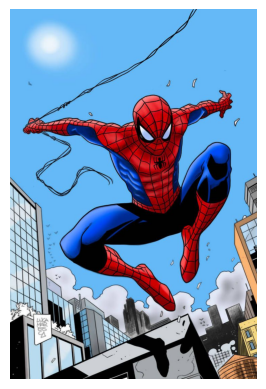

In [73]:
plt.imshow(img)
plt.axis("off")

In [74]:
img_rgb = np.array(img)
img_rgb

array([[[101, 185, 247],
        [101, 185, 247],
        [101, 185, 247],
        ...,
        [101, 185, 247],
        [101, 185, 247],
        [101, 185, 247]],

       [[101, 185, 247],
        [101, 185, 247],
        [101, 185, 247],
        ...,
        [101, 185, 247],
        [101, 185, 247],
        [101, 185, 247]],

       [[101, 185, 247],
        [101, 185, 247],
        [101, 185, 247],
        ...,
        [101, 185, 247],
        [101, 185, 247],
        [101, 185, 247]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [124,  80,  45],
        [ 47,  17,   0],
        [127, 105,  84]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [136,  90,  54],
        [ 45,  13,   0],
        [ 98,  73,  51]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [142,  94,  56],
        [ 49,  15,   0],
        [ 64,  38,  15]]

In [75]:
gray_numpy = 0.299 * img_rgb[..., 0] + 0.587 * img_rgb[..., 1] + 0.114 * img_rgb[..., 2]

In [76]:
gray_cv2 = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

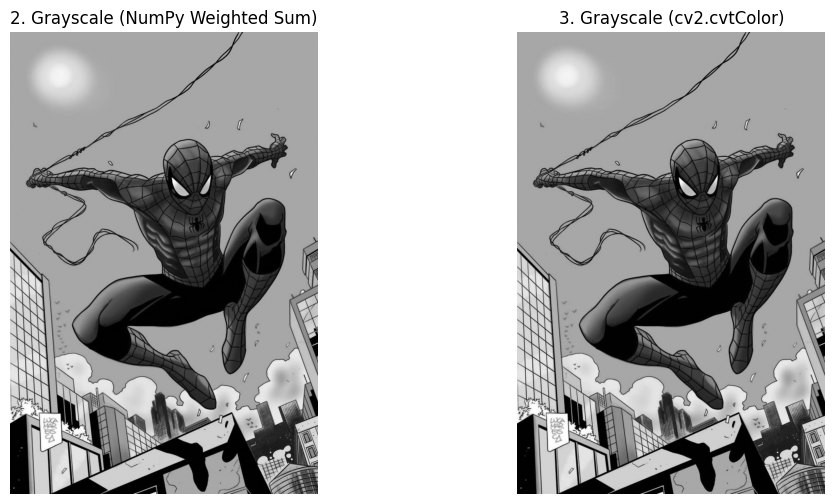

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray_numpy, cmap='gray')
axes[0].set_title("2. Grayscale (NumPy Weighted Sum)")
axes[0].axis("off")

axes[1].imshow(gray_cv2, cmap='gray')
axes[1].set_title("3. Grayscale (cv2.cvtColor)")
axes[1].axis("off")
plt.show()

4. Array Shapes

In [78]:
print(f"RGB Shape: {img_rgb.shape[0]} Rows, {img_rgb.shape[1]} Cols, {img_rgb.shape[2]} Channels)")
print(f"Gray Shape: {gray_numpy.shape[0]} Rows, {gray_numpy.shape[1]} Cols, No Channels)")

RGB Shape: 1095 Rows, 730 Cols, 3 Channels)
Gray Shape: 1095 Rows, 730 Cols, No Channels)


5. Pixel Value Comparison (at 100,100)

In [79]:
print(f"RGB Pixel: {img_rgb[100, 100]}")
print(f"Gray Pixel: {gray_numpy[100, 100]}")

RGB Pixel: [230 243 251]
Gray Pixel: 240.025


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [80]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [81]:
f = np.fft.fft2(gray_numpy)

In [82]:
fshift = np.fft.fftshift(f)

In [83]:
magnitude_spectrum = np.abs(fshift)

In [84]:
magnitude_spectrum_log = 20 * np.log(magnitude_spectrum + 1e-9)

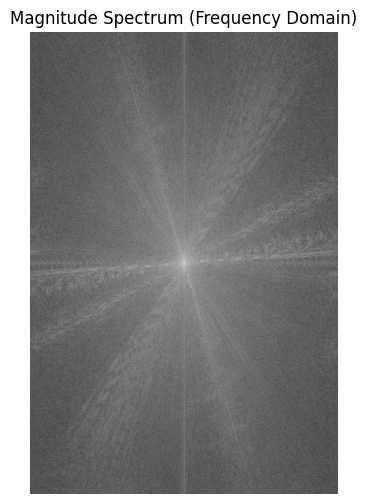

In [85]:
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title('Magnitude Spectrum (Frequency Domain)')
plt.axis('off')
plt.show()

In [86]:
print("Shape of FFT array:", fshift.shape)
print("Data type of FFT array:", fshift.dtype)

Shape of FFT array: (1095, 730)
Data type of FFT array: complex128


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [87]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [88]:
rows, cols = gray_numpy.shape
crow, ccol = rows//2, cols//2

In [89]:
def apply_mask(radius, mode='LPF'):
  mask = np.zeros((rows, cols), np.uint8)

  y, x = np.ogrid[:rows, :cols]
  center_distance = np.sqrt((x-ccol)**2 + (y-crow)**2)

  if mode == 'LPF':
    mask[center_distance <= radius] = 1
  else:
    mask[center_distance > radius] = 1

  fshift_filtered = fshift*mask

  f_ishift = np.fft.ifftshift(fshift_filtered)
  img_back = np.abs(np.fft.ifft2(f_ishift))

  return img_back, mask

In [90]:
radii = [10, 30, 80]

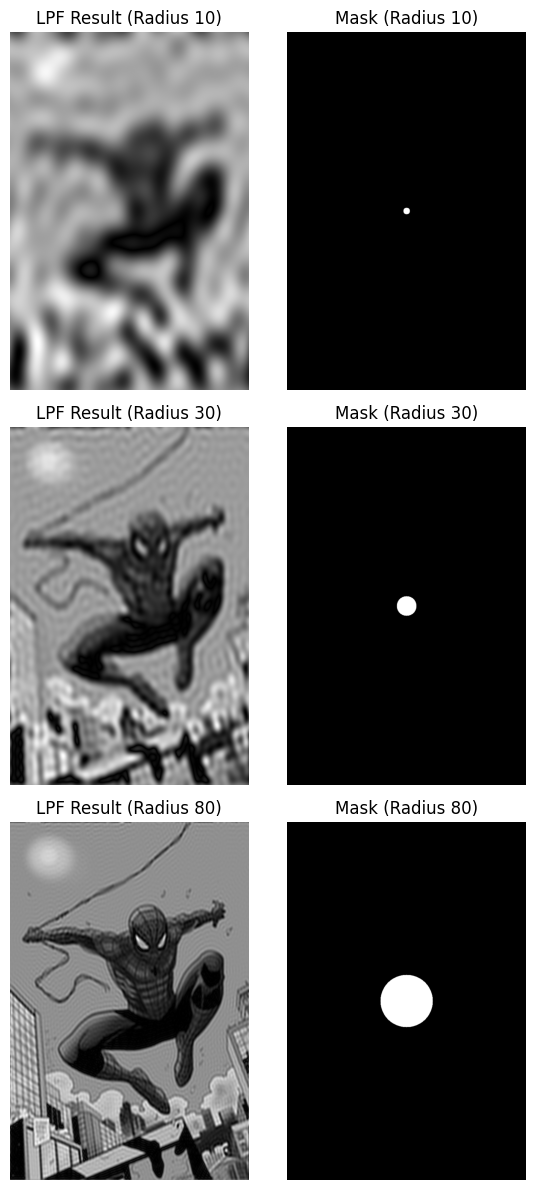

In [91]:
fig, axes = plt.subplots(3, 2, figsize=(6, 12))

for i, r in enumerate(radii):
    img_out, mask_out = apply_mask(r, 'LPF')

    axes[i, 0].imshow(img_out, cmap='gray')
    axes[i, 0].set_title(f'LPF Result (Radius {r})')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(mask_out, cmap='gray', vmin=0, vmax=1)
    axes[i, 1].set_title(f'Mask (Radius {r})')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

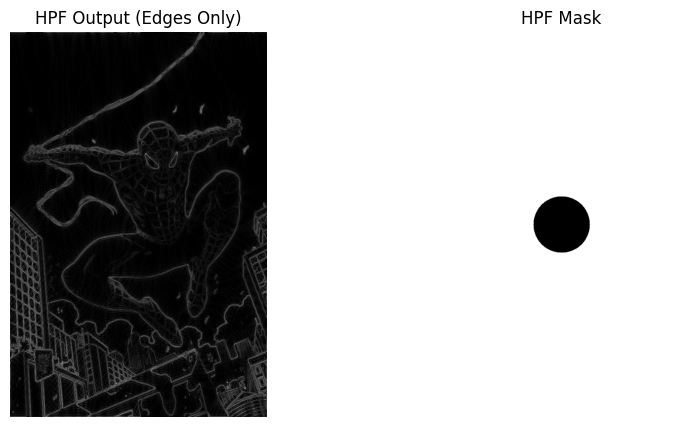

In [92]:
hpf_img, hpf_mask = apply_mask(80, mode='HPF')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(hpf_img, cmap='gray')
plt.title("HPF Output (Edges Only)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hpf_mask, cmap='gray')
plt.title("HPF Mask")
plt.axis('off')
plt.show()

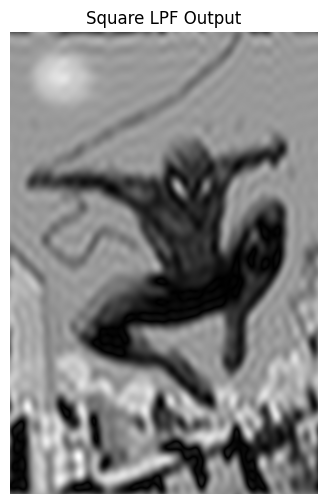

In [93]:
mask_square = np.zeros((rows, cols), np.uint8)
mask_square[crow-25:crow+25, ccol-25:ccol+25] = 1

# Apply Mask
fshift_sq = fshift * mask_square
# Inverse FFT
img_back_sq = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_sq)))

plt.figure(figsize=(6,6))
plt.imshow(img_back_sq, cmap='gray')
plt.title("Square LPF Output")
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [94]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [95]:
phase_only_spectrum = fshift / (np.abs(fshift) + 1e-9)

In [96]:
img_phase_only = np.abs(np.fft.ifft2(np.fft.ifftshift(phase_only_spectrum)))

In [97]:
angle_values = np.angle(fshift)
img_angle_wrong = np.abs(np.fft.ifft2(np.fft.ifftshift(angle_values)))

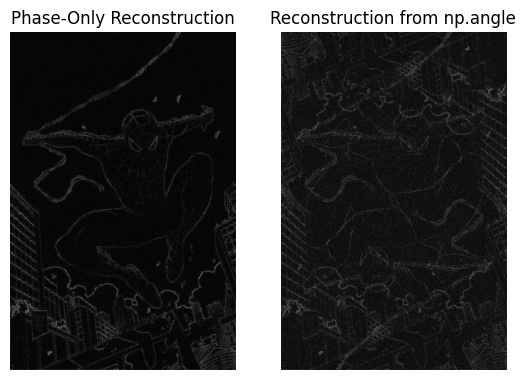

In [98]:
plt.subplot(1, 2, 1)
plt.imshow(img_phase_only, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_angle_wrong, cmap='gray')
plt.title("Reconstruction from np.angle")
plt.axis('off')
plt.show()

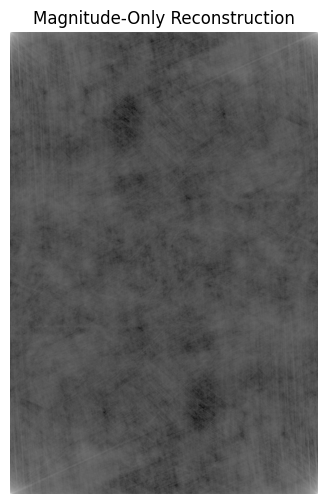

In [99]:
mag_only_spectrum = np.abs(fshift)

# 2. Reconstruct
img_mag_only = np.abs(np.fft.ifft2(np.fft.ifftshift(mag_only_spectrum)))

# Display D2
plt.figure(figsize=(6, 6))
plt.imshow(np.log(img_mag_only + 1), cmap='gray') # Log helps see the weak signal
plt.title("Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

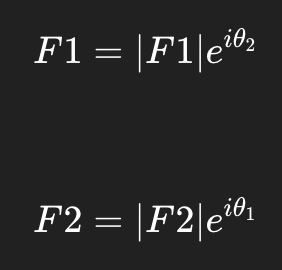

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [100]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [101]:
from skimage import data

In [102]:
img1 = gray_numpy

In [103]:
# Loading Image 2, a sample Camera Man photo)
img2 = data.camera()
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

In [104]:
# Computing FFT for both
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)

f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)

In [105]:
# Extracting Magnitude and Phase
# Image 1 (Spiderman)
mag1 = np.abs(fshift1)
phase1 = np.angle(fshift1)

# Image 2 (Cameraman)
mag2 = np.abs(fshift2)
phase2 = np.angle(fshift2)

In [106]:
# Swaping (Cross-Breeding)
# Formula: New_Complex = Magnitude * e^(j * Phase)

# Combining Mag1 (Spiderman) with Phase2 (Cameraman)
combined_1 = mag1 * np.exp(1j * phase2)
reconstructed_1 = np.abs(np.fft.ifft2(np.fft.ifftshift(combined_1)))

# Combining Mag2 (Cameraman) with Phase1 (Spiderman)
combined_2 = mag2 * np.exp(1j * phase1)
reconstructed_2 = np.abs(np.fft.ifft2(np.fft.ifftshift(combined_2)))

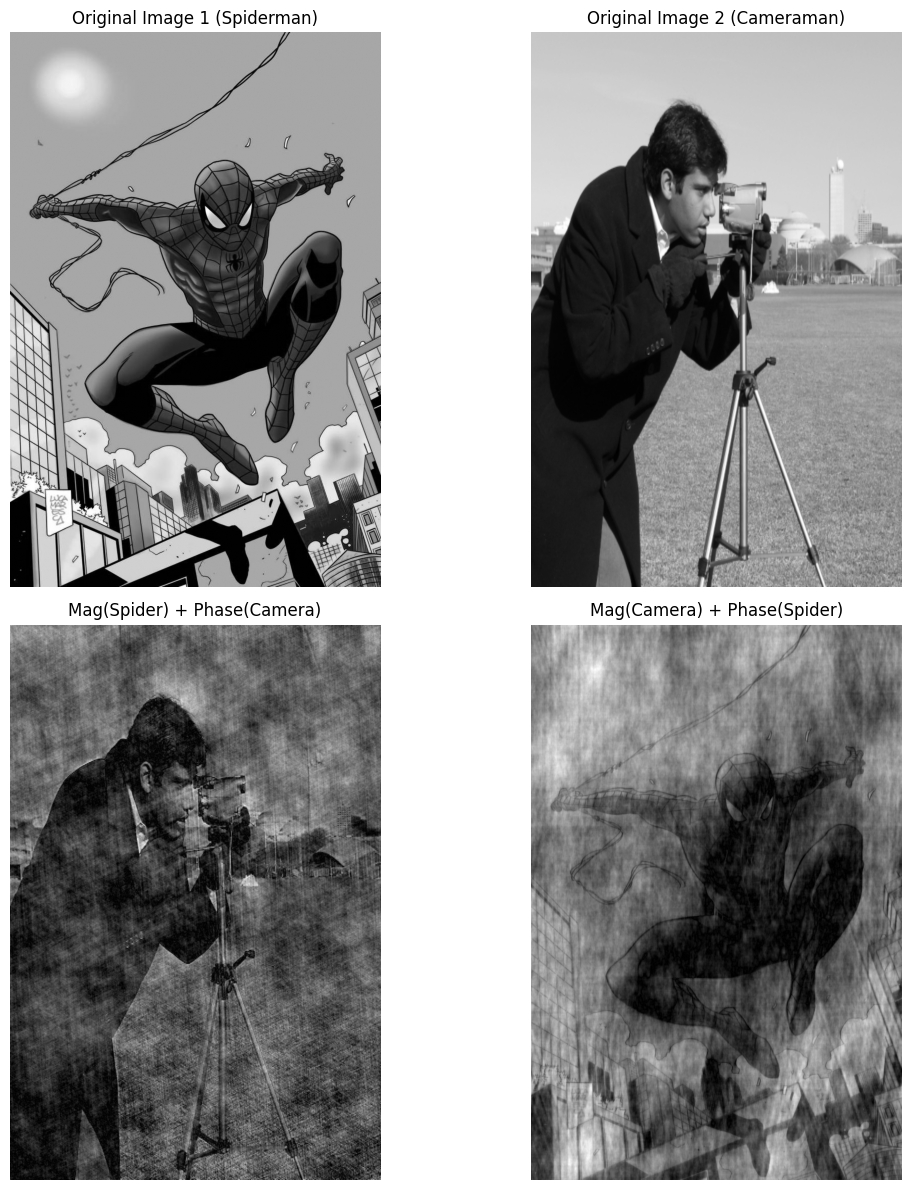

In [108]:
# 6. Display Results
plt.figure(figsize=(12, 12))

# Row 1: Originals
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image 1 (Spiderman)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Original Image 2 (Cameraman)")
plt.axis('off')

# Row 2: Swapped
plt.subplot(2, 2, 3)
plt.imshow(reconstructed_1, cmap='gray')
plt.title("Mag(Spider) + Phase(Camera)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(reconstructed_2, cmap='gray')
plt.title("Mag(Camera) + Phase(Spider)")
plt.axis('off')

plt.tight_layout()
plt.show()